# Import Required Libraries
Import necessary packages for data manipulation, visualization, and machine learning, including pandas, numpy, matplotlib, seaborn, and scikit-learn.

In [1]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced data visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.ensemble import RandomForestRegressor  # For regression modeling
from sklearn.metrics import mean_absolute_error, mean_squared_error  # For evaluating model performance

# Load and Explore Data
Load the MDS-UPDRS Part III data and explore its structure, including summary statistics, missing values, and distributions of key variables. Identify the temporal structure of the data and explore patient visit patterns.

First few rows of the dataset:


,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,PDTRTMNT,PDSTATE,HRPOSTMED,HRDBSON,HRDBSOFF,...,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON,NP3TOT,DYSKPRES,DYSKIRAT,NHY,ORIG_ENTRY,LAST_UPDATE
0,272451901,3000,BL,NUPDRS3,02/2011,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,4.0,0.0,NaN,0.0,02/2011,2020-06-25 16:02:19.0
1,338703101,3000,V04,NUPDRS3,03/2012,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,03/2012,2020-06-25 16:02:22.0
2,385009801,3000,V06,NUPDRS3,02/2013,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,4.0,0.0,NaN,0.0,02/2013,2020-06-25 16:02:22.0
3,437131401,3000,V08,NUPDRS3,03/2014,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,2.0,0.0,NaN,0.0,05/2014,2020-06-25 16:02:22.0
4,512469901,3000,V10,NUPDRS3,03/2015,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,19.0,0.0,NaN,0.0,03/2015,2020-06-25 16:02:23.0


Dataset contains 32346 rows and 63 columns.
Missing values per column:
PDTRTMNT       2307
PDSTATE       17921
HRPOSTMED     19916
HRDBSON       31913
HRDBSOFF      32205
PDMEDYN        3333
DBSYN          1030
ONOFFORDER    28302
OFFEXAM       28889
OFFNORSN      30870
DBSOFFTM      32192
ONEXAM        28855
ONNORSN       32107
HIFUYN        29910
DBSONTM       31899
PDMEDDT       19792
PDMEDTM       19803
EXAMDT         1728
EXAMTM         5354
NP3SPCH        1722
NP3FACXP       1722
NP3RIGN        1725
NP3RIGRU       1725
NP3RIGLU       1725
NP3RIGRL       1727
NP3RIGLL       1729
NP3FTAPR       1724
NP3FTAPL       1727
NP3HMOVR       1724
NP3HMOVL       1728
NP3PRSPR       1724
NP3PRSPL       1726
NP3TTAPR       1753
NP3TTAPL       1750
NP3LGAGR       1723
NP3LGAGL       1724
NP3RISNG       1725
NP3GAIT        1724
NP3FRZGT       1738
NP3PSTBL       1752
NP3POSTR       1725
NP3BRADY       1725
NP3PTRMR       1725
NP3PTRML       1726
NP3KTRMR       1726
NP3KTRML       1725
NP3RTARU 

,PATNO,PDTRTMNT,HRPOSTMED,HRDBSON,HRDBSOFF,PDMEDYN,DBSYN,ONOFFORDER,OFFEXAM,OFFNORSN,...,NP3RTARU,NP3RTALU,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON,NP3TOT,DYSKPRES,DYSKIRAT,NHY
count,32346.000000,30039.000000,12430.000000,433.000000,141.000000,29013.000000,31316.000000,4044.000000,3457.000000,1476.000000,...,30621.000000,30621.000000,30621.000000,30621.000000,30620.000000,30619.000000,26109.000000,30614.000000,5610.000000,30613.000000
mean,72899.045693,0.479377,34.679257,7.094958,0.612650,0.492986,0.039022,1.193867,0.572172,4.836721,...,0.829953,0.765912,1.115476,1.107900,0.612900,1.255462,16.869126,0.054975,0.024955,3.033777
std,83440.387464,0.499583,1811.316871,5.435179,1.901328,0.499959,0.193649,0.395375,0.494835,3.181264,...,6.617771,6.756607,10.043738,10.076425,7.527835,7.258660,14.683221,0.227935,0.156003,13.604846
min,3000.000000,0.000000,-621.000000,-10.766700,-14.033300,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3770.000000,0.000000,1.333300,1.416700,0.066700,0.000000,0.000000,1.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000
50%,50157.000000,0.000000,3.000000,9.250000,0.266700,0.000000,0.000000,1.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,1.000000
75%,106127.000000,1.000000,12.000000,11.666700,1.083300,1.000000,0.000000,1.000000,1.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,26.000000,0.000000,0.000000,2.000000
max,433274.000000,1.000000,175321.383300,16.500000,9.000000,1.000000,1.000000,2.000000,1.000000,9.000000,...,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,100.000000,1.000000,1.000000,101.000000


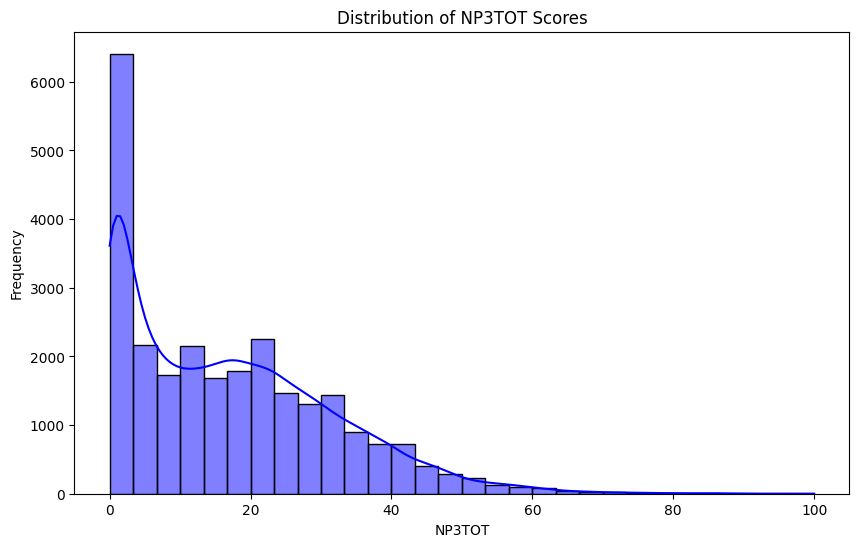

Unique EVENT_ID values (visit patterns):
['BL' 'V04' 'V06' 'V08' 'V10' 'V12' 'V14' 'V15' 'V17' 'SC' 'V01' 'V02'
 'V03' 'V05' 'V07' 'V09' 'V11' 'V18' 'V19' 'V20' 'ST' 'V13' 'R18' 'R19'
 'V16' 'PW' 'RS1' 'R17' 'V21' 'R20' 'R16' 'R15' 'U01' 'R14' 'R13' 'R08'
 'R12' 'R10' 'R06' 'R04' 'R01']
Summary of visit counts per patient:


count    4313.000000
mean        7.499652
std         7.935534
min         1.000000
25%         2.000000
50%         4.000000
75%        11.000000
max        40.000000
Name: EVENT_ID, dtype: float64

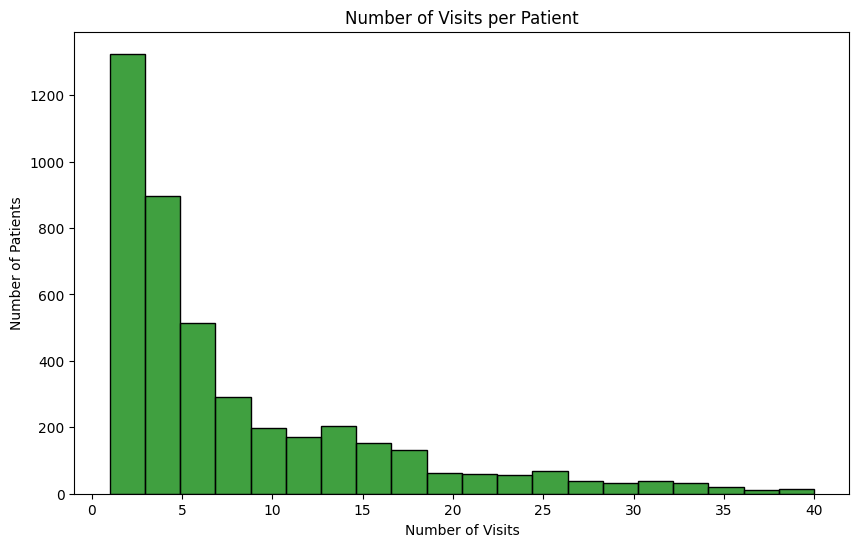

Time progression of visits:


/var/folders/kw/d3zgy6jx0gl0lybbg494yl8c0000gn/T/ipykernel_21159/581251139.py:46: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mds_updrs_data['INFODT'] = pd.to_datetime(mds_updrs_data['INFODT'], errors='coerce')


EVENT_ID
BL    2010-07-01
SC    2010-07-01
V01   2010-10-01
ST    2010-12-01
U01   2011-02-01
V02   2011-04-01
V03   2011-06-01
V04   2011-07-01
RS1   2011-09-01
PW    2011-10-01
V05   2011-12-01
V06   2012-06-01
V07   2012-12-01
V08   2013-06-01
V09   2014-01-01
V10   2014-07-01
V11   2014-12-01
V12   2015-07-01
V13   2016-07-01
V14   2017-07-01
V15   2018-07-01
V16   2019-07-01
R06   2020-01-01
V17   2020-08-01
R08   2020-11-01
R16   2020-11-01
R15   2020-11-01
R10   2020-12-01
R12   2021-01-01
R17   2021-01-01
R04   2021-03-01
R14   2021-03-01
R13   2021-03-01
V18   2021-07-01
R01   2021-12-01
R18   2022-01-01
V19   2022-07-01
R19   2023-01-01
V20   2023-07-01
R20   2024-02-01
V21   2024-06-01
Name: INFODT, dtype: datetime64[ns]

In [2]:
# Load the MDS-UPDRS Part III data
mds_updrs_data = pd.read_csv('/Users/larsheijnen/Thesis/data/MDS-UPDRS_Part_III_21Mar2025.csv')

# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
display(mds_updrs_data.head())

# Display the shape of the dataset
print(f"Dataset contains {mds_updrs_data.shape[0]} rows and {mds_updrs_data.shape[1]} columns.")

# Check for missing values in the dataset
missing_values = mds_updrs_data.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

# Summary statistics of the dataset
print("Summary statistics of numerical columns:")
display(mds_updrs_data.describe())

# Explore the distribution of the target variable (NP3TOT)
plt.figure(figsize=(10, 6))
sns.histplot(mds_updrs_data['NP3TOT'], kde=True, bins=30, color='blue')
plt.title('Distribution of NP3TOT Scores')
plt.xlabel('NP3TOT')
plt.ylabel('Frequency')
plt.show()

# Explore the temporal structure of the data
print("Unique EVENT_ID values (visit patterns):")
print(mds_updrs_data['EVENT_ID'].unique())

# Count the number of visits per patient
visit_counts = mds_updrs_data.groupby('PATNO')['EVENT_ID'].count()
print("Summary of visit counts per patient:")
display(visit_counts.describe())

# Visualize the number of visits per patient
plt.figure(figsize=(10, 6))
sns.histplot(visit_counts, bins=20, kde=False, color='green')
plt.title('Number of Visits per Patient')
plt.xlabel('Number of Visits')
plt.ylabel('Number of Patients')
plt.show()

# Check the time progression of visits
mds_updrs_data['INFODT'] = pd.to_datetime(mds_updrs_data['INFODT'], errors='coerce')
time_progression = mds_updrs_data.groupby('EVENT_ID')['INFODT'].min().sort_values()
print("Time progression of visits:")
display(time_progression)

# Feature Engineering
Create features that help predict NP3TOT progression, including temporal features (time since baseline, visit sequence), derived features (change in NP3TOT between visits, rate of progression), and lag features (previous NP3TOT values). Aggregate individual motor assessment scores and create patient-specific context features.

In [3]:
# Feature Engineering

# Convert EVENT_ID to a numerical sequence to represent visit order
event_id_mapping = {event: idx for idx, event in enumerate(sorted(mds_updrs_data['EVENT_ID'].unique()))}
mds_updrs_data['EVENT_SEQ'] = mds_updrs_data['EVENT_ID'].map(event_id_mapping)

# Calculate time since baseline (in months) for each visit
baseline_dates = mds_updrs_data.groupby('PATNO')['INFODT'].min()
mds_updrs_data['TIME_SINCE_BL'] = (mds_updrs_data['INFODT'] - mds_updrs_data['PATNO'].map(baseline_dates)).dt.days / 30.0

# Sort data by patient and visit sequence for lag feature creation
mds_updrs_data = mds_updrs_data.sort_values(by=['PATNO', 'EVENT_SEQ'])

# Create lag features for NP3TOT (previous visit scores)
mds_updrs_data['NP3TOT_LAG1'] = mds_updrs_data.groupby('PATNO')['NP3TOT'].shift(1)
mds_updrs_data['NP3TOT_LAG2'] = mds_updrs_data.groupby('PATNO')['NP3TOT'].shift(2)

# Calculate change in NP3TOT from the previous visit
mds_updrs_data['NP3TOT_CHANGE'] = mds_updrs_data['NP3TOT'] - mds_updrs_data['NP3TOT_LAG1']

# Calculate rate of progression (change in NP3TOT per month since the last visit)
mds_updrs_data['TIME_DIFF'] = mds_updrs_data.groupby('PATNO')['TIME_SINCE_BL'].diff()
mds_updrs_data['NP3TOT_RATE'] = mds_updrs_data['NP3TOT_CHANGE'] / mds_updrs_data['TIME_DIFF']

# Aggregate individual motor assessment scores to create a composite feature
motor_scores = [
    'NP3SPCH', 'NP3FACXP', 'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 'NP3RIGLL',
    'NP3FTAPR', 'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 'NP3PRSPL', 'NP3TTAPR',
    'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL',
    'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 'NP3PTRML', 'NP3KTRMR', 'NP3KTRML', 'NP3RTARU',
    'NP3RTALU', 'NP3RTARL', 'NP3RTALL', 'NP3RTALJ', 'NP3RTCON'
]
mds_updrs_data['MOTOR_SCORE_SUM'] = mds_updrs_data[motor_scores].sum(axis=1)

# Create patient-specific context features
mds_updrs_data['IS_ON_MED'] = mds_updrs_data['PDSTATE'].apply(lambda x: 1 if x == 'ON' else 0)
mds_updrs_data['HOURS_POST_MED'] = mds_updrs_data['HRPOSTMED'].fillna(0)

# Display the first few rows of the dataset after feature engineering
print("Dataset after feature engineering:")
display(mds_updrs_data.head())

Dataset after feature engineering:


,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,PDTRTMNT,PDSTATE,HRPOSTMED,HRDBSON,HRDBSOFF,...,EVENT_SEQ,TIME_SINCE_BL,NP3TOT_LAG1,NP3TOT_LAG2,NP3TOT_CHANGE,TIME_DIFF,NP3TOT_RATE,MOTOR_SCORE_SUM,IS_ON_MED,HOURS_POST_MED
0,272451901,3000,BL,NUPDRS3,2011-02-01,NaN,NaN,NaN,NaN,NaN,...,0,0.000000,NaN,NaN,NaN,NaN,NaN,4.0,0,0.0
1,338703101,3000,V04,NUPDRS3,2012-03-01,NaN,NaN,NaN,NaN,NaN,...,23,13.133333,4.0,NaN,-3.0,13.133333,-0.228426,1.0,0,0.0
2,385009801,3000,V06,NUPDRS3,2013-02-01,NaN,NaN,NaN,NaN,NaN,...,25,24.366667,1.0,4.0,3.0,11.233333,0.267062,4.0,0,0.0
3,437131401,3000,V08,NUPDRS3,2014-03-01,NaN,NaN,NaN,NaN,NaN,...,27,37.466667,4.0,1.0,-2.0,13.100000,-0.152672,2.0,0,0.0
4,512469901,3000,V10,NUPDRS3,2015-03-01,NaN,NaN,NaN,NaN,NaN,...,29,49.633333,2.0,4.0,17.0,12.166667,1.397260,19.0,0,0.0


# Data Preprocessing
Clean the dataset by handling missing values, encoding categorical variables, and normalizing numerical features. Structure the data for time series analysis with proper train-test splits that respect the temporal nature of the data.

In [5]:
import numpy as np
import pandas as pd

# Check for infinities or very large values
print("Columns with infinite values:")
for col in numerical_features:
    if col in mds_updrs_data.columns and mds_updrs_data[col].isin([np.inf, -np.inf]).any():
        print(f"- {col}")
        
# Replace infinities with NaNs and then fill them
for col in numerical_features:
    if col in mds_updrs_data.columns:
        # Replace infinities with NaNs
        mds_updrs_data[col] = mds_updrs_data[col].replace([np.inf, -np.inf], np.nan)

# Handle missing values again after replacing infinities
mds_updrs_data.fillna(method='ffill', inplace=True)
mds_updrs_data.fillna(method='bfill', inplace=True)
# For any remaining NaN values (if ffill and bfill don't work for some rows)
mds_updrs_data.fillna(mds_updrs_data.mean(), inplace=True)

# Now scale the numerical features
scaler = MinMaxScaler()
mds_updrs_data[numerical_features] = scaler.fit_transform(mds_updrs_data[numerical_features])

# Train-test split while respecting temporal nature
train_data = mds_updrs_data[mds_updrs_data['EVENT_SEQ'] < mds_updrs_data['EVENT_SEQ'].max() - 1]  
test_data = mds_updrs_data[mds_updrs_data['EVENT_SEQ'] == mds_updrs_data['EVENT_SEQ'].max()]  

# Separate features and target variable
X_train = train_data.drop(columns=['NP3TOT'])
y_train = train_data['NP3TOT']
X_test = test_data.drop(columns=['NP3TOT'])
y_test = test_data['NP3TOT']

# Display shapes
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Columns with infinite values:
- NP3TOT_RATE


/var/folders/kw/d3zgy6jx0gl0lybbg494yl8c0000gn/T/ipykernel_21159/379937368.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mds_updrs_data.fillna(method='ffill', inplace=True)
/var/folders/kw/d3zgy6jx0gl0lybbg494yl8c0000gn/T/ipykernel_21159/379937368.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mds_updrs_data.fillna(method='bfill', inplace=True)


TypeError: Could not convert ['272451901338703101385009801437131401512469901563731101675890201736290801IANT161818278743601274804301294967101310817501322772101341438201362683401398204501413438401448713301473773101516499201516493001536210901578965701578965501681770601681769401733217901733217301IAOF161819IAON161819IAON161821IAOF161821IAOF249002IAON249002IAON582889IAOF582889281541201278720901314494201297958101327176201345067301345066701366335501366338101396328501414121501414120401436834301436837501465579901513686301536771301573105401682816901682425101733814201733812501IAOF161822IAON161822IAOF161824IAON161824287051101281146501371384501304961501316353101333042101341945201398173201417491401448680701475719901515720301515753001544344401571317601633396601743760301736398501IAON161826IAOF161826IAON265003IAOF265003IAON485586IAOF485586287071001341953001398146301448655001515671501570455601769818301IANT161827IANT265040IANT485665281511101288845801283729601307666101325638301336067001350569101350568501295110201288859601295130001350578901403583701455197801524513001601935301697580501748793801IANT161828300394801355428101412261101454506401524364701749021601IANT161829IANT161830IANT302743IANT522900298475301IAON202204IAOF202204IAON384331IAOF384331294898601314845401328505901339441301352484901382738301407215101428511501457703901489197901528067501526455001560378101633252301703437201703441101760053501760052101IAOF161831IAON161831IAOF161833IAON161833IAOF280137IAON280137IAOF527828IAON527828305866401362726101412253001322292501316324101350198501336039701362746701382871601400572801428476401449394901494479901529944101544865901595092201721646201721646601321259501378378601426977901494698501547238801715601201770340301IANT161834325588601318132801352686501336656401382470201402394801449337001335207001396248201437150001512812401731054001IANT161835IANT218081IANT459572IANT690750340954701336649701354445801370090301383031701398939001416714301452715101482045901521789601544376101572023101698301501698303301738995501749118201IAON161836IAOF161836IAOF161838IAON161838IAON245221IAOF245221IAON526412IAOF526412344918301341473501354453501371380401755407601403536201421376101452730301474906401523016501541543101748868301748864201344400701341544401357233301376669701393459501400592301418807601452698501483419901521071101521100701544393701756743001756742801755494701755492601IAON161839IAOF161839IAON161841IAOF161841IAON281980IAOF281980IAON515978IAOF515978349497301344938301362689501387532301393452501412273501427033901350805501345036201364466901380198301395681901407477401421429901455212001496930301525305001551290801579884601749041801749039401IAOF161842IAON161842IAON161844IAOF161844IAON270024IAOF270024IAON519313IAOF519313352466801346501101428497101364477101382991001395677301412245201481699901526252001551281801751864001IAOF161845IAON161845IAOF161847IAON161847IAON294608IAOF294608IAOF531866IAON531866361041301362675401370914501415271901366292601385150701382321601378292501513368801397883001407499301416707701436803901449400701537907301556461401677430801721632801IAON161848IAOF161848393268201388678601539378701402381001413598601427013201446780401464833901516514301564946401564878901595541901659397101682925601682929701736360601736360201IAOF161850IAON161850IAON230963IAOF230963IAON484211IAOF484211395529101450294201521163501709250001749094001IANT161852IANT161853IANT281947IANT516056335069001IAON615371IAOF615371329386901246429001351860501364139401378892401390438201411220101428989501476799901506460101537060501533751701560098701560097101584384001621903401621902401677473401677473001731387001731389101768997601768997001IAON161854IAOF161854IAON245575IAOF245575IAOF440520IAON440520IAON699134IAOF699134252688101IAON161855IAON322641IAOF322641250165401270783601284740401306985401320322001320321601346355601346355401378915001378915601394349901417114301417113701436853601478009901477995901514294001544964401544964001595656901595656501659589601659588401713150901713135001761053401761053201IAON161856IAOF161856IAOF246999IAON246999IAON462544IAOF462544IAON575258IAOF575258262506401256129701280193601303324101314236301327627501350122701379194401379190901398963301422876301446615601481000701481001301524228301545967501545773301607815801607809301664009501664008901715479801715479401761074401262835001IANT327825IANT605574327692701379229001422807901481326301545925901663965501715491901761509901IANT161857IANT237986IANT462278261056201IAON161858258113801288513901279323401312907201327720901350903401351072301378103901378103301399705801423670401423658701445704801488549901487563901523916501547631001547630601605960501605958001665791301665792301715542501715542301764820601764820801IAOF161859IAON161859IAOF246237IAON246237261151101IANT161860IANT556970327745001379305201423674401487577701547679601665726001718354501765911401IANT161861IANT245860IANT432017IANT644712273154401268564201293953701292738201320312801320307501334068301357498501383860401407511201427455901427449601450268201497979901497977701529666701553001201553001801615907001615906001675531301675530801728186801728186401273127301IANT295215334248401383642201427457401497960101553063301675513801728715101768136801IANT161862IANT212270IANT488386277006701270022401292098801314473801326751201336733601364373401388254901388249501408204701537055701537055601451374101501701401501702001534928201556676001556678001276964601270084601292100901314470201326975201335856801364375801388973101388965001408405201428534801428535401451427201501693901501692901284191601IAON161863281123501379316801306987601319432101329354601344451201390815801390791901412389001435102401435086701462812001510984201510983601566412801566411801625737501625738901679417701679416901734159601734159401IAOF161864IAON161864282529901279220701321281701303268201315854101340809301379322601395178601401688201412383701434657501458388101512886501512885901532656601562806201562811401623353701623353101682952201735365101735461001IAON161865IAOF161865IAON249216IAOF249216282586601IAON362583IAOF362583IAON616971IAOF616971279228601384582801303270801314335301326934901342881801379392001412023601430977901430972701461328701507823301536434801563062301563052601627926101627925301679353401679353901730463301730286701IAON161866IAOF161866IAOF243576IAON243576IAOF513670IAON513670292627401IANT161867IANT393606350547301401184801439465001520665101569873801689408301745015401IANT161868IANT292827IANT541967311439201292559501383350101315846801329105901332464601351044001379421601402537201400210601419518201441126801441233601480957901526190901527084301550504201571404001571403301638300701638300101693983401693983801745154701745154401291036801IAON405421IAOF405421288516201389124301311824601320981401335062301346973501389115101401143701401167301416586601440578301440577701479615301517614601517707601541645001566239101566237301635738901635273401687621401687622301743268701743268301IAOF161869IAON161869IAON307109IAOF307109IAON554134IAOF554134305371701293949901315615901330874101340406301364332301364317501383007501406523501406523901423070701448276101448248601493122101528009201527901601550496401578183601578181801634092601634087401745025901745026101311431201IANT161870358565901406921801451569201532644601589963701702246101751247301IANT161871IANT322162IANT560561322400101IANT333901IANT554936375822501419165401477947401546479401603246001715523401759052901IANT161872IANT257378IANT463375IANT651222315032701IANT161873IANT287119366667901414235101466207901540770001590332901710444601760824601IANT161874IANT206502IANT509964IANT625528320295901IANT161875374638901419010501466253901540648001601452901710479301767786801IANT161876IANT298957IANT455016IANT625554321986901IANT161877379886901418350301476763901541942801605907201716320601758946701IANT340043IANT607204325524701379884701419652801483755301546438801604560901720781801335264801331743901350543001364142501379890701386525801407004901430296701456786101511383201510979901534226301562092901562097601337423201331761201352703401364090301388241801390024701388975001411575301430019801430020801459298101507609701507608901535539901561097801561026801589995401624103501624021201680736201680735601735140601735140801768361701768361301IAOF161878IAON161878IAON240702IAOF240702IAON500750IAOF500750344436301IAON161880IAON395463IAOF395463342453501416814801364292401383668901383676401393782601414420901438071201438011201474576101513848301513935901541532101566688701566681401596472901628253601628253001744819601744818801IAON161879IAOF161879IAON161881IAOF161881IAON241475IAOF241475IAON557030IAOF557030352452801344456201364100201389337201390596701401542001420727401442996301353940801348628401390327201367523301392788901405863401425884401450868301450868901494009301525706601525706201549981301579333701579333201612548801641886001641885201353984001349310401366627401364023701384315301395183201405272601414592501435735101473390401379892701376825901398029601393990101421522301444708301484709301484708301523240301545716601572282801607322801607323201639104901667134101667135301724034501724032701763736601763736401387404301IANT161882IANT295406IANT619520426269801494123201550374101614038101672564901725528901768122701IANT161883IANT251528IANT492968IANT670830391604501IAON161884IAON358072IAOF358072385778601405259901415719001422530401433958201467448101511868501511868001537667001564426501592036601621881701621879801655239601732805101732803601769697001769696401IAON161885IAOF161885IAON241917IAOF241917IAON540680IAOF540680391702701433965101511912701564489001621395801393970501IAON161886IAON373512IAOF373512IAOF616658IAON616658387302101406740301417296901424089101435624301473994501510117701510435501541644401560152201560151401596339601625764801625765901655026901683007301683005601736555301736555901IAON161887IAOF161887IAON258372IAOF258372IAON549746IAOF549746394823401IAON396700IAOF396700394327601405389201412173001428051801435217801435243901464264301521769201521768401537639801562025801562036001592281401634014401634015601660263701683028101683029201736061301736060501IAON161888IAOF161888IAOF318309IAON318309IAON562087IAOF562087254950101321916901372598601419035901477140701544146501358923601353412701251456701372659801389145501396654501412475401412473601436330701454329801454339201262136601255295601321953601278160401297103601312326801347943901385348801396648201420453501420442601437850801476687901476355401520756701275690201344219301382318401282370801281012501314353501302803801344027001360127801394854101411038401436337301476313701520707701282380401344119801394907301436467201520738901286953901283558101317740301302788901330632001340673501340668801369221301398537001398980901414396901436384801448599201476307501522512701522512301544321101565151801565153801635731901635733801681343801680769201736802101736801101289205001IAON161891IAON350524IAOF350524IAON649811IAOF649811284681701317727801309127501330638601348794201369331301397161701396660601415520101442518201442544401465700601522535301522534701540091701581070201581069601636594701636594101689589501689588801741121801741121401IAON161889IAOF161889IAON161890IAOF161890IAON290911IAOF290911289269701IANT161894IANT350582IANT649827348777401396630201442678501522586101581017901691007401741135801IANT161892IANT161893IANT291000292259801289080101313734801313730301335253901348676201376331101399081601399068601420722301444692701444532701486053701529056801529055901543294401571555201571554201650748001650747601699619401699618801752212401752212201296937501292237401418338401312335001327214401335756501348688401369327601399625701444499101478710101544435601572479401572478801649369001649368601697620801697620001741567301741566901IAOF161895IAON161895297580501IANT377976348751501399613901444388301574403401697708101741604401IANT161896IANT275934IANT505677307885101302970601335102101321913001345910401355931001383195201405340201405337801425867501453822601453802501498064301306657001358823201411021801445172601537507201587969801711843401307943901355894501405342501453833001322020801316191001347842301331404601355943901372530501372511301398525901420436501420414801438820301476886101476911901529148101547162901581098501610990401331389701330466301347575901355976301366750501383216301408586601429212101448888501503315901503293901529128201557474901557474101584008201617748501617747901677632101677632701734527601734526601766621801766622001337662601IAOF213769IAON213769IAOF351856IAON351856333960901431836901347260401360337701376384201386509901412472101453840901508618501540098401561503901561500701593150901623452701623449501676055901676054901734918401734918201IAON161897IAOF161897IAOF204949IAON204949IAON249695IAOF249695347581301340655001358864501357488101389524401394834001414615901442714301476349701522606401522606001540306901570399401570399801604238401635937801635939501695827201695826501741516701741516501IAON161898IAOF161898347592401IAON383209IAOF383209IAON620362IAOF620362341864001357013301355927501385742401399087501423767401451513701476351501523007001523006601546273801572464901572464501607185201635985801635985201688467401688464301743900301743900101IAOF161899IAON161899IAON161900IAOF161900IAON315555IAOF315555IAON477216IAOF477216353075501IAON218697IAOF218697IAON384152IAOF384152IAON652379IAOF652379345980501402503701362790901372506701392252101421103901444328701486058501524593101524592501548606101574437201574437401609084701636573301636572501694210901694211301744560601744560401IAON161901IAOF161901IAON161902IAOF161902IANT161903IAON161903IAOF161903IAON161904IAOF161904IAOF293507IAON293507353084601347964401373367001363974801389158501405325401405335401420466401445039801498017901531263401531260901549171901581000501581000301606667001651300801651301801699250401699250001745704401745704601354737601IAOF161905IAON161905IAOF230364IAON230364IAON421861IAOF421861353096601391586501365627001382289601405300401423764701449462001449162601489769101536677401536677001561489901582740801582741601609070501646926901646926201698904401698904001748575701748575501IAON161906IAOF161906IAON347575IAOF347575IAON604074IAOF604074355911901355305401412995301373685701383902101398533701429484801454299101513581901537121701537120801556371301587977901587978501625822701653903701653902301699582401699581901751407501751410401362959301357913701379536201400622901429162901510851901537615301537615801570385801616467101616466701662531401662530801757808901757807001363375601358814001412614201374335701391567501402451201431845901476321001520759901544121101544121501561530301595322701629117101667595701667595101763624601763624401365686001363034901382293901403497901415514701415502801373676701IAON161908IAOF269737IAON269737365805101386467401408074201419026201418854401442706401480620901480613401521121701546240301546238901578193701609106001609105201638110801664199701664198501719162801719161901760426401760425401IAOF161907IAON161907IAON210646IAOF210646IAON386764IAOF386764389510801386585101408068501401692501431476101431463201454328301510876101540095401561564901592637701390417601386595401402420401413019401423770001433091901476309801522002901537109101561537201594950501632304001632304401655678701679574301679573901734462101734462601IAON161909IAOF161909IAON484070IAOF484070386603801395474301395468301405348501425872501438867201478933101529185701529185201543757301570390901570391301595319001633660501633659901664162801687652401687643301741450901741450501256061701251412601279236101293792501310361301325879701348272801376584801397649301421425201436856001532072601563326501256094401326114501376755001421971601486046801563301401254663501276272701271506001290268301310357401325706001360132901385066001385065601408917101425949801425948501458358301521493501521498701535242301556692201556691201621536901621535301281919901339315701391593401431129701516074001569488301273965501IANT161911IANT161913IANT364665IANT552345336412701385248601429808301510016501560098901683695401IANT161910IANT161912IANT255954IANT483533IANT697100272974901339526801389627401432195501531532901561120201683212301308785801361165601411124801453347501537857601593191801319696801313634901334229901347925401361372401369135401397847601412776601437297801465126501465126301521630001539352501539354901569572901601300301601299301657436701658407401315302601280525501298552801348314301403422001446285301532138901579338401312717101308725701477414301326725401342649901353883901365160601390030501412384801430635601523401201537816201537817401557895801332030001306521401312726301IAON161914IAON161916IAOF254638IAON254638IAOF447986IAON447986308659701327243301361237301366391701394207101411280601411280201430616601490321601490316101516888901541352501541337301557139501578922301578924001705793401705788001763025601763025401IAOF161915IAON161915IAOF206046IAON206046IAON330430IAOF330430IAON591101IAOF591101327271101IANT161918IANT161920IANT303025IANT527661374674401424163201490365001557156001608483901728989601762704501IANT161917IANT161919IANT448863IANT607629328570701327740401345779101358197701369613001383473501405691501438111701329760801IANT161922IANT161924IANT542827386258701425375401508159601553315901618173401766453701IANT161921IANT161923IANT230475IANT432626IANT672014328442701384100101421137501509165901556619201619187701331738501IAON161926IAON161928IAOF374637IAON374637IAOF568174IAON568174328190701343352501358208501374216301388419001407272401432976901457818001500967101532114301552898901578997701614386601614386001676079901676079501739510601739510401765500501765500101IAON161925IAOF161925IAOF161927IAON161927IAON227616IAOF227616IAON461768IAOF461768342313701IAON161930IAON161932IAOF369364IAON369364IAOF633423IAON633423342025401356235701365469801385334801393590401393469801413925601436816501437137401472263901525343301525342501539317401568138901568138501595158701627882301627867801IAON161929IAOF161929IAOF161931IAON161931IAON278809IAOF278809IAON503424IAOF503424343441501IAON161934IAON161936IAON386296IAOF386296341673401358411401371592901385268601398046601418481601435542601466058201526194401553377001590292201602642101628393001IAON161933IAOF161933IAOF161935IAON161935IAON300257IAOF300257IAON519324IAOF519324345924101IAOF161938IAON161940IAON373025IAOF373025342667701375330701358547501405277701421945901446201401446201001507856901525505701525506101540427801565743701565744301603274401640244801640243501696322601696322201741825501741825101IAOF161937IAON161937IAOF161939IAON161939IAOF161941IAON161941IAON312223IAOF312223IAON506118IAOF506118347731901351864601347247801379675501366384701403263901403024701425441901446294901507634601530630601530630401550920101581491201581490401608450901643419601643396901355329801351304901530394601368558301383983001395811301408333501425910101453792201507639501551176901590073701590071001615057201644358201644362901356354601IAON161942IAON161944IAON229606IAOF229606IAON441989IAOF441989353541201370044601388687101398617501407820901430554601457854001457853201537081101537080101551977001577948701577949101643084001643083401706051901706051501IAOF161943IAON161943IAOF161945IAON161945IAON316801IAOF316801IAON589788IAOF589788360142601IAON161948IAON238512IAOF238512IAON503768IAOF503768354572701371687401387816701398438301408087701429413401457481601457481201505801901531775901531774401557316901587954101587953501615690601654439601654438201758764801758762701IAON161947IAOF161947IAON161949IAOF161949IAON328466IAOF328466IAON608376IAOF608376361395601359428501405898901376604601390195501401027501432973801458075901458045401517379901534328401534328901562016401590458601590456801623133901651556201651555601361928501359744101378982501396362201402921401416820601433134301467067901374643501IAON161951IAON219257IAOF219257IAOF290615IAON290615IAON503848IAOF503848369382901386038501397948601411678701418301001439237401486869901524871101547638701570715701607505101607507901633454401661907901661585701739607801739606001759989601759989001IAOF161950IAON161950IAON161952IAOF161952IAON220788IAOF220788IAON397528IAOF397528IAON681235391024101386355001404481101416940001427808001431559701431478401455380501523696801523696201553213101562379601562373601597411301627952401627951801655169001680948301680952301389795301387770001401986401411047501424439301430339001453060501509931801535452001566180501598931501643330801659916801683745301IANT161953IANT161954IANT228038388174301393373101439306101530779901562379801636579601393210401390659501404316601417131801427757201439077501489255401531061001395715201388225801556482501404923901414255501427805701446187401471973201517392001544629101604591701629693001629692401656113001755917301755932401396293601IANT161956IANT210963IANT369450442336701528400801571844301629603001683157701IANT161955IANT161957IANT286275IANT503328260791301IANT161959IANT161961IANT271790IANT502960329365201379035901419183501479419801546443201675890001718481901762426501IANT161958IANT161960IANT214385IANT618915260951101328944801376488401417250801482558501547989101668967301720529801267222201IAON161963IAOF161963IAOF282132IAON282132IAON528645IAOF528645262345801378038301284130901311516301317474601332383401352667401402071901425212301447625001492229901492216101525662801550276201550276601613769301613768301671764401671766501723397501723396001766257101766256701IAON161962IAOF161962IAOF161964IAON161964IAOF225544IAON225544IAON398473IAOF398473IAON656091IAOF656091305567901IAON161965IAON161967IAON224397IAOF224397271385401529492501321881801331568301341619301427686101446623601490613901551796901580334301580325701643951301643948701697030801697030201745277901745277301IAOF161966IAON161966IAON161968IAOF161968281196101IANT211356IANT361363348275801401674501430882701516897801558676801676908001734628801770907501IANT161969IANT161970IANT246570IANT482806IANT685772279516501IAON161972IAON602198IAOF602198273402301346137201304512001317332101331594501357092301388660901413015201432225101432223701461493501508794401508792101530693401563170301623312301683810101732718201732717801769024801769025801IAON161971IAOF161971IAON161973IAOF161973IAON299086IAOF299086IAON477453IAOF477453308510801303520601322339201331200901344531301364517901364519201386278701407412601407412001425334201452798201452797401494311901530430101530429701552453201580606701580609101643805601643804801702746101702744501304312501306918901305236101318456701333892401360191801383109001407331301407331101424514101452641701452638101499569901526895801526894801550454501579203301643377401309239701305277501334603701314519001345438901357316001354192101382848101407513101407513501423884401450615901450610901498200901527841901527841401553555501603167301309895801360705001309850201309636801347803101318261701332622801389695901412867301412865701429304601456295901456296501506241901533190001533187601552449701591198701591132101653036201653033401706573901309591201364478601413769401452461401530599901580615501702254101310588301IANT161974IANT161976IANT259178IANT411025361546601412664201456660701531785001583287201757074301IANT161975IANT161977IANT330097IANT622063311297401IANT161978IANT161980IANT479812363195501413757101461508501531754001583953801700675201752883701IANT161979IANT161981IANT336144IANT582954317300601IAON161983315890401332892001347875301357148601372636801389338101416267401416243701434456901459903501459899901518153501543697001543693901562290901592251601592251201656819501656819101718682701718680901756891101756890901IAOF161982IAON161982IAON161984IAOF161984318407001IANT161986IANT161988IANT489096379019801418956601472877301540346001603785301709578001760881501IANT161985IANT161987IANT603063325914701IAON161990IAON161992IAON274470IAOF274470IAOF532219IAON532219319905701418676701342401401351467701363907001378948001403782101438306401486002801486003601525266401547339101547338701574089001603725601603724801664576801664575401719090001719096001IAON161989IAOF161989IAOF161991IAON161991325932401IANT161994IANT161996IANT274481IANT537038379014401417914201486140201547318701603752801719114701IANT161993IANT161995331163001386323801428399801497921901558729801617099801331143801IAON161998IAOF161998IAOF341019IAON341019329097401424581401348653401359672401373945301382136901404694801446931101492215901492217401527071401553604401553603801578415901615271701615261701672809701672808901724136001724135201766222301766222601IAOF161997IAON161997IAOF161999IAON161999345044301339938401356969501372647101383211501395484701395483701416175601416176801435642301435641501467675901520747701520747301540922101566485201566484601594246001628485901628487101690097701690097101737499601737500001IAON162000IAOF162000344089601344057901357160301373711701384968801398372001419046101435786801467605901522429101522740501540820601567857501568065801601203301633408501633405601682749601682749801345480801344174301398495101363185901373948701391824701415499001436587101465884101516958301545034501568135001568135601597504101629263501629190401348224901IAON162001IAON162003347141601440178201363191001379047001386372201404821001419027801481087901527474501527474301545595201574298101574297501605858401635379201635367901688735601688734801741604601741601901IAOF162002IAON162002352499601349354201368520601382483201394432601405198001424491301450411501496139301525339201525338201549435401574119101574118701611502201643528801643522901693079001693078801753874901753873901353141601IAON162006IAON226524IAOF226524IAOF383012IAON383012353045101365199901386292101392156401409243101409241201423019701437627701437629101482253901525152701525149601549974101572244401572245001613899201632222701632221901711257701711256601752681901752681501IAON162005IAOF162005IAON515158IAOF515158355391601IAOF162007IAON162007IAON162009IAON409705IAOF409705353292001373555801383766901394816601405968401405967601423273801452571001452568701494100501529487601529486301550256001588371201588370001618507201641761701641760901726886901726886501758853901758853701IAOF162008IAON162008IAOF162010IAON162010IAON281613IAOF281613IAON571772IAOF571772354782501IAOF162011IAON162011IAOF162013IAON162013IAON216819IAOF216819IAON386138IAOF386138353296301370518901383747301395658201408518801408517201424507901454825201453778101496246101533203201533185301551907201581689201581691001618748501644854201644854001704031101704029201744783201744783401IAOF162012IAON162012IAON162014IAOF162014IAON299411IAOF299411IAON538394IAOF538394373690101365683801370446501366058701391246801404757701411302301419856101438549001490402501525927901570557501603220901603220201632855101661962201389731001IAON162016IAON362605IAOF362605384291001436481601405800101416613501425519901469872401515827401515827201535638501559195201559194001593557601622889201622887301654924401680349201680347301737696101737693601IAON162015IAOF162015IAON162017IAOF162017IAON481422IAOF481422389739101384303201395285901IANT162019IANT527567IANT349057441202701520975601564992801636087501682876001735058001IANT162018IANT162020IANT283476IANT487957269497101269512201267779901304995601280733101280742201331370101331368601358957201391565501409585101433864101460718101502282301527631901547608701547609201269589301263595001300096101288937501288922401328688601328684501359496201392191601409566001449244501489463901502825901528958601551736401272917001263512501311391701290932501336005301336002801359386001274321701271584201470515801288827201307871601318394501355673801440164101504841901528943201280352401279836701278953601302554601338713401361882301282133101339241801294097301359306001400517901440546301526912701576339901302403301294382501335456501343683101358076701293510201299173501367116701406140601446524701527888701576259401308246501304276301302293701326722501317320001351651201391684801308255101304293401320088801334787901346365001357923201391676901446542301502911901531239901551164101584102901648335301648335101311785701IAON162022IAON228153IAOF228153IAON469565IAOF469565307890701416543301326816801339059601351648301366459301409569801434233901502336701509098301534776101553348801593255001593254401707334701707332901IAOF162021IAON162021IAOF162023IAON162023IAON315535IAOF315535IAOF585580IAON585580313998001364212901415691601497898101535663301584067601314521501368797301314235101309700001327475501339651801357011301361555901392206601415623701321765601375142001500338801615994201320105201314958401332843301342394501360058801370544201399439501524350801470734701524345501546517401546517001565477201596407001596406801668962201668962001725352601725352401769684201769683801319221801379990701449204001541009301602217401320168001371855101436401901489365901517250201539689001594897601341727801IAON162026IAON330492IAOF330492322827901341735401357836401364205101377422101405400701489225901497103801528920601544568601544576201575478301610463801668933401668933201725338701769713401IAON162024IAOF162024IAOF162025IAON162025333122401331058001375784701344434501358983901372120201449325701500322601531225201556878801556878401579874801622951801333567001IAOF331140IAON331140IAON549369IAOF549369330907201348038101360035401378209801446536401470365101509062601534521801557707201557707001579808001616300601616300101681832001681831201IAOF162028IAON162028IAON284540IAOF284540IAON446036IAOF446036IAON679568343268301340868101382655701356592901366795101434274701504823001514806701535215201564400701564398501602097501628366001628362901703994801703976401364255001348027901377636001392163001401250301415673201434331201524378001514010501533806401533803001557809001588487101588299001619034001681873001681872601706924601706926201348812001369742201363104201512464101409581901446499401511384801540734001561195401600261701600260901706896301706897101375816101IAON162030IAON256998IAOF256998366370201419483801391692901400625001413286801524410901524386501543393001543407401576337001608737601608741201654416601681852601681853001769673701IAON162029IAOF162029IAOF162031IAON162031IAOF474807IAON474807397592001395455201395554501397608401395618701269415701IANT162033IANT162035IANT291659IANT544181333207601381885301426557601498366701551921501671730901728875501766127001IANT162032IANT162034IANT220557IANT411857IANT681120270444401IANT162037IANT162039IANT354206IANT549527339189901398192201511164501555816301683990901767681401IANT162036IANT162038IANT247586IANT468900331232701296752001342043501362144001390785501390796201450839001307456001IAON162041IAOF162041IAON257491IAOF257491305967101350539601318315601339222301362665101385217901429740401449530501509637501530079201552184601578617501578584901642880601642881501704067201704062801756646501756646101IAON162040IAOF162040IAOF202504IAON202504IAOF366778IAON366778320955401316606701363544901339156101364010301386105801386092501404098901426562101426504001451043601476057101475938601521582501542923101542886901569469801601259101601216301660928001661031201323032301317881501339347101363907601366801101390829301403588301427867401450256001481994101525695001547313501547290301574795901602341701602339801662974301662972401715162701715160901761113201761113001329425701325943401343473601349973801366835901387152001387148901407501801423309501423282701449650901488768201488669901525977301549107001549127501573081601608929101607503601670967101670964801729038001729037001765594401765593601330270901IANT570391394082301502650101559230901614282501727844101767250601IANT162044IANT162045IANT233056IANT419271331838701326780101362721501406752001448518301501243101532775201333288001329419501352806901376584001392363201398844701398849601414080501432457201432451401454136301515757001515741001532766401559282201559258301586216801621757101621755901691793001691800001732493901732492901768711301768710501IAON162046IAOF162046IAON257653IAOF257653IAON506402IAOF506402335377301329433101352809901362823401405492801405646201456072001513374901513369001542461201560931001336217301335379401347165201370157701397054301399220401450041601451150201335370901344833301IANT162048IANT210302IANT395013IANT598150430450001512566101568723601625089001741741101IANT162047IANT162049IANT272558IANT462152340832301344819301IANT162050403855001435012201513787901565339501628566001736302601IANT162051351402501350967601379966301387535201402502801451028701450961001349901601402465601449704601526092101573087801638372501743270701352795701346874501371153701423794201451701601451689101491999301530051001530056901545906501574789401574767401606284201641743901641740901352814901350100101450231201387595901436833701455313801455304901502471201540855301540523301558726701587554301587552701621901201670002801670001801706906601706907401757043401757044001354987401350128901370481401387602101404095101431395301431394901431411001452020601452045201497145901534109801534059501557132201584358001584349601608904001648796601648795401388742301353860601387552001404338101450101101478260101362868101IAON162055IAOF162055IAON272343IAOF272343IAON461989IAOF461989362858001407370301394473001403723101414121701429769101454694101454687201512495901532786601532803701559694401588231601588223801620492001650104901650103301701680101701678201756995201756993401IAOF162054IAON162054IAON210032IAOF210032IAON590413IAOF590413376828101362839701405879101449517701501418501376837701IAON162056IAOF162056IAOF162057IAON162057IAON537438IAOF537438362851901387199601414104401422066701450177601490159901520587801548406901571411801614746901614741101629839201664493201664498401715159201715157701IAON366674IAOF366674390315701370255901404316101424292201424267501450263701491791901491555901527248501545473401546362001574755601615075501615074601645028101675797701675802301724466001724463501764699501764699301379962801384807401385703501407390601385679901396449001392371201406009101423801601449820001466116701522974801522950801543970401566669601566649501593414501634501201634492101663642401695814501695812301396466701396462701461407901411082901427862801450113801522248401540062601566630101566616501597874501626114101626111001656739901704816201704815601739850401739849201283607201352743801443789201443715901537562601564565701699857501753575001IANT162059IANT162060IANT237274IANT492431283079201337166201404554501453936401528217101283414101283412901310854801326579701352193301381701701419497301419492101458411901546029601283456801352067001476560201458458601537535601282047801282040701352774901310824901352784701352806101371257201403213501403213001521390201521421201521427301512058501543778001563485601563486001632611701684532001742431401745612501IAON162061IAOF162061IAON162062IAOF162062IAOF253346IAON253346283238401342923001451720001451730801539674501558850101677654701739538001IANT162063IANT162064283139601283134501299863001319532101339628401339630201371293501402983801283261401339279801422631201443694501538167101567793601283827501357081601403594901451792401289636301289500801326694601310833701357053501357056701357074701381699201413359201454636101528242801570004501669991801683846901743705901743706901IAOF162065IAON162065IAON162066IAOF162066IAON267884IAOF267884IAON493695IAOF493695289461801289446501310763001326569501350060101350065601399600101422838601551184601541729401539454401595405301743018601300075701353318401404515001451710901541739401569983201711987901742224801IANT162067IANT162068299891501352222801453407801453393801538756701574195701754668201IANT162069IANT162070IANT269335IANT504586299021001352652801306181601299926001350282501326361001350289201362922601414748501414940001520681201520709101520726401538209301558871801584328401683789901310599801310597901325835301331174101363506901381547701414735701414718501453960201453947001535526601552690201572071701677570601684552601743858301765612501765614001IAOF162071IAON162071IAON162072IAOF162072IAON302765IAOF302765IAON544998IAOF544998310632301310630301357697001326466801357689401412013201412124601555780501541267801540949601623430801714381201761151301761154501IAOF162073IAON162073IAOF162074IAON162074IAON327632IAOF327632IAOF549314IAON549314310714201310711601352428401326592101352791201380570101414035001414029701570021401454531401539498601541222601555783401584363601677001901710418701754209501754208001IAON162075IAOF162075IAOF162076IAON162076IAON320507IAOF320507IAON565921IAOF565921315716401421420401473537901475631901684515701313423101381719701423477201510080301539428201684373101710386401328413301336836401336420501357849101400918401401316001449173401453764901453749001539664301542832601562482401675332901693849101756570601756570801766007001IAON162077IAOF162077IAON162079IAOF162079IAON240823IAOF240823IAON384664IAOF384664336913701336904701363644901352649501404648101404656701404667201535337701535306901543787701543805201567825701623917201623943001680225101734588701769743701769743501IAOF162080IAON162080IAON162081IAOF162081IAON236756IAOF236756346436401339250701403625901357910301403622301437309501434663901600505101538189801567804501647835601710795401752240201752238901IAON162082IAOF162082IAON162083IAOF162083IAON257619IAOF257619IAON455500IAOF455500357561901IAON624346IAOF624346339047301469898701357559501419331301419475801470096101535595201565672701645303101684349901753722801753723001IAOF162084IAON162084IAON162085IAOF162085IAOF266785IAON266785IAON572657IAOF572657339719501339072901381736001357106201401284801422586501422585901477918101477913801528175301342410501342379501353114201403247401363739401349617201403614501403619701403618101413570501482501901482519101540567001540532701545981301576347101650657201708803001754078801754072701IAON162086IAOF162086IAON162087IAOF162087IAON293546IAOF293546IAON533413IAOF533413357866701350678301381826901381830901404564501404628301404627601422640301443637901525461501525466801570645401670017601713703601751059601751053601IAOF162088IAON162088363925901363950601357662001357657401381668001409705201410793701443436701538229001538712201561057001637894701687439501755375701755371701370631301363524601408320901408325701408331601415782601449079901397257401397269501436974201399595701399594101436940501443413901538199101561053601539640001564894601596789601596785901677610101677592801725575001760768801760771101IAON162089IAOF162089IAOF162090IAON162090IAOF162091IAON162091IAON339867IAOF339867IAON564540IAOF564540375506401375578601413311301485692901552003801396967401374467701415132901415729901415735101437187801454610701537791701561068601574214601673128401673111601670042501393547401393537501436925601403718401423578701436817101484904401535558101555768501563455501578269101653810501653586601680152501752862701752863401767442401390772901393494901407716201407729601436639001436735701449016801535624701539493901562463301585284901637331501675375701675365601725885801766880101766879701397450301397095201436999901528169601564547501396861901446783401397404801393515801411236901437140001437133401443227901537500201545984601584339901673068001689445601754818601IAON162092IAOF162092IAOF162094IAON162094IAON258886IAOF258886IAOF479628IAON479628233164901IAON162096IAON162098IAON237383IAOF237383232596401263298601250149001303915601326604101354451901354441201377826701402771701402703801424983601447909301447664901483362101529097201529096201584528401584532801651979301651979701709093601709063201753134301753133901IAON162095IAOF162095IAOF162097IAON162097IAON162099IAOF162099IAON295092IAOF295092IAOF517656IAON517656232530401IANT162101IANT162103IANT219212IANT478851307466101352017001406469701448315601530529701646889701702118301748850801IANT162100IANT162102IANT162104IANT332737IANT539610319445901314555301231801101330541601344182101358787701372566001394074501418306901231740301230965801267411501250380001306573201305450901328439601354607301356220901381865901404914901404904201424532301451200101451164301498564701529036201529035401580890801580889601644903901644903101704459901704459701748965301748963301235044601IANT162106IANT162108IANT222512IANT425382306928101355950801405449801449783201528708801646908901705858901750245201IANT162105IANT162107IANT162109IANT304132IANT530774236120101237151101232715301278513701254117501306813401332223401360839401384523101406030701405989501427658801456742301456447901506990001532079901532077501583157201583156401647083001647081601705977301754429101IAON162110IAOF162110IAON162111IAOF162111247252801IAON162113IAON162115IAOF246716IAON246716241673401266429001287179401302909601312582301343190201364290301390940801416867401413453201432851701467692101465560101512816801537384801537381901593516301593515301658444401658444201712418301756914201756907701IAON162112IAOF162112IAOF162114IAON162114IAON162116IAOF162116IAON344728IAOF344728317581401249389701331133301346849101360021701373347301395246201415690201250103101IAON162118IAON162119IAON282727IAOF282727IAON489914IAOF489914247557701292978501269408901285582101317843001343393901366566701393318801414840301414861601436799301470130301470126901516534601540226801540223801594881201594880601661398101661393801720010001720009401759741501759742301IAON162117IAOF162117IAON374508IAOF374508IAOF599976IAON599976252296101IANT162121IANT162123IANT266770IANT528965319632401368835801413010501459703901543537401660012501711138301755659101IANT162120IANT162122IANT200649IANT388004IANT605321257693001IANT162126IANT268878IANT457603320527101371418601418481101475360801544008701663179401715599001759078001IANT162124IANT162125IANT202580IANT373320IANT613999265577401263273301267839501IANT162128IANT162130IANT294456IANT506264327413001378830801421399701489578901549062201669834301733896001769449301IANT162127IANT162129IANT214867IANT392302IANT647874282726001IAOF162132IAON162134IAOF333205IAON333205272060301305672101316511801338153601342516301365716601396390901393454501412983001434993701434979101467006101514078001514077201535199401560878201560877401627489201627489601678145401678144601734022601734021501IAON162131IAOF162131IAON162133IAOF162133IAON274348IAOF274348IAON444385IAOF444385279507101286380201IAON162136IAON366824IAOF366824285007601318788301305440101340507101365841301390980101414994201432535201468863101512525901539371101561105701624382401624381101679811101679810601745679701IAOF162135IAON162135IAOF162137IAON162137IAOF298782IAON298782IAON508326IAOF508326288400701IAON162139IAON162141IAOF372391IAON372391286876101305667501319951901332315601345794001370643801397216301416472601437263901474873901522279001540897201566800601566795701630018201630018601693308301693307901749984801749982501IAON162138IAOF162138IAON162140IAOF162140IAON263220IAOF263220IAON479706IAOF479706289104501IAON592929IAOF592929287297701309881001324180301332851401341558901367231601392901001415282901436811001470560101524926501541463401566670001632824501693679201740103701IAOF162142IAON162142IAOF162144IAON162144IAON269818IAOF269818IAON464011IAOF464011292345001IAON162146IAON162148IAON255030IAOF255030IAON361438IAOF361438288741701309043201321128701334999401339414401372816801403005901400390201416288301441781501441743401479714101524146301524145501543557601567973701567974301754104201636996701693641301693640701739797601739896901IAOF162145IAON162145IAOF162147IAON162147IAON162149IAOF162149IAON510781IAOF510781297430801292546601313383301326480401339048801351186401378601501403227901422430601446620201489547601526927201547286701580511601298772001IAON162151IAOF162153IAON215660IAOF215660IAON398535IAOF398535294242301313872501326647101340253701354226501375258601402629101402603201422440401445410001445384401491560301528909201528908201545213101577276601577276201644887601644886401693538501693537101746307201746306001IAOF162150IAON162150IAON162152IAOF162152IAON162154IAOF162154IAON286974IAOF286974IAON512608IAOF512608305105401IAON162156IAON162158IAON219788IAOF219788IAON430397IAOF430397294873501318851001329145101342084701348023501379145201405152601426531201445963801495062401534448001550311601577728001644918901700776401700775101746150201746153501IAOF162155IAON162155IAON162157IAOF162157IAOF162159IAON162159IAON301057IAOF301057IAON511690IAOF511690306914001IANT162161IANT162163IANT219763IANT415396347810401405014101445909501534332401577322401701531201746214801IANT162160IANT162162IANT162164IANT301196IANT511710318613901296157001329659501344305901357763801372490501398272201424240801318550001302843401332906901345808201356965501369479501395407601416764901306892201IANT162166IANT162168IANT238705IANT410761358795901404162001450205301532361601578658701701510401746125701IANT162165IANT162167IANT162169IANT312110IANT526982305924301IAON162171IAON162173IAON247269IAOF247269IAON463222IAOF463222303695301317475401330528801343823401357750601383359601407355401424972201450829401450776501502224101531994601531994201552118901583375701583376101647728501647727501705451301705450501746322001746321801IAOF162170IAON162170IAON162172IAOF162172IAON162174IAOF162174IAON298904IAOF298904IAOF541573IAON541573307720901305241601331396601320507601362802801362896801388635901404421101404441901429911101451372501451365901508050901532380201532379801556853301583207801583206601642335701642333201313878801IAON162176IAON162178IAON252769IAOF252769IAON425542IAOF425542308710401329248701342126501354223701364898201389623101414406101434513401457746501515897301539334701539333901594066001594063001657839401711390801711389801756137901756136801IAOF162175IAON162175IAOF162177IAON162177IAON162179IAOF162179IAON340613IAOF340613IAON596523IAOF596523312437401IAON162181IAON289329IAOF289329IAOF498740IAON498740309055801360621001328272901339056001356266001388036501413704901429999601463700501538454401538449001599764201599765801660877401660877001708927601708922501IAOF162180IAON162180IAON162182IAOF162182IAON368965IAOF368965314592301311755301329149701337278201352726701364113201388202301413349501413339401431587001458775901458198101512589901539887401539889201560962801591517201591516401658053501658052901711416601711415601760669201760668401316431601IAON162184IAON162186IAON254282IAOF254282IAOF445932IAON445932314778101330751601342580301353005301366902701393530401415054201435019201468615901515902801540348201568280501599854401599854001665059401665059001727120801727119101759871601759871401IAON162183IAOF162183IAOF162185IAON162185IAON162187IAOF162187IAON382966IAOF382966318475901IAON162189IAOF162191IAON254405IAOF254405IAON480640IAOF480640316228001329429501344829101356250101369436501395402401418369101436549901471223901471213601520802401545267801545267001564587701597879601597878801657400201657399501713544201713543001758628701758627901IAOF162188IAON162188IAON162190IAOF162190IAON162192IAOF162192IAON354152IAOF354152IAON564672IAOF564672322782701318238601335012601349193601365639101375263201375259701400559401419948101419946201439408901491628101491616601523791101545915901545915301572124801605710301605711101663434001663433601719774201719772801760685401760684801320598701329218201IAON162194IAON162196IAON301984IAOF301984IAON514159IAOF514159322765801342343501357581001367307301381038001404597901423668401423656901448350001494003201494003901525458001551608301551607501573907201610828501610827501675257001675256401727722901727722501764501401764501201IAOF162193IAON162193IAON162195IAOF162195IAON216853IAOF216853IAON394588IAOF394588IAOF653079IAON653079333711301330233001346611001358243901371275301385400901385388001334125301332689001346389501358978101374288001386015401407921601429972101337764801334985201350833201362935101380172201388295201413319601431374701431384301464223901515569501515569101537631501567719801567718901337075501IAON162198IAON162200IAON326752IAOF326752334321801351023701378409001386559401386481201408042801430574201430603301457672101507585001507580401537230601557613401557614501588541701619960201619960901679710001679709401735263501735263101768809201768809401IAON162197IAOF162197IAOF162199IAON162199IAON252374IAOF252374IAON434555IAOF434555IAON697887337976801IAON162203IAON571143IAOF571143337040801350888001360488801381495101389434201389419801409701201429964001429952301452608601511351201511349901535387501556671601556672601585978801628606301628453601681775901681776501736961601768442801IAON162201IAOF162201IAON162202IAOF162202IAON281258IAOF281258IAON471678IAOF471678339401601IAOF162205IAON323680IAOF323680IAON572126IAOF572126337205501352011201359643901382981701393959701415247301435717201460817101511116301536769101564611701595524101628445901628445501682963201682964601734878301734877701IAOF162204IAON162204IAON162206IAOF162206IAON255769IAOF255769IAON450560IAOF450560IAON697840342250801341229001354778701371602701382702701394263201415226101434154901434169801470346201520699301520696101539936601566836701566836001596992601627765101627764101683230201683229401742135601742133401348941701342617101347948101IAON162208IAON162210IAON215285IAOF215285IAON364529IAOF364529343384801368449501357143701398484601418876101437351401437344701474748101523810501523810101545068101568458001568457101603020801633760701633761201689071901689071501740516501740519901IAOF162207IAON162207IAOF162209IAON162209IAON162211IAOF162211IAOF284628IAON284628IAON495848IAOF495848254634101317116901372266601261668301IAON162213IAON162215IAOF282052IAON282052IAOF507461IAON507461255519801297364001279593201327665801327650401350164401350150201376651201376492101402266301420296901420300901443833801486391901486377901524059901546856901546855901604230001670158601670157201720041501720035201762154001762153101IAON162212IAOF162212IAOF162214IAON162214IAON211093IAOF211093IAON379790IAOF379790261099701321095401377004001419809701485741901547452801670174901261073001IANT162216IANT162218IANT281615IANT466640321326501372629001420528501486614501547619301668191401724826801761480201IANT162217IANT162219IANT345767IANT601700267438601IAON162220IAON162222IAON295846IAOF295846IAON576640IAOF576640262665301305205701288745601332587701352253201384940101405255901424818101446928601496999901531968901743881101612539301675559001675557301726838601726837801764088001764087601IAON162221IAOF162221IAOF216421IAON216421IAON399178IAOF399178IAON653953IAOF653953282189601278184401303112301314057401326338401338575201363461501390434701412089001433245901460930301514247201514246001283604601281657601296719201317578801329048401339923801361304001388500001287487201345507801397274901439689401526134801564393601290506401IANT162224IANT162226IANT394590IANT650327350297501394678601439706001523723801573360301690525601739634801IANT162223IANT162225IANT271813IANT459479290799401IAON162228IAON162230IAON375433IAOF375433IAON627632IAOF627632289313201307497501320395501332915701348043001373421801396493001416850501439651301477761101526600101544107301571101201571105101638095001638094401693070901693072301742136201741687001IAOF162227IAON162227IAON162229IAOF162229IAON283434IAOF283434IAON459243IAOF459243290603601IANT162232IANT162234IANT375370IANT627679348333301396281701438668201524553201571372001693060201742485201IANT162231IANT162233IANT283411IANT459333296697901IAON393689IAOF393689291978801313516401326471301333976701347468301376663201402845701419050001445339701445339001497305901531688201531678001547960001573422201573421201639559801639558601695834701695823601740816801740815301IAOF162235IAON162235IAOF162236IAON162236IAOF507058IAON507058312852701309976501325453101333985601349814901362036101362016001389243101412367801412367201433344101469433901469423901513996001536978801536977201317116301IANT162237IANT482354370904701415295501467278701541899301597998201712950401759093201IANT204947IANT353411IANT599928320388001IANT162238IAON162240314564001524365101331848201345833201361367301371645501398212801419171201544520401567590801598850901670190601715223601758430501IANT162239322633301IANT162241IANT162243IANT345244IANT500327375602301420783601477870101544699201607479301725161901768563501IANT162242IANT216178IANT398409IANT675714326365101IAON162245321199901371808201339764601350172901377870701400978301421263101421259201450106401486882101486831901526461501547738101547736801574941201608929701608927201670872001670869901719720001719599701762599501IAOF162244IAON162244IAON219744IAOF219744332892701IANT162246IANT229996386517001429203401515692301556964601619111301727024001IANT162247IANT327693IANT474580332779201IAON162248IAON162250IAOF550334IAON550334329979501345817001357101701370949301385211701407357401427667401453232101508461201531980501552597401584082601618264701618264301676907601676908201731487101731486901767186201767185801IAON162249IAOF162249IAOF222540IAON222540IAON415511IAOF415511336040101IAON162251IAON162253IAON353817IAOF353817IAON650356IAOF650356330419401348273001359723301377065001388486301410927801434110001455557301510131901536760601561362301587757101619146001691421101729413301729413601IAON162252IAOF162252IAON227540IAOF227540IAON484349IAOF484349336252101332177801348303901363110001373434401387364901387329101408763901431077801431055601455545601509160001509156101532213701561647801587716201625103201351264801IAON162255IAOF205467IAON205467348251401362784301377972001389059601402306101419902801446947101446944601489378101526438701526437701549040501574454901574030001603394001637869501638089901697603201697239401743884401743887401IAOF162254IAON162254IAON162256IAOF162256IAON514321IAOF514321361323901IAOF162257357380101377378101387600101399687601410937601410937201429562301485867901469546701508109701532937901532939001557868601592168201592166001625830601655177501654368401709204101357772801361203801IAON162259IAON439855IAOF439855359377801376441001395251701401498201411675101433030901478478001515216501537841601537840401561348901589921601589775401625902501651874601651873901706465301706374601756740001761061201IAON162258IAOF162258IAON162260IAOF162260IAON369949IAOF369949363359301363156601378587801391668701402282701412924701434057901468966301469068401521099301536650701536220901584698401375191001419551701480162301543435301607376101607375601380064901IANT162262IANT162264IANT529639424833301497683201551758501612561201672447601723795801764095801IANT162261IANT162263IANT216846IANT449560IANT664812384630001427617801508743001556460101618237101385548401IANT162265IANT162267IANT563566429174401507952601556356501619563501682624601729573801767625201IANT162266IANT228008IANT448381388734301387187101404032901412447101421317101433081001467017901510022101510017701542823001561917501561916201589821801621932301621932901653932001681443601681441401730236701729441001256147401IAON162269IAON162271250828401305492101279436001294467901322537701348614201369083601398710401418662701435777801483149901522558901546211101546211701600622601667874401714289901760372901760372701IAON162268IAOF162268IAON162270IAOF162270256140701250839701276797401294640601311727701327866801349799701382333301382332101394626501421160301440161101516702101546549701615676101664618201763654501IAON162272IAOF162272256126301251432701294650301279913001311020701322575001345896001371155901403598601417334801443423901483165901521510701546349801607226401660800901265783501IANT162274IANT276948IANT509658329750101377619801423903001493788701546810901664473901727782901763806701IANT162273IANT162275IANT224710IANT385731IANT675745268031401263033401305473701286169301322639201330982401330975601355928101382997901405823701428442901450217801497342801527558401265858701263043101286174001306605501316937601327886101351092101380302301399841501420214601445416001476901901522978601551063501274485201268842001387297101287737601305459201324141901336374901359507601277058701268831001384711701294422001311027501326956501335234201355776501411542801428772401452939001504795901531428401555757201616085201676068201728962101275328501287221001282477701317521101304333401288122401IANT162277IAOF214808287263801305454901318628601330363301342182001370717901399786301471888201537492801573286101640590101697303701740838401IAOF162276IANT162278290869601312367701294516601386570101327507601342094301351794901369326201445402801455825401510796801299929801347821701404461401448537801524883501585608801306585301IAON162280IAOF225614IAON225614296580001348453901321280101335484601386573701411013501425238501460216601507391901527949101560563101644083001696696601750006501IAON162279IAOF162279IAON292831IAOF292831312377301IANT162282IANT162284IANT227906IANT458785364148601415030201460177901534874101587476801707197001757040601IANT162281IANT162283IANT162285IANT388601IANT544967317620101371335201313545401365686201421647101451742201532353001598899001710971501317608301317598801341965401331870001355779701370484701370525701394901401417805201417805601326994001IANT162288IANT275794IANT489230381382701429163301487128101546322301606302801716273601763094601IANT162286IANT162287IANT212107327493601IAON162290IAON162292IAON292294IAOF292294IAOF514789IAON514789327491401419801801335171701347815701359456401374625701402132301447456601481297901523892801547765701547764901578952701605953601665753301723213101723212101761924101IAON162289IAOF162289IAOF162291IAON162291IAON210091IAOF210091IAON378812IAOF378812IAON687853326960001IANT162294380793501424082201502712701553228601606909501716946701762050801IANT162293IANT162295327226601IANT162297IANT162299IANT292320IANT501608382745801424316501489927101545455701607005401717174301761982101IANT162296IANT162298IANT216438IANT404794IANT634064329025001385604001425851601553236901611384001329034901377013501420221201491214901547451701327456201IAOF162301IAON162303IAOF300961IAON300961IAOF499210IAON499210327446601375538701340039301352948601364514501403254201423178901446757801492730101524695101550966801578018001608379501665262501724454201724452401763946101IAON162300IAOF162300IAOF162302IAON162302IAON232004IAOF232004IAON390543IAOF390543331785101329742401342585401357618701371184101382887001408227801430722301527806601331911901IAON162305IAON328289IAOF328289IAON566458IAOF566458331895301355783401345864501375287101387360301406056401428791101456216401507448901527440901551878701585522301617043901677519001729479101768510001768509601IAON162304IAOF162304IAOF162306IAON162306IAOF483687IAON483687IAON681220338961401IAON162309IAON162311IAON351578IAOF351578IAON592753IAOF592753338747001358941201351394601380596701394176401412692301432930701466641901516687601541875701565646201594380401627066101680388901731026901731026301IAOF162308IAON162308IAON162310IAOF162310IAON266222IAOF266222IAON473595IAOF473595IAON698126351214201351240101351247201357882301352698901356110401353956601365765201381496901394857201405650501427648001450235501363716301358695201415016701381499601395690801404074201435215801471917901471920001367066801361751701389659701396939401408472101417498701437990501491358701368514201365166201398705301384571601407014801416570001434275101481010101516699001565094901599882301628238501658766201714647801758308101IAON162312IAOF162312370530101IANT162314IANT162316423071701605497901627672501658183001727738701760397601IANT162313IANT162315380582001IAON290152IAOF290152IAOF525727IAON525727374215301407433401394298801416902201430705701450003401494991701525652501556615601593013501612366001643977101669225101729600001769088401IAON162317IAOF162317IAOF162319IAON162319381115601429242001552629101610038301669836701382270201IANT162322422721901491255401549508101613446301674452501724276101765289401IANT162321IANT162323IANT211598335548001326733701250139401350301001359266001368486001384321101407701301429841001254633301321097601367316001421755101474921901541534401281541801IAON162325IAOF162326270193001349403001293840101311304701325374401333084301357328101380903801380902901406518201429474001429482401452515101509699301509699001528800301552376901552357701662924001662933301680841901680840601744871001744871601IAON162324IAOF162324281173501341350601386075701430898801509782301555435201729656501766269201IANT162327IANT162328IANT489200299104501282551601282520001639818201299001101310312601319786701338326001356813701381668801408444801424149301448109101493972301527211601552214401670214401670214001280291501IAON162330280048201314610801299122401337384001332799501354532401376771501376771701398583701421890401421902401453445701506288201506290101526703201548328701614744901614743601664585901664582801730018501730016101766008801765723401IAOF162329IAON162329IAOF162331IAON162331283428201282152801314544901328585801352370601350926801361881101389879601389878001411266101283173101IANT162333IAON162335283144701314185201317475801332723001340894201361319301389094401411306501433299201455666401510971401537860501565170501640142701677243401IANT162332IANT162334IANT312915269002701286911701276555101312661301IANT162337IANT162339IANT262262IANT468822360853701412429101458205801533729101582863501742536401752343701IANT162336IANT162338IANT162340IANT360282IANT588155299300801IAON162342285279301351534401313790501318433601365135401398504301421110701440159301440040701470694901522609001522609401538487101566986501566984301634608801634608201736971101736975401IAOF162341IAON162341IAON162343IAOF162343IAOF455901IAON455901299076401IANT162346IANT435764352535101398355301446834401526710801582039101751020301IANT162344IANT162345IANT162347IANT337234IANT538684333197901286133301347151101361348101368401601385360801414792101433727501295411901IAON162350286165401350834001310242701354885301380184501404431601404431201421778701450196801450195501489475201526882901526882501548396401579083901579084901645681701645668501752490401748982501IAOF162348IAON162348IAON162349IAOF162349IAOF162351IAON162351313608501363398601407838801458176301299241701IANT162353IANT162355IANT435654358535901397633801450168301524780701579119301701596601745862201IANT162352IANT162354IANT162356IANT306027IANT576811309394701IANT469209360315701407943301458133901547120801585199501725640601751645301IANT162357IANT162358IANT162359IANT596121312892801IANT162361IANT162363365086101407109001459979501587696301760223501756039301IANT162360IANT162362IANT162364IANT365751IANT601799336243201314105001352773101363879201376944301396117201412356001431945801317366301313766401365363701333266801348848901354858701390542001416356001416356601438990001470596501520811001544524701538883301560615101595200001595199601318435601IAON162365IAOF162367IAON264006IAOF264006313824201352706901340819301370030801370030001395048301421747801421747601436681901465828101465826701521224401539701701539699801568304201597056601597057601IAOF162366IAON162366321172401IAON162369IAON162371IAON267778IAOF267778IAON486203IAOF486203314756001356277601340821801379462201379458301395101701420351001420344701445562101478941901478940601522583701547236801547236001582055301600841301600842301672565101672561501749595801749595201762676201762671201IAON162368IAOF162368IAON162370IAOF162370IAOF398588IAON398588IAON619405IAOF619405335186501326889301353190901360774801375162701384750401406809201432133401336081001332500801350368701360289101369258101386059501408176201432203401349838801342993901359453501369758501385311301404855801414691601441960101352521001IAON162373IAON162375IAON446284IAOF446284347253301364276701377998501387381501408661401483551401545670501648685801648686601745528901745508601IAON162372IAOF162372IAOF162374IAON162374IAON200301IAOF200301IAOF347962IAON347962IAON607506IAOF607506351938401350524001378366901363862101404766901404766701421129901447795501488368701527987801549057601585162601585162001626916501644037001643953601704412001704408301750928501750927601IAON162376IAOF162376IAON162377IAOF162377IAON348186IAOF348186356198201IAON162379IAON162381354930901383579301369262201406986301406984901426887301453128801453135701533375101532420001583268801583268601680746701680728301751485501751483501IAOF162378IAON162378IAOF162380IAON162380IAOF162382IAON162382358856701IAON162384354544401383670101374067501412454301412661401427038101458012701457692701504463501533382001533385601560612101608022301608023701623953101665581001665568101744864001IAON162383IAOF162383IAOF162385IAON162385IAOF162386IAON162386364963701359256401381168101392003901407069201421170101421148801436040401464434901517917701538902601563123701590823101590822301622635801663007401663006801727538901727544401757286601757260001IAOF162387IAON162387383175201372456701439000601392045301405946201420393701452487401504856301524359301556175401388845001IAON357433IAOF357433IAON591476IAOF591476384730801411614501398590101430908801454196801514977001537871401565191701589992201622653601653053501705724001745070201IAON162388IAOF162388IAON162389IAOF162389393897301IAON162391IAON430153IAOF430153389143701722845801722843601404711401421738801427813601438957901467513201522751201541933401634772101634771301659662401745016201752517701IAOF162390IAON162390IAON162392IAOF162392IAON336342IAOF336342IAOF559862IAON559862391112801IAON585528IAOF585528390121001421905801411601501436337101460434401517754001537862801568288101568287901623320901623320101654715401710992901710993501733226701733222301IAON162393IAOF162393IAOF162394IAON162394287782501343542701395568301433151301517049901572489701282640501IAON162396IAOF346411IAON346411271821701311386101302192701340588401340589001375879701395799901395801701420891901521407401551174301594178701633575201689370301689369901739018301IAON162395IAOF162395IAON234808IAOF234808IAON570924IAOF570924319801201IAON162397IAON162399IAOF247040IAON247040IAOF480450IAON480450271865301334160601350928601358703901379790301396443901415757601462380101488456701524234801547517801568151601618022301663640801663640101713855101713858701760960901760959101IAOF162398IAON162398IAOF200332IAON200332IAON357384IAOF357384IAON635921IAOF635921288314901271874501308339301322054701334006701346986901379542701398182201430136901445253501525162301555508101576004501281949501282629801303275501315831401330673601364024501390199601390255901541103801561543001290583101282662501314710501308426501352566601379836301402629701400206701433144401543420701629297601288642201IAON162401IAON346344IAOF346344IAON578390IAOF578390283988201322051301311170701352123001366831901396407501422657801450463201526474101544974301597524001597520501633283801684415101684414501737488601737487401IAOF162400IAON162400IAOF162402IAON162402IAOF261386IAON261386IAON492971IAOF492971292742301288786901311673001326066001337996301352387401378108101395805201293984001293419801311327201326058501334242801352563501375906901399847901399842501418874301445249501476660001526691901545937301581216301303279501293971701352396101399804201530888101574806201740853601302197001IAON162403IAON162404IAOF201304IAON201304IAON389281IAOF389281IAON686291IAOF686291295290901327722501314478401352575101352571401374349901406140001406158101424711801462112301489879901533717001545907301576032401576032801645526701645524501IAOF162405IAON162405IAOF290444IAON290444IAON486215IAOF486215302206901IANT162407IANT221346IANT396666IANT647213353502401405351301447888201531905501613831601751237801IANT162406IANT162408IANT313538IANT516200303260201IANT162410IANT532208IANT396646IANT638692357725401404355601447834201532090701613797601751208101IANT162409IANT162411IANT313496IANT516372307992101IANT162413IANT216464IANT427032IANT662171360549301411651701604467901749683301IANT162412IANT162414IANT300522IANT560885314199301311685701328626201350936001357891701364352401390028301450513101514671001544979501579674201665940301665939701762554401316086201314107301340579301340215401374510401370498101391560201422655801419998701450527001514991201314217801322038201IANT162415IANT162417IANT267085IANT476627379863701415903901469896501546716801606920101711172701760641501IANT162416IANT200372IANT331375IANT621131326607201IANT162418IANT162420IANT275413IANT508811375516101435549401558258901624649301720212401761050501IANT162419IANT210362IANT391055IANT641889332234201328546701352117801360910601380250801390162101406822101433133901466961901508119801332215501IAON162421IAON162423IAON317977IAOF317977IAON553182IAOF553182329399301350938001354759101379544601390139801389987801420843901433156701462582101508142201539066001557881901597431101618900901681376201681374501731234301731231501768042801768044401IAON162422IAOF162422IAON234689IAOF234689IAON430580IAOF430580330172201333363501IANT162425IANT162427IANT314607IANT559263333349101389923601433163201508080901559306001622751001732218601769164401IANT162424IANT162426IANT220368IANT420360IANT650888340414701339756901351977601364459301385795301395798301395790601420524601462190501474955901512908401544961901605737501623593101684474401684474801736540401736538601344787301351100501IANT418746402255001524133201635956001707320101IANT162428IANT162429IANT162430IANT296016IANT579254350747001348118501364357001380263001398209301488506101349014701IAON162432IAOF220742IAON220742IAON381277IAOF381277IAON657160IAOF657160348891301375911701361887801403531001433139901463395901504054601532031901545412401574566901606022001639389601693500701693499101744785401744783801IAON162431IAOF162431IAOF162433IAON162433IAOF286279IAON286279IAON574053IAOF574053352373201351697701364027601483230801362363001360325401381347501391061301406119801418017901462362201478768201478761901510113401540914801572928901606002701613741301370299301370291501396381501389968001471789001517619401551687701572474401611303801636615501678354301678353901718582201718576001374374301374111701384845501395811501378323201378126601387146201406839501437192801493665901534117301573948501587796401621782701385395101IANT162434IANT162436IANT311196IANT556999379550501502934701562911301622487501675023501738709701IANT162435IANT222121IANT425330IANT696663388401801IANT162437IANT162439IANT303093IANT572270512896101557852401622480401681415901737882201768616801IANT162438IANT234756IANT486292IANT688687389673301IANT162441IANT162443IANT315097IANT603475437202901514975801558776101623878101683751501735041201IANT162440IANT162442IANT238437IANT451588395547201IAON162444IAOF213858IAON213858IAOF364816IAON364816IAOF571239IAON571239394486001485338701515753401539399401573691101604641601629200001658821901737593601737593201IAON258529IAOF258529IAON490899IAOF490899259451701254862001278849001294708001310928001325889501346873101374604301402536601420061701420057001442950701490067901524247701546388101608153201667244801667246001278015101334748001392601801429810301513963301559701501679739001279859901283428401281668301365437101303726901311253801329348501341718301358982601398431501398356101415145601430138301430127601490083901767235201516465401535458601287665301IAOF608619IAON608619284929901306972701319006301329782201341999101371400301400335601419178001435647601490089101525292501525290701542789001571795301571790501629850301629849301693915501693915101737127501737135201IAON162445IAOF162445IAON162447IAOF162447IAON334014IAOF334014IAON510638IAOF510638IAON703122295712101290538401311608501321174501342979001367315001307760301360207701412955201460926101532653401586613101700732301759139301310876901306231101321717501336376901349051801364080501394343001325854401379677601421182101490124201548208001606637601333135401329326001347887001361062401372152701395304701412947001436626401460981301338688201333538501356122401383150001398981101415134601436706701490104901516896401543464401560541101360867301355259301384756201404735801411495701412178101435654601490098901490093201516432201540208501540206701564601701586439401586438201647869001647867401369704401377826001395361201IAON162451IAOF347585IAON347585IAOF620189IAON620189387556601403094301413405001420754901435984901461412701516314901535455801565401701586606701619567101649776701678496101729609901IAON162448IAOF162450IAON162450IAON258988IAOF258988IAON483314IAOF483314IAON698423391599301389800401413384201404922501420746801429920701430032001455705301514112301514113001540070201564485701589978001624616601651386201393371901IAON162455393362301404536901413409601421754201435657301490107901517103901517103501539618601560533701589997701624655501653979401680000701680000001735074601735074201IAON162452IAOF162452IAOF162454IAON162454398052201436679301570593301637475701355473401353428701368327601382648801393844801405515901405513601424940601447578201448309701494186101527317801527317601550789701575909601575285701614703901656713201355842101IAON457946IAOF457946IAON674360IAOF674360353559801384402701369535801398243701406069201406065601425985701446689701446689301494190301527796601527795801550759901575266101575265701613135701652973101652979501697797901697801401748956401748956201IAOF162456IAON162456IAOF162458IAON162458IAON162460IAOF162460IAOF295565IAON295565IAON570253IAOF570253356397001353571701382398101370366201398244801406342301406338901425983301447202001447201801493829901529548701529548101551707901577808401577608101613144301652962201652962801698785201698588701749133101749132501353581301369778001IAON254690IAOF254690IAON457964IAOF457964363570201395002601383103601406073401416692601416692201438136901483842801483820501517120701539407201539406801567106701598193701598194101636486301664058801664050001711928401711929401758532201758532401IAOF162461IAON162461IAOF162463IAON162463IAOF362840IAON362840373922301370378201400474501385834101404747101415948401415948201438133501484724701484725901523990301544098101544095501570421701599184801599185001636492201667768901665224501716680201716678801763345601763345001370798601381436601377521101392861501404613601415044601423946301388553601383095601412327701401057801420237901433828501433197201459783101507663901505410101537300801564833801564828401588863401623623101623623501656857201683610901680981701388090701IAON330752IAOF330752383946001405510401401053101411178001420127201434712101434706701459779301507692501507692101534753801558272701558279301591884901619491001619491401660779801680473701680472101733262601733262201768190701768183001IAOF162465IAON162465IAON162467IAOF162467IAON229720IAOF229720IAON475367IAOF475367IAON629900IAOF629900393658501387055801415048501404616001422977201439261501439262101468417101511999701511999301539295601566968201566968401596669501632341501632340901690042101690042901392666101387670901412791601404036401420235901443591901468413101510746901537470001563859001588853401631972301631973101660784401688817601688814401734344601733986301295352901366201401302812401295084201355864701388595901403482101306691101IAON259637IAOF259637299905501319443101331325501358576201384778401411926901427594201457071601498829901531313601559363401586371301647989401706650201754146201754146001IAON162469IAOF162469IAOF162471IAON162471IAON294188IAOF294188IAON535340IAOF535340307583601303458001321380401337524201369396301307587001365668401312425801308881701357531201365673101407373401411944001317561201373768901415863101475320101545383801591414301708573701316686801312539401331328401348711201394224101386121001413195601441368401475340501517405801545428601572771801591407101316697601312769601331330301344281801358227101387982201395629901414498601441319901475360101517416301543606401572759901593219301661690601720092201759854701IAOF162472IAON162472IAOF162474IAON162474IAON349769IAOF349769IAOF583485IAON583485319439701373807501420089501475439001545350501596376901719461401759697001IANT162475IANT162476IANT373175IANT600220325535501316055901351725201352586501362634501378721901399409301420385301447972901492841501524487201545550201572978401607979801670670401719437501762942301324396501317430801334570701351730501362641201381848401400102401420094101442080301483849301524491001559495801572996801608330601670683001719203201765969001765968601IAON162477IAOF162477IAON229067IAOF229067IAON490315IAOF490315321815201318083201334569301352139101442445301399413701420363201447975201485569901522061501545356901573178301606767001670649801321020001319284001324399901373766101419575901483981601546759201604289901719221601761592101IANT162479IANT233866IANT381600IANT625700325544601320228901340621101351721801363560801381867701401211401427144701447977201483892801525634801327128901382216101419584601485799301546770901608631201719235301761911701327564101377969201420099301485579801548657501621241001720626201761868801IANT162480IANT228777IANT381662IANT674037329000801384407401427116501497358801561652901614217801728392401766865501IANT162481IANT231091IANT446853IANT669332333162301328650801348554701353312901394218001387456501411953901433070701457581301492856701533156101561673101586698201614727601679650201732340201769236101IAON162482IAOF162482IAON162484IAOF162484IAON254159IAOF254159IAON464181IAOF464181337498401329118201352143801366001201392933901413201501441445901485663901513508201561851801337479001336332401331322401357521501362644201394238201392539501414179401433033001460694301509527301534416501561874901586686301624543201679619201734353601769427301769426601IAOF162486IAON162486IAON162488IAOF162488IAOF256202IAON256202IAON490359IAOF490359IAON687523IAOF687523343978301352593001IAON259396IAOF259396344228601362871501386131601391177501402002801420103501442123501485673301525639301546804801575914801605605001637613301695653601743499101IAON162490IAOF162490IAON162492IAOF162492IAON276161IAOF276161IAOF505188IAON505188352599501344240901408441201356245501386693301401204401420373901442407201485680101526057201546985701573189801603096301637122401689063401738960501740698801351908201IAON259415IAOF259415344251301366030801378821001390063301401199401420356401447983601486079301526067401548638501587429901608253201637599101695987501743805001743805501IAON162497IAOF162497IAON162499IAOF162499IAON275692IAOF275692IAON539831IAOF539831352612601344266601357042201403447901416015001442398701485692301526092301548642401573209101606255801637560701689440201740817401IAON162500IAOF162500IAOF162502IAON162502IAON267588IAOF267588IAOF494476IAON494476348718301403175201442245501526205601573197501636707001740800201IANT162503IANT162504IANT267629IANT505286352618501IAON258269IAOF258269347126101363558801392944901407404001427602601447990401494625001526215001548636301575718001608642401638571801695619001746425501IAON162505IAOF162505IAON162507IAOF162507IAON274205IAOF274205IAOF510351IAON510351362451101352611701427703501366203601394275601407388901427699001447996501500532301527508601561894201586999801621698101647996901699740501749343401IAON162508IAOF162508366191301373519901355853701373813401358597801383557701395634401403493801420376101442232901365319601365302001377529101392542501403502201414372001432994001461078901369542301365350101384936601401573501408439401420643601442218101485597501522063901548819401572984601603324601629993701661722901719479901760866801IAOF162510IAON162510IAOF162512IAON162512IAON376862IAOF376862IAON600304IAOF600304366021401375410301366695801384767201420438301411956201420082801448000201494635301526219501546795701572806001608338601648010601667453801719253301761933701IAON162513IAOF162513IAOF231009IAON231009IAON377440IAOF377440IAOF634776IAON634776375424601368369401387459901403168301408288401442203901373752901369806901386431201399467101408317501420470701442189401483915701526222501548938701573174101607989601634685301667483001719426301759715401IAON162515IAOF162515IAON162517IAOF162517IAON355121IAOF355121IAON603402IAOF603402382647601373552901396182601414627801426718501459801401498768701384415301382950901408123101399464501414387701427713801459833901505528301533139501562148601586689501637145101653785801676262901734514901769380601387463101384775101399454601408554701436373101420369901459820401509541401533137501562202701586712101621667101653792501679632201732308101769220701769220901390060101387475001413416501402541101427961401433042301459853101513234301573005101590175701629918101654839501691924601734496601IAON162518IAOF162518IAON162520IAOF162520IAOF254214IAON254214IAON485267IAOF485267395056401433056901522206101575733701629460301692126601759479501IANT162522IANT162523IANT256454IANT479873395642101391207401415776701408106501428203301440674301485747701517429201545373801575744401603357501629474801667466601692117901738784901IAON162524IAOF162524399405601284252201IAON162526IAON248680IAOF248680IAON369570IAOF369570IAOF647246IAON647246279364901304052801325532501347090901366699301391078901391074401412812001431730301432524901458989901512674301512673901539425501559671001559669801627366801627366601680990401680989701732481001732481201IAON162525IAOF162525IAON162527IAOF162527IAON248714IAOF248714IAON446748IAOF446748IAON688168IAOF688168293441401299861601569109001293738801313078601326282501340613901351127201378180601402811801420136501447037401482605301525224001546743401309837801360397501412196601454544701531727201586072301694242801304865101IANT162529357043801404250701450717501528645301577800001698934001756967601IANT162528IANT162530IANT312686IANT539104308541701359220301407873701450720601532875401581412001308549701IANT162532359214901407887401451114501532869301581421801704248701756951401IANT162531IANT162533IANT313588IANT627858311173101IANT162535361632201413210801454936301534235301588621201710892101755454001IANT162534IANT162536310378501IAON162539IAON238143IAOF238143IAON416347IAOF416347307012401321374201336772401347766701361945901361939701388266301409472301409471901428294601559142801455743801503422101534589801534582701557403701587396501586973701650344301650344101702848101702848501IAOF162538IAON162538IAOF162540IAON162540IAON311295IAOF311295IAON561430IAOF561430312115201344748901310991301315714601IANT162542IANT450966366887001413938301461094401538887601594283401708986701756248601IANT162541IANT162543IANT317120IANT633475316978401366878601416840901468461001540837601592485601317928701IANT214396IANT250165IANT493058370990701416981901468790501541606601600374601715511101757576601IANT162544IANT205261IANT369630IANT611635327077901IAOF214401IAON214401IAON284348IAOF284348318683301338598001350554301363810301378190801402544901421206301445295801480526901524837701547713401547712601573325501606462601606461801667750701667750501719689001719686601762184701762184501IAON162546IAOF162546IAOF214414IAON214414IAON373755IAOF373755IAON622797IAOF622797321803901IAON215417IAOF215417IAON284081IAOF284081319262601333862301360403101372039401372035001398830901417968901439032501472526301521799501766476501544994301578255201604907401604906801661865301661866101719445301716686101761110001761109801IAOF162548IAON162548IAOF215442IAON215442IAON372216IAOF372216IAON624171IAOF624171324389901IANT162549IANT238155382528201419816601486689301547881401602518501718405501761567001IANT162550IANT222872IANT624249327068501IANT162551IANT206925IANT280234378994501419813501485549901545362301607967501718810301762898001IANT162552IANT205711IANT386361340433801339801301352157501378166401390080801413829701432801601458533201516110201537714401560797201592474501625194801344465001IAON162554IAON248090IAOF248090IAOF359799IAON359799IAOF647283IAON647283340428601357050301372422001382212701395646101395637501416978901434421601466329501517007001540806301565966501565967501596958501631441901631441301684489701684489501736003101746246401769386501769386701IAOF162553IAON162553IAON162555IAOF162555IAON248105IAOF248105IAON444033IAOF444033348126701344744901360395601375930901386428401398990201418118301439745301346384701343135201358452001374450801386265801398838701398834301416975701439697801349076501IAON162557IAON647306IAOF647306347104301361288201375719301387675101401385901400680501419371001440574301479995101522920901544992601572996201572974601602256501636901201636901401693229701741944601741334501IAON162556IAOF162556IAOF162558IAON162558IAON294339IAOF294339IAOF510096IAON510096351540701IAON162560347776301363081901378158801390339201402551801420127601446302101483266901526198501526053601546498501574993701574988901604902701639866601639866201694891201694890801744886001744886401IAOF162559IAON162559IAOF162561IAON162561IAON315263IAOF315263IAON543223IAOF543223361283001352153601377537401389204501400465201412039401431502001459443901459837501512663901538416901538417101564535001595723101595703601632335501655057301655057101357033401IAON162563IAON272980IAOF272980IAON702807IAOF702807352410701370794301383690501396178801407863601407643501427356501450915601500490601530451501530451101552411401586371901586958901614690801646598801646598201701856501701856101746118401746118201IAOF162562IAON162562IAOF162564IAON162564IAON315309IAOF315309IAON515650IAOF515650361788701IAON162567IAON282435IAOF282435IAON474232IAOF474232356753601375939201388434701398476401412798001412801601436727401454922101454861201508689301535830601535830401558827301594737401594740401621020101654515501654515101705547201705547401755325001755319201IAON162566IAOF162566IAOF162568IAON162568IAON349289IAOF349289IAOF586130IAON586130361626101356929101375937601387682501362636601357261501378173601387677001401389701412815201412814401431507901457894601511013701537744801537766401559507401590554701590554901626870401658143301708959001768415301366873301IAOF224582IAON224582IAON273007IAOF273007363084501393225801382774901403734301413835901413831301434709701466770701516749901539437701564531801590547501590424901628750101658160001713496201756138301756138101IAON162570IAOF162570IAOF225353IAON225353IAON370626IAOF370626IAON612759IAOF612759376399401IAOF237138IAON237138IAON284345IAOF284345372049501403295401388264501411060701421190801441704101483856401521667401545369101545313001572753001604924701604923501636041001662891801662891401716143101716143501763226201763222801IAOF162572IAON162572IAON225403IAOF225403IAON663538IAOF663538374693701IAON252148IAOF252148IAON284050IAOF284050372058801401393301387049101408114901417829701438524701480010101525915101542546001542212301570613301602056301602055901634881201664349801664349001725410401759552601IAON252224IAOF252224377538601IAON237112IAOF237112IAON288186IAOF288186IAON507883IAOF507883374714001388429501411063701421199801421199601444611901485530801523994601547874201547874001572749101606470901606470701636043401667013601667013201719682001761556601IAON162576IAOF162576IAOF220064IAON220064IAON374879IAOF374879IAON624312IAOF624312375732401381979001376415901394214001416839201426292101426288001448461201497765901527934501551413601551413401581585501613378901613377901645484501672422801672423401726450301726449901386269201IAON162577381975401408108301398080601417831701427360001451666501502595801532186101555733201586963101616181701616179901647049001678125201678125601727576201727575801769006401769006201386430001383079701400469801398481801417834101766476701427833101452665801503425001387051701393047501IAON247489IAOF247489IAON373866IAOF373866IAON647346IAOF647346388591701414148301403869701423943201434231701434244601463077901515955601541261701566101901566101701592349601631699701654836701683768201683767801735159101767328301767328701IAOF162578IAON162578IAOF162580IAON162580IAON248633IAOF248633IAOF494448IAON494448287443101345608901401212901439157201516747101564908701286343301IANT162582346274801393398401439033901517529701564886801682721001740888701IANT162581IANT162583IANT267681IANT462686289132301343581601396310501435666301517785901566981301683088701740558701IANT162585295603001352155501401725701438187901523187501570857101694910201IANT162586IANT162587IANT299226IANT496916292972801351723401399205801439040301522043201569120701693249901296876801355345001403872001447767701522051901570439101698783801308670001IAON654599IAOF654599296899001320413701330302901342907501360943701384898701409608501425761301472520901496022501536465601552932201584618101649007101649007301703727101760874601760874201IAOF162588IAON162588IAON162590IAOF162590IAOF314303IAON314303IAON554237IAOF554237313652001370363601417639001455423401536455601608318201709226301IANT162591IANT162592IANT347860IANT568199311459501310077501312416601364048001411591401454902701536330401591375601709232801IANT162593IANT162594IANT330692IANT555026332482901322495801342905501357556501368345001388281401405413501425663201332563601325727401343800701373932401384892201406793401437774801339554801335629601350139001364572201377230301390344501414021501453381701341340301335641201355163601368335701377227001390692701420358801335909001346267301339017101354044901374700001384897901403173701416506701434407401355157701537314801346284601363086701377731501387825701410918801425988801461025801480467301525895201353227401347087201364575601382403601391633301405140101354046501350275001364569001382534001391631201419067901427133701494200701372408301364045401382400701396190301407567301427589201433707801480508501516775701546157901593207101615163501615161301637303101667029501719915401769275801769270901IAOF162595IAON162595IAON162597IAOF162597IAOF208882IAON208882IAON381329IAOF381329IAON620602IAOF620602378246001375129001394260101399178401418261201426132901438529901477446501522062301546982301571927301608291601608288401636943101664346301715819701397542501394255501406952801420129601425124601434422201480437901518012001351573001IAON371506IAOF371506IAON671426IAOF671426351320001405327701359773701376455201386492801398249501420444801420446801439736501439736101484156501525406901525396101546832501575751901575750201614993901755448901755448701IAON162598IAOF162598IAOF503990IAON503990351598001IANT371517IANT671482398291301443594501526404501575925101755449401IANT162599IANT504213351899501352433101361631601379339701386495701398999901420788101440644801357350501355155501410814201374174601390557101398120101430672601451308901508350901528227201361477501357981801413242501379342301388801201401240601430711701459821201459918101517802101539476301539474901558424401628535301370039201363352701419388601382690701395404701408008901440690501480142101480786801521133601546504901546503701565430401615737101615736701672029901723862401723862001756708301756708501366920901374474901417855201481130101545003401378822301IANT276815IANT502696419242901491713201546533301621624001672037001762098101IANT162600IANT386426377778201380495701378721701405128201394540901427959201427959601449123801491728201491727601527964101552683001552682401586691101742934201742933901769706401IAON162601IAOF162601IAON399022IAOF399022382993001IAOF278304IAON278304381652901425413701394551201405136301417024901449126301500028301512480401528211501555610301551873701576993901628539401628539001654539801726670501726669901IAON162602IAOF162602IAON416211IAOF416211IAOF697934IAON697934392549601IAON347868IAOF347868385443101404417101414771701424814301434620901461987701517679201541753201562136601610392901639888001672019201749493501769706801IAON162603IAOF162603IAON470218IAOF470218388840801385459801408686901414888601420956401432878101459967901513509301392574501388836101433379901403897901413732901420968401468805101512456201512432001540942301569983801569982801602059901653589401398123701445691201524874401574856101654546901313025101IANT260996363486701414540201453064101531912901587258801755548701IANT162604IANT162605IANT162606IANT307025IANT543140318300001IAON162608IAON162610IAON251356IAOF251356310559301364798901335147501347271301358718701391052101417210701434681201467976301520615201542797901542797501580164401601644201654202201709734701756222601756222201IAOF162607IAON162607IAON162609IAOF162609IAON201282IAOF201282IAON355227IAOF355227314937101367565001414870001471942101542299101607528501317680801IAON162611313017501409462701327538101343894101356533101370180001393138501434924101469963301516467601542450701542450301564170501602734601681097701681096301708649601707130501757741701IAON162612IAOF162612330226301IAON331411IAOF331411IAON582633IAOF582633325879301449034401344394401355814201369427501381955501405358801423693201492134501529957401552334801552334201582902901617255001617255401681615601681615201732588801727287101765637301IAON162613IAOF162613IAON162614IAOF162614IAON282000IAOF282000IAOF432661IAON432661IAON676049335169801IANT162616IANT582216387646701430129301497508301552802901623126101695858001730183501765769001IANT162615IANT162617IANT241955IANT388933IANT700710347585201341882401360701501377622601388230801402109101417627401441245801352549501347280601361599701381345001392164801405903901420909301446190701495511001527924601547341901579369201579367101611772101639960301756082401359890301358756301369727701385632501369158801418036201471334701544088401603286701690349201713046801757102601IANT162618IANT162619IANT207306IANT456362372339101IAOF162621IAOF306925IAON306925364998401416488101387419501399037201405590301436143301478774301520782001547519401547518801570742701606943001606942801637259601688540401688539801718184701718185101761846701761846501IAOF162620IAON162620IAOF162622IAON162622IAON204242IAOF204242IAON661691IAOF661691379531101372928201444810701392643301404580901413104801420748501486544201524242601551832301551832101569094501604645901604645701635393801690365401690365801729424101729423301764199001764198601IAOF162623IAON162623384761301378678401399649601411154801418744801383868701378692401399857901392172201417208301426663901426662301450011201496579501496563901527626901569091101383904601IAON162625IAON344277IAOF344277IAON551727IAOF551727379413801392639701409521701418030901429521901450027001509277201535097301555911901587301801627327101647366901695896101695895701736081001766125401IAON162624IAOF162624IAOF162626IAON162626IAON315858IAOF315858IAON450296IAOF450296IAON682289385614401423926601503700701553216401620862101692009301385686201431146301509391701560774001620675101684811801732168501768376301385260401429816201502022901388403401IANT348954430330301515425501560223301624474201694232501732199801768318501IANT162627IANT162628IANT273325IANT420649IANT677820389159301433340301515436401562992801625872301691421301731559101IANT162629389166401386033701400986801411056601420351201432033601456106501509485101534746101560620001560619401600567301625931801625935501660687801699403301699403101387623101393129601390461601404368701415884901426264101435511501473429301512357001294557401304407101IAON162631IAOF238896IAON238896IAOF408784IAON408784298718301337408301315990301355001801380761801407078201424848301448335801494350201528937701549124101581796101644525001701324301749273801IAOF162630IAON162630IAON162632IAOF162632IAON310983IAOF310983IAON536743IAOF536743302924501304963401314894801361368701411558101456312701537816801587188901310412301308326801344848701339350901352002201361431501388443001411545501430562501456344701508374501537886901558906701588230201312694301327599201312689001316351701314676201365494201412979601461789901539114201591619501333262401IAON162634IAON162636IAON303278IAOF303278IAON542809IAOF542809315963901361459301378853801406083901428673101449327701502695001528295801553539901578605201613917801665888901726560301726559901763090201763090801IAOF162633IAON162633IAOF162635IAON162635IAON223271IAOF223271IAOF405539IAON405539IAON691096321529501IAON162638IAON252748IAOF252748IAON510664IAOF510664321940801400299901340388401348991001357393401368030201417145101445108601484357901517736601545473201570721701601042201664917401762185401IAOF162637IAON162637IAON382115IAOF382115IAOF608632IAON608632326040001321892801341268701351848301362287801380531401399044601426230601439168801480018701337433601322873801332373701335144001385372801429436101503950701556373501618492501729961101767376301339352001IAON162642IAON162644IAON333383IAOF333383IAOF558026IAON558026336451701408692401349289701359470801376114201387704901430949101455899701514310201529772801550996001550995001581090201622134101622132901676463101676461601731630001768285201IAON162640IAOF162640IAOF162643IAON162643IAON252360IAOF252360IAON448879IAOF448879IAON698030333423201333398501358096901344028201372300501386468301408462201431524501459073901506969101530690201555398601580616901615238201678735101735405401768711501344301601346207801347665401362297301375610901386488901409033401433535201453751601509542001531321401558204201584696301619065301683126001732192001770662601344589101IAON162646IAON162648IAON351528IAOF351528IAON608835IAOF608835339576801355669901366721601382407701389187801409643601430043401467213201517202501539815501564088001593017901622703701684031701735594901735594301IAOF162645IAON162645IAOF162647IAON162647IAOF259544IAON259544IAOF492322IAON492322IAON696982346783201341307401358910801373961201386687201399641901418769301439179401357579801IAON162649IAON257319IAOF257319352037301366714401388355901399052101409663601429286901452688801500232701531971401552627501581708301615868801645282601701178801753880701IAON257168IAOF257168IAON328599IAOF328599IAON572633IAOF572633357702701IAOF162650IAON228788IAOF228788IAOF400218IAON400218353692101376192701383359401398659101411088601427496501451503601506629501530661801556637401583052701616851101651632101707726201754079001754078601IAON162651IAOF162651IAON556740IAOF556740362969101355803001376203901403803901412341901433842201458269001506625301537198601562279501587145301626985601654579401709719101759378701759378901365272401IAOF162652IAON255010IAOF255010IAON478159IAOF478159357431901378913001392610301401243201412977101434315101470353901513277601538276301563357201590604801621913701658743701709825201758575701IAON162653IAOF162653IAOF360103IAON360103IAOF613991IAON613991368357101IAON162655IAON264271IAOF264271IAON477966IAOF477966365353801383376101395042501405308601414899201435043501473112201516589401541234101541233901569025001597719301597721601627075601659264801713408701713407401757671901757673101IAON162654IAOF162654IAOF211787IAON211787IAOF391451IAON391451IAON606856IAOF606856380268301IAON162657IAOF162659IAOF279976IAON279976IAON530645IAOF530645373709601392561901405292601412493301426298601444237901496952901531951701551779801578597001615178501644553001671898001728446601728445001765165901765168001IAON162656IAOF162656IAOF162658IAON162658IAON225720IAOF225720IAON413071IAOF413071IAON658353388143601378871801401240001407075301416336701428686401449405901499179201384603901429290801503784101552475301618697901676304801730984401389830301IAON162661IAON162663IAON347472IAOF347472IAON599863IAOF599863385461301408699901403817301432356401453762101514628001536551801558452301589828401622944601654770501720861701732989101732987901770128301770128901IAON162660IAOF162660IAOF162662IAON162662IAON262746IAOF262746IAON476191IAOF476191392129501IAON162665IAON162667IAON351514IAOF351514383025401403810301414727701423218201435486001461691901515525001534819901564336301597477501625239401655400101682251701735905901IAON162664IAOF162664IAOF162666IAON162666IAON252728IAOF252728IAON469470IAOF469470389853801IAON162669IAON347418IAOF347418IAON584677IAOF584677382988501403063501412257101423500101435154001458088301508487301532963401561888301586091101627047601654083201677395001736428601770279001770279601IAON162668IAOF162668387091001398644901383805601397685901IANT216210IANT379658385097701407030001416863601426598301436953601462261101523443601541108701566757101594839601633764701687161101IANT162670IANT281104IANT497424392046701388010101416319801405300601425270601436919201461648101517338101538767501564221401592827801627852601659747501706084501735489001344809301348566401IAON162672IAON162674IAON200923IAOF200923IAON363506IAOF363506347352601360059001375997901386466401398094201419952501437257001469498301524558701544932401569197601569199001601952101632189501632188501693490801693491501739763801739763401IAOF162671IAON162671IAOF162673IAON162673IAON162675IAOF162675IAOF264221IAON264221IAON481069IAOF481069356604801IAON162677IAON162679IAOF238442IAON238442IAOF413788IAON413788348467201368013701379971101393279201405632401405576301427895101451628801451634601499051501529151801529151201551153201583176501583174501614347101649076601649076201705467501705468101750564701750563401IAON162676IAOF162676IAOF162678IAON162678IAON162680IAOF162680IAON294095IAOF294095IAON528363IAOF528363353118801350635201365540101382241001394366601406231301426497901449966901351613701IAON162682IAON215976IAOF215976IAON375285IAOF375285350906501362793401379572001391138901403210501422434301445882001491597901525184701547834801575809601606305601643696901643694401693665901693665301743350501743349801IAOF162681IAON162681IAOF162683IAON162683IAON162685IAOF162685IAON270425IAOF270425IAON505523IAOF505523356634801IAON162687IAON162689353001901368031801383768801394270001405933301425231901447131601489667901529018801551765201578426501614323101644735101644734301702150901702150301750431501750428901IAOF162686IAON162686IAOF162688IAON162688IAON162690IAOF162690IAON299360IAOF299360356806501IAON162692IAON162694IAON476331IAOF476331351973601369310401383007901396576601401484101423339501449843301489642301530497901547826801580709601610504801647100101703953701703952701751075001751073301IAON162691IAOF162691IAOF162693IAON162693IAON209609IAOF209609IAOF339871IAON339871IAOF533636IAON533636357074301IAON162696IAON162698IAOF233812IAON233812IAOF421091IAON421091352057101369316501383137301394597501407396401430074201453661501504571901534498401534497601551944401585993401585992601613250701647831401647834001703422101703423101751464401751463801IAON162695IAOF162695IAOF162697IAON162697IAON162699IAOF162699IAON302051IAOF302051IAON535337IAOF535337357196301352649301369392501379976901398126201404186301421119101453946201453999901489152101530376901530375401547907601581600101581600701608645401642289001709140301709139901755651701755651501357397701IAON162701IAON162703IAOF221600IAON221600IAOF399391IAON399391354605401370130001383877601396757701411098501427882601448349801498860301529122401552952801583395301615762801647218701647217701704676301704675001752089901IAOF162700IAON162700IAOF162702IAON162702IAON162704IAOF162704IAON320538IAOF320538IAON543460IAOF543460339948601342268401342338701370835001369175101388017601400525701409535901417065301438710201477614101379001101374615901391873301404088901419637801419739201380362901379279301400261001406099601414798701379758401428145401498612001549883201607294101691096001398204701392018401353785401348840101388134001371322801397247301407573301427032101456539801456528001493355901531486101557687401623470701356273701IAON162706IAOF217331IAON217331349735401383115401372760101399969101409491401428642001453940201482271101501926501539914601539910601556434201598231001598232501624363401751683201751682401IAON162705IAOF162705IAOF162707IAON162707357868501349603401384249501380069701399788301416995001428864901480824101480835901499664201542835201542834001559587101619235301751361701751361301372498801IAON162709IAON234701IAOF234701IAON457675IAOF457675360248001395401601381460401405173901416749301422025601483025901518099101540045601540043501560058901626980301605644501625079601676182701676183301749063601718143401755933601755932001IAON162708IAOF162708IAOF337117IAON337117366496301IAOF162711IAON162712360713401385992901385332501403994101422017801421091201435157401489620501489625901515736301559210501724825101724820301756869301756868901IAOF162710IAON162710362373201362364001380050601364218401366560201387478901387516801404148801418873001418872201429388201483462301478216501517713901538740001538738101731529701731528301758102201758101801372773201IAON162714IAON162716IAON253132IAOF253132IAON449536IAOF449536366557901397744501384257201407648301419969101484316801484303901523124001539866401539862801616256601616253101720743801720743201760781401760780701IAOF162713IAON162713IAOF162715IAON162715IAON200330IAOF200330IAOF354228IAON354228IAON637955IAOF637955381043801369489701416741001399239301407906001499133901498942501612041501612042701731413401731411601428748101378419801369380201385808901372031501402929301412784801419361801428182201455273701455274101505355901505355201530047501551396701551388201582415501623384601623384101648774601677922201382760701372940101402936601408407001426680201420118001431316801431310101453373601507630401507617601528457801553330301553326301581737501619475601619474201641087001676223401676223001382763001377691001403135801412775801412774701419662901419662101423918101423917701451113001451112601511007701510991001531309901559481801559469901581406801623586201623585401647036101675305601675305001385913301377194101403125901411293101419360001429074401451853001502563901393220701433472301525215901565068801624486101692395701394692101392112001407053101416094001427061101434927201473674901524991601357432301IANT162718IANT162720IANT219810IANT403119411081101447910601529116101583430601648566301704548101752245401IANT162717IANT162719IANT162721IANT320643IANT543553357569701IAON162723IAON162725IAOF233019IAON233019IAON428388IAOF428388354476601372594901384319001397602501407812101407735901424067401451565201451534101499791901535345101535344701557608401589806001589805201615315101647435101647434501705846001705845401752165101752164901IAON162722IAOF162722IAOF162724IAON162724IAON162726IAOF162726IAON302901IAOF302901IAON558403IAOF558403357680501357629201370236401381690701392163601406156401406140401428627901442265001442217901489249401531848401531846301548089101583249401583248801608712901697960701639290601357766301355888801376064401385354301398530101407708401428413101451529401505478201535575801556097901585954701585951301618676201651893301651892901705945801705946601358526801357832401400772101376066601382582501398169601423389801450685201450026801503210101534661601534661201556105601591092001591095101620278401653631501653629701706146901761361401761362201400091401361299601IAOF162728IAON162730IAON270270IAOF270270IAON463307IAOF463307357675301379189901376056501400545301410969401410968601429398601461484501461320101509648901539886601539882001563896201593635101593635501623502001654137701654137301708899701708899101754761201754761001IAOF162727IAON162727IAON162729IAOF162729IAOF162731IAON162731IAON358627IAOF358627IAON566222IAOF566222369839101372346101IAOF162733IAON162735IAOF269320IAON269320IAON488145IAOF488145367853801385366501397817601408645101417876601417912301438937101477199601477190101521757601544572501544572101570210901603160501603161701635427101663401001663401601720290601720292401761401901761401301IAON162732IAOF162732IAOF162734IAON162734IAOF200703IAON200703IAON370057IAOF370057IAON602006IAOF602006379992901IAON162737IAON162739IAON285355IAOF285355IAON491695IAOF491695372569501388924101402677601412063701420293401440376801485626501525023401546452501573901401606820701606820101642302401665281701665280601723963901723960501762645101762644901IAOF162736IAON162736IAOF162738IAON162738IAON218557IAOF218557IAON400272IAOF400272IAON639061IAOF639061379166301IANT162741IANT162743IANT285429IANT491724420310501485739901547301601607637201665120601724546101762606201IANT162740IANT162742IANT218558IANT400283IANT639085375484101IAON162745IAON268006IAOF268006IAON491199IAOF491199372029601387192801398774801408633301418532601418556701437193301479137901479136501523829001545243201545242801570771501606859901606861701635687501666090101666091301722940001722934601761945901761945201IAON162744IAOF162744IAOF162746IAON162746IAOF207155IAON207155IAON378458IAOF378458IAOF632024IAON632024377940301IAON162748IAON162750IAON277215IAOF277215374242401389437301402376601412567801420667701446562701485825901526862301547792101547791601572003001608759801608759001639258001668203801668203201726613801726612501762628601762627301IAON162747IAOF162747IAOF162749IAON162749IAON215725IAOF215725IAON405715IAOF405715380036601375555401388947001400986001414299901423592701445526901495335801495334301526442501547370901547370501578869401610082601610083201743832101764970301764968801IAOF162751IAON162751IAON162752IAOF162752IAOF247523IAON247523IAON420189IAOF420189IAON623411IAOF623411381322801IANT162754IANT162756IANT287546IANT508266420534301483415901547851201612782301673064801726551201764122801IANT162753IANT162755IANT222021IANT416513IANT675162379115901421313001491616001548715701604598201381671601IAON162758IAON162760IAOF281329IAON281329379412401392218501401780801414864801421536201421275301446940301491772301491772901528691501549170501549169501582011101608658901608658101642298801671186801671186101724850301724849501768217001768217801IAON162757IAOF162757IAOF162759IAON162759IAON224128IAOF224128381079201380332701395050201404562401416801401428233401428166101446159501502013901502025901530187401550336501550335901584503401614500001614507601639249601674723301674723701382708201IAON162762IAOF162764IAON284664IAOF284664380955901397144301392931501413337701424491101424525001446800301502739901502742401528688101551633901551633501581649001615037201615036001644757201671207601671207201726904301726905101766929901766928901IAOF162761IAON162761IAON162763IAOF162763IAOF224246IAON224246383147901381317401393247701407932501418283201424539001448260701492662101530559401551778801579108001620264901620265701643740201674664901382586101381310701392055101403267901412577601429985101449065101502903301502900801530565801549041101549040101579102201615079201615079601647282301672724001672723401384669101IAON162766383574601397909501406029901418980901427545901427525001450683201495092901495093801531152201556803801556800501584058801620290801620290201654386801674520701674520301728725901728728101766907701766904901IAON162765IAOF162765IAOF162767IAON162767IAON240449IAOF240449388456701IAON162769IAON162771IAON324146IAOF324146383845301403011401414325601423649401431598401463826301513630201513631601534685201560660301560659001593460801622831801622829901658434301679786701679786501731940201731938401770011101770012201IAON162768IAOF162768IAON162770IAOF162770IAON248959IAOF248959IAON500136IAOF500136388681901IAON162773IAON215066IAOF215066IAON380960IAOF380960386152401403952801407841601418943401431942701470706001506063901535193601560830001588665501618650401618651001651199401676465701676465301735295401735294801IAOF162772IAON162772IAOF162774IAON162774IAON253805IAOF253805IAON496546IAOF496546392032201388915001404791201416201501426596901436083401458185501522385401520653101538310801390297001IAON584320IAOF584320389266001399282601412747701423464601430656601466124101512853801537366601563515101589783901624859401624858501651191601679829301679829701734417001734416101768887601768887401IAON162775IAOF162775IAOF162777IAON162777395530601IANT162780IANT162782IANT351562436555901517902601566776101637374501693339501742276101IANT162779IANT162781IANT260772IANT462150395870901IAON162784IAON162786IAON350954IAOF350954390429501408585601416321401427839101436422901468582101517850701517852301539923701566822501566821501593743601637716701637714101689050501689049301739726601739726401IAON162783IAOF162783IAOF162785IAON162785IAON260591IAOF260591IAON462266IAOF462266396606601IANT162788IANT204450IANT418830440178801521744301568999801631284101689652501742262301IANT162787IANT162789IANT265512IANT484192375463501372231701387081001417430601420931501492388101386298701382685301408205501398338701417840601430788801430891301456746101517443101517442001534604801569761601569762201591939101387261501384977001411724501403998401422602201432525401432565301483562301515748001516873701534877801682070101682069701733656701733655301388286201IAON162791IAOF162793IAON304714IAOF304714IAON572555IAOF572555386358501407804001399458301421227701450946701430001601484859401512704301512702501534860401561518801561515301590457801621486201621485001734606901734606501768617201768617401IAOF162790IAON162790IAOF162792IAON162792IAOF230229IAON230229IAON423695IAOF423695IAON696489393296101386711401417063001404412301423511801450986901451045101484913901528142401517698501539224001571380801571364701590901301736698701736696301395917601IAON162795IAOF162797IAON366640IAOF366640387355501417110501417080701425857401524877401524716101542844901604779101740979801740979601IAOF162794IAON162794IAOF162796IAON162796IAON325216IAOF325216IAOF477261IAON477261391096401IAON162799IAON162801IAON346612IAOF346612IAON591020IAOF591020388480401411186501405573201423488101439422001446084101517572101517571701534869001567035201567043801598991101627084801627083101733558301733557101IAON162798IAOF162798IAOF162800IAON162800IAON243966IAOF243966IAON434418IAOF434418IAON699736394111001391664101407088801418960801424634501451066301484415301517881801390122001392509501403902901411579101420279101428399601467031901510406101535543401593144001594215901691222501394759601394815201414553101402870301428163101435352901466988301513833901538835201600993601388189701394921801431604701521264401739151401736907101758291801IANT162802742974701737344001761973301IAOF162803IAON162803743145201739410901762955401IAON162804IAOF162804750284001740434001763460401IANT162805750478101743524101767579901767579701744375601753053001744974201768895701IANT162806IANT162807753115401745831901766102101IANT162808IAOF162808IANT162809753902001746277701768489201768491201IAON162810IAOF162810IAON162811IAOF162811753911601750804801769291301769290801IAOF162812IAON162812752841701758453901755600201IAON162813IAOF162813IAOF162814IAON162814759463101756299501IAON162815IAOF162815IAON162816IAOF162816758787401756329901IANT162817IANT162818764395301760692901IANT162819IANT162820IANT162821764424501760804501IANT162822IANT162823IANT162824764758101761046201766592901763563601767511601408780101605758501411034401409589801448326401407758401426033101407666501406108401456168901449978001489260101511603501527659201531589201560871501584720801622921401648609501681273001702355101734298601755592101408793301412513301418549001411016101413765801416211201IANT162826IANT262972IANT528976423030001441180101454792101481092101522326501543333301571762401608218901629085401661991201730544101766174101IANT162825IANT211718IANT630965410985001423923801409541801412761401411330801453865201413676101485880101498369501530881201536956201551654201586165101613987701651182001672126301700809501411541501414921001429373101IANT162828417848201438409301456703901489313901513266701534429901560905601586601701620786301648852801690401201732709101769261201IANT162827583825101449447501413658701414669001413484801414960901478315901IANT162831IAON162833IAON287315IAOF287315IAON494280IAOF494280459548101499786901524703701534637201547109001571933601608586001635622901662020301687653001712638501738195401758870701IANT162830IAON162832IAOF162832IAON228541IAOF228541IAON369121IAOF369121IAON636800IAOF636800436300101429299101451799701468108101490580601521791301538903401570512501593054101628495001658741201683488101431551701417623701437479001419754501475048901419551301424889201415752001421722301IAON162834418087001430517101447179901459310101494463901523392701549950301571987901610066601639111801667818001730753301730757501766134101IAOF162835IAON162835IAON220393IAOF220393IAON519159IAOF519159IAON654442IAOF654442421653701444363901IANT162836IANT463254437032701462563901493109901508512101524880301546071701573917401605505401639088101667433801697086701723544301744609801IANT162837IANT290339IANT549256424461701450388801429892401416386201439164401454570301480063301511188601532893801561099701592159001622165801654896601678993901417998901418686201669913801439141001448098501429518901471978701457386101525363501431233001442737701435995401451142001429882101438104201477020101466008101540505101564551901628560901669998101680194501692245501726770801767288201IANT162838IANT162840IANT370771IANT405794IANT608273454704401IAON162842IAON162843447786601488773701520597801531237401541923201597950801613925001652893101IAON162841IAOF162841457014701436753601433675401445537501472926601504651501521316401541721601570188601594634301447156701484325701448840801462085901499630001IANT162845IANT162847IANT303591IAON545795IAOF545795473975901520858101532255201537030801549794501577268001612649201651420901673959301696332701726792001743554901765074801IANT162844IANT162846IANT209649IAON343832IAOF343832IAON684999IAOF684999464381901494982501484003901517888101529228501541115101556178701579876501607527501640354301665729201697042201736618101481543501489696601480350001481016701496282001518109301494115001IANT162848IAON296601IAOF296601IAON612273IAOF612273490702301520572501528711901537607601552206701579601301608179201639073201674344501697276701726829501751230601767088401IANT162849IAON222595IAOF222595IAOF447452IAON447452IAON670135IAOF670135510157101IANT394644489734101527584301536812601544380501564443201584049201648292001668940701707354201769728201IANT162850IANT471448510998101IAON162852IAON162854IAON372713IAOF372713498083901749410501526943901535232001549821701563069101588546901626187301653529601682330501706212401733623801IAOF162851IAON162851IAON162853IAOF162853IAON289581IAOF289581IAON423234IAOF423234566596301558489501603746301640676301668605201IANT162855IANT295346IANT579494664512401690206501719853201745752101763705801IANT162856IANT219888IANT409549IANT656914534367001541657701536408701564380301597866901597867301629945701553509201IAON162858532621601574235701670049901670059601689456101738417201751809301765205101765204901IAON162857IAOF162857IAON162859IAOF162859431807601IANT162861IANT387013431795301464279901517872601536383201562504901591770501623513301659032101702241401717244101738911601IANT162860IANT162862460405101IAON162864IAON486006IAOF486006448723401512298501538614001538615501560630701596999201596998601623523601654781801654780201699646101723924201723917301735950501757623601757621201IAOF162863IAON162863IAON162865IAOF162865IAON350680IAOF350680IAOF604247IAON604247438549601IANT162867IANT202239IANT390546434608501479682101523463401543490901571105301602871101629642301664781801696468501724514901745378701IANT162868IANT288912IANT496621525227801524492701551418001576079401606770401638969901675486701694246201718817901748974101644999501IAON259376IAOF259376644753601676948301701260301725810001739118601739117601762569101IAOF162869IAON162869IAOF162871IAON162871IAON285824IAOF285824IAON521687IAOF521687645265401645240901676953701698283201724761001746414401746413601769462201769462001IAOF162873IAON162873IAON275566IAOF275566667995101IAON259471IAOF259471667970101676283501698562701725813301754777201754776501766849801IAOF162874IAON162874IAOF162876IAON162876IAON309162IAOF309162IAON521529IAOF521529654061801654052001677111101706819501733467401666224901665229401695884901707422701734171701749329801749330001IAOF162877IAON162877IAON162879IAOF162879IAOF377238IAON377238IAON615009IAOF615009667197401667180701698300301720826101743514301742660801761322801761317801IAON162880IAOF162880IAON231442IAOF231442IAON381229IAOF381229IAON625836IAOF625836670166201670153701692186501719410401733481401743478801743478401IAON162882IAOF162882IAOF228704IAON228704IAON373700IAOF373700IAON614885IAOF614885668698001668681901692204201719210701740727901740724201760847801760847601IAON162884IAOF162884IAON162886IAOF162886IAON381174IAOF381174670589201670580401692174501720112001754743001693625001IAON259446IAOF259446693607901739844001761960101IAON162887IAOF162887IAOF162889IAON162889IAOF274378IAON274378IAON485564IAOF485564440004701440006101434444901480041901522198501522186001545207601568552701568384901603871401635832801635832001663692801690385301690384701719399101741106101741101001IAON162890IAOF162890446044501446044101IAON410374IAOF410374IAON658800IAOF658800438146001480695901523942301523942901550191401578910801578910301611344701639201701639201101663741201693634601693636201720870801743218801743205001IAON162891IAOF162891IAON162892IAOF162892IAON333536IAOF333536IAOF522586IAON522586482160401481594401470871701524675301548102201548093601576084901640972801697418501756534201763070901761797201438532701437228301IAON162893432811501468538101521003701520945101541502601570634101570623601599863201712378001741010001741013401730398201IANT162894IANT299909IANT594667726673501757885601766475101IANT444030IANT691733731119601IANT162896IANT336890IANT590154727841201755443601768025501IANT162895IANT162897IANT275649IANT443106728075801IANT162898726490401756549701766974301478072701478072101IAON162899462503901523709101539417701539417301573184601608344701608343101635620101667493801667493001689888101715084501715078301740900801760528701760543001444889801444889401IAON162901IAON407617IAOF407617IAON638786IAOF638786436774501495082101534827101534824701550805501577665001577664401613142301638733101638733701676278001695427501695426901731873001743502701743502301IAON162900IAOF162900IAON162902IAOF162902IAON318778IAOF318778IAON525423IAOF525423442046501442056401IAON402130IAOF402130IAON630265IAOF630265436180201475079901524106201524120901548080801573633501573632901608816901640545001640544401667233501696533701696533101716912401743693001743680201IAON162903IAON310479IAOF310479IAOF500901IAON500901441682901436200001475014801524268801548089701573680201608811601640553601668103701696515501716017201743954701IANT162904459863901502623901558957101617774901759340201434714601502641401559254801617803001759343101460300201502681901502680101533834401550386201591270501614415701614414601647352901674060001674059201704721401735087101735086901434718401504116301535470301549265801591513301614413401647380001674044901727039801435350701508191401536147801585982901715828201462410101497065901497066301538684901575115801603305901622784201647270601675666701675666301735476901733078901732912701460572701501715901535275801575508601600347501622309801651312801679474401704597201735146401461057901461057501501721801501721401536502801564269201600497701622338101622331201651309701679681401704975301732738501732737101458556901515808401538017401563436401588076001461609201505883701536895401571885501602767301623905401647770801677643301699938201752127201461998701506601601536897201569804301604498101622297101651037601684506401704611801745785201477599301523231901523231101541870901575519701575519301604076601636955101635550501659555001694595301694399001717141801462425901535825301583261901604101101649869901668884601691942701716249401752122401458583901532187801523566101539956401575829101603930901635324601663663201695062501717145901743638501462024301462033901524460201524459801545793701587661501604298201640959201640958801664035401690064201687448301735086501735086701462060501462407901641722901641718601462415101534549601563242501591811101650350801676715301696507601733598001755091901458966701539292601583030501603309601658241301684197301707620201770515601758693501459423901522943101539482201602834301602839401626889201657937401682580001706058401739838501759331701471547301546966501585651501603938301632785501663737201690694401714212901770518001476449901535280201575999301603751001637692001664039501707414401770515801770516001481566501481566301532190801517526601489062701524286301546962901605608201667762301715844601759335001500494701533850101571907201604067701620449201656005401524115401524101601547717601597750401607202701659085401692879701719940301755003701616959001616194501616986401637575401667755301740885201521031201521032301IAON162905IAOF162905IAOF343154IAON343154511771901539972101573605501573606301601927401646900501646898301672033301718619401744916801744910901IAON312695IAOF312695IAON492187IAOF492187438767301438766901434012001461065601524468501520882501541265401567514501567514101590939801624792201624791801656700001682370101682369701709444901735383101445296401445294801IAON162907444871901490194601528820401528820801547573901571880701606979801636480301665039301691469001691468601719049101746257801746257601IAOF162906IAON162906IAON162908IAOF162908IAOF335881IAON335881IAON636447IAOF636447446320101446312901512977901526225001542544601576976901576976301605810801632349701675874801693223401717801201751134101751132701IAOF162909IAON162909IAON162911IAOF162911IAON291590IAOF291590IAON496980IAOF496980445806101445806901436905201488585901524483601524483401542046401567526101566337001595302601629009901659351001689431601689431201712141601445608601445614601IAON277428IAOF277428445085001512970101527513201527512801560245701571896701571894001612215401636501901636501101665650001694255101694257701720377101745774401745765701IAON162912IAOF162912IAOF162914IAON162914IAOF450481IAON450481IAON628733IAOF628733447028701447029101IAON162916446570901498793901528828301528827901551558001573585001573584401613614101638014201638014801667953401696921001696921801724752601745215201745214701IAOF162915IAON162915IAOF162917IAON162917IAOF351322IAON351322IAON690432IAOF690432449920001449919501449698601500498701528151801528148801551554601579492101579491301611986001638986101638986701672246301699747401699747801725549201748780301748780101IAOF162918IAON162918IAOF162920IAON162920IAON340541IAOF340541IAON586796IAOF586796451870901448609801501354701528838701551562901575006201614967001640929401674298801694017401724755601751127001751127201IAON162921IAOF162921IAOF162923IAON162923IAON354052IAOF354052IAON582289IAOF582289460627901460626701460623101516476401543482001543477701556516901590964201590962301618784801651784801651784401682507901709698401709695801729467401755109701755109501459845901453104101508356701538590501538586901550801501580982201580981601616212601644717701644718101670784201699745501730538301754505601754505401IAON162924IAOF162924IAON162926IAOF162926IAON374911IAOF374911IAON560623IAOF560623473756701458538801516471901538875001538877201558065901591393401618575401654526401654525801682717601711931201711933801731249201754375601754375401IAOF162927IAON162927IAON206212IAOF206212IAOF384546IAON384546IAON594636IAOF594636463606301463605901454190801507710901536487801536475001559044101590395701590394301618579801651267301651267701679379701707002701729470601756114001756113801502625901IANT162929490241201525381901547863501571904101607456801633699301665029801694709901724056901IANT162930IANT204828IANT354035IANT613844513494701489412701527499901550792001577826601609834101642082601667485301696930501720835501IANT162932IANT230848IANT450412IANT690403507707701507872901498742701534936601559345601559345201591734501624308801653773301677117801710533201734721701734721301767415401767415001IAOF162934IAON162934IAOF162936IAON162936IAON265865IAOF265865507900701507886101498764101537303401559672801559669201625414401653770301677120501710528401734960301734959901767320801767320401IAOF162938IAON162938IAON162940IAOF162940IAOF265825IAON265825IAON479360IAOF479360524260501524004001IAON679593IAOF679593518005001547365701572598501572601901605254101639701501639701101665209701695552701695548901719926901745758301743792701763225401IAOF162942IAON162942IAOF162945IAON162945IAON303125IAOF303125IAON526598IAOF526598605831501606751001IAON304023IAOF304023598215301639679301667954401668248201697422301729224601728655301743644001763403101763402901IAOF162946IAON162946IAON162948IAOF162948IAOF215431IAON215431IAON372243IAOF372243IAON628518IAOF628518608285001600606801638962401666235201697780401726466701744496601764106801IANT162950IANT162952IANT232387IANT383454IANT642342663518701663517301657380601693452501719039101719038701760004501760004701661707001661706601654853101692868801717843801717841801739656601761293301761288901IAOF162954IAON162954IAOF162956IAON162956IAON207036IAOF207036IAOF372266IAON372266IAON619757IAOF619757IAON619754IAOF619754IAON619745IAOF619745IAON619765IAOF619765IAON619761IAOF619761673845701753971601753971801IAON463857IAOF463857750166601750166401769500401IAOF162958IAON162958IAOF162959IAON162959IAON228497IAOF228497IAOF299997IAON299997448368901448369901IAON383411IAOF383411445882801507297101528652901528653701562182001591368801638342401678954601678954101698286601743521301743521101766816701766816101IAON162960IAOF162960450330101450330501IAOF162961450319301507301301530539401530539201562189601624829301624823001661192601661190001707409601710076501735469201756623901458871901458867901451680701511560501540668901540668301567982501717150001461039701461040301IAON162962IAON453442IAOF453442453922001516043301536287601536287401564867901707578801754533601754533401459845701IANT464945454053301514364101540733401564858801595074001633148101669902501695035901720099301739540201756626601IANT162963IANT363738481359901460591901516110401541594101576112701489582901489034501IAON162964482067901521126101548117501548117301570470401608124901635166801679658701707574601728424301728423901762852501762852301523713501516122501551733201573814901608018701639198601674868101695034701IANT701595496531901496529901486631701571065001625481001657966001681466801681461501744594401754294601754294401754287701754287901765359401IAON162965IAOF162965IAON342222IAOF342222530496601530496001IAON696107530467401556022301578273601578273401633993901680579501720120901734027001765365201765364201IAON162967IAOF162967527775701527775301524750201551717301575956401575956001620715901640091301640089601530562601530563201524722701553340701599465801599465001669892401696408701696407301578024001576784301703027901754527701545430901540784301608097601608098201657946101702047801742944801548633201541417401IAOF162968541410901573829401599492601708806101754617101754616901544504201544503801IAON245761IAOF245761IAON524568IAOF524568544336001571053001608040701608045401638207801670135901667795601695037901721246701721245701744543401762865901762865301IAOF162969IAON162969IAOF162970IAON162970IAOF162971IAON162971IAON385389IAOF385389IAOF655513IAON655513556029801556031201548378001595062201629102601629100301661199501682866001682865801734999901734998701756633401IAON162972IAOF162972IAOF162973IAON162973546746201546745601545837601591401201634475401695245601695782001769512901IAON162974IAOF162974566334601566334001561486101618800301657610301657609501695806701495748701IAON162976IAON162978IAON282941IAOF282941IAON522779IAOF522779479197901529421901553491201601712901607143301654889401678296701694117501731280701731279501766331201766365701IAOF162975IAON162975IAOF162977IAON162977IAON162979IAOF162979IAOF389727IAON389727IAOF638906IAON638906429562101523305801562817901605315301681754501434748301604958301604957401605269301636725601446437101428946201456183601523942701534435001559179101593082501621287001654773401724823101724783901567010701569399101567018801600517201627506901665891301683873401742292201769756401725027401IAON162981IAON162983IAON325863IAOF325863IAON551578IAOF551578709152101735424601745238401752155601769483301IANT162980IAOF162982IAON162982IAOF220909IAON220909IAON483078IAOF483078IAON678620460840101IAON162985IAON162987IAON323567IAOF323567IAOF606972IAON606972429665401468999901515088101543572601586509201604172201637331901653931201680604301731625301734549101769999301769999501IAON162984IAOF162984IAOF162986IAON162986IAON320061IAOF320061IAON474320IAOF474320434852901IAON162989IAOF213738IAON213738IAON369086IAOF369086IAON605720IAOF605720543836901572677801601042401626962001664535101679114401731867601732218801732234401770367601770367801IAOF162988IAON162988IAOF162990IAON162990IAOF254309IAON254309IAON525765IAOF525765IAON683653439323601435106401479284101607095801636783501666607701731152701698259901IANT162992IANT220318IANT382927IANT602644688524201757338801769469101769471701IANT162991IANT162993IANT262476IANT475891IANT693891607058401523955001493210001542162501604402201625689601654765901698168401703939201735506401769858601619120301517264801IAON162995IAON162997IAOF318536IAON318536IAOF581836IAON581836496142101537130901572903301620823801646007801677190201693194501712313201740946301740945901769872201IAOF162994IAON162994IAOF162996IAON162996IAON499222IAOF499222524902901454041401IAON162999IAON163001IAON274081IAOF274081IAOF475380IAON475380517531501548531501577812501615464301651793001679762401711366601733074801759188001IAON162998IAOF162998IAOF163000IAON163000IAON212579IAOF212579IAON373847IAOF373847IAON557174IAOF557174471493901IAON163003IAON163005IAON276732IAOF276732IAON498925IAOF498925516123901565890201611990901637534001669076701691065501716176801743633201757447801IAOF163002IAON163002IAOF163004IAON163004IAON217092IAOF217092IAOF399549IAON399549IAOF608898IAON608898475286901IAON163007IAON163009IAON260478IAOF260478IAOF500812IAON500812522463101564824201614943201637137701665638701688622301716184701740173901763526201IAON163006IAOF163006IAOF163008IAON163008IAON163010IAOF163010IAON373061IAOF373061IAON622795IAOF622795480649901IANT163012IANT163014IANT279031IANT518619521129901544808901575700501613008901645967301676788901711653701739834201763763801IANT163011IANT163013IANT215115IANT400938IANT655391503063901IANT163017IANT313577IANT549235502991101530915101615925001640286301659354801684854301706998001733789101IANT163015IANT163016IANT163018IANT458999IANT693587510753901IAON163019IAON163021IAOF303830IAON303830IAON522527IAOF522527509955901535840501584874401611104501643463701676247501698404101750995601764486801IAON163020IAOF163020IAON226843IAOF226843IAON435156IAOF435156IAON640815IAOF640815491070701490831901495590901IAON163023IAON163025IAON285158IAOF285158IAON540868IAOF540868494651901527757301582700801610661501641097301674056001697413301721074101748946401764847801IAOF163022IAON163022IAOF163024IAON163024IAOF219496IAON219496IAON422029IAOF422029IAON649868IAOF649868495647901IAON163027IAON163029IAOF294258IAON294258495622701527762101582444401610606901641260201672411301699940801726459201748609101765393901IAON163026IAOF163026IAOF163028IAON163028IAON208857IAOF208857507715401IAON163031IAON163033IAOF305925IAON305925IAOF551314IAON551314507333901530920101616956801648734601674864201701466001728388701752305401767414201IAON163030IAOF163030IAOF163032IAON163032IAON241648IAOF241648IAON404118IAOF404118IAON680280505867301505853101518055601518030401541061501582924001523174401IANT163036IANT206960IANT373918IANT615443522934701543938401610683601636443201665186401694572901721067401746383001763044601IANT163034IANT163035IANT163037IANT290678IANT540923526355801IAON163039IAOF163041IAON213954IAOF213954IAON386391IAOF386391IAOF607799IAON607799525913701542979101577548001614088601638143001667164501685034001685031901716006601741199801760845201IAON163038IAOF163038IAOF163040IAON163040IAON163042IAOF163042IAON276754IAOF276754IAON497005IAOF497005524270201524009301551044401611338301644480601527013701526788501548548801614182301639627701666037501706264101721133801764324401581571201IANT163044IANT378228565955901611125801638952401653361301683075401707393201735483401756797801IANT163043IANT274049IANT473069528171701IANT163046IANT206836IAOF392156IAON392156IAON620544IAOF620544527821301546153301576718401614176901638761001669298901695232501721137201744480501759170801IANT163045IANT163047IAON269694IAOF269694IAON522516IAOF522516692160001692159201692168101537758301IAON163050IAON211437IAOF211437IAON406391IAOF406391IAON671203537725601560325701618345801658914501674878901698555501719907501743448601763717401IAOF163048IAON163048IAOF163049IAON163049IAON163051IAOF163051IAON268248IAOF268248IAOF550006IAON550006544478201IANT163054IANT241140IANT455309544294401563098701621607801648885701679927201713161001740150501756805501IANT163052IANT163053IANT163055IANT364972IANT624335593850501539305801612002801605819301IAOF163057IAON163059IAON259340IAOF259340IAON515596IAOF515596605804901635531401669192201696375101724256301744471601768196101IAOF163056IAON163056IAOF163058IAON163058IAON163060IAOF163060IAON389349IAOF389349IAON648676IAOF648676586966301IANT163063IANT230155IANT411487IANT659948586678501616183901651258501676796001706478201730525001755856101767663201IANT163061IANT163062IANT163064IANT314307IANT551232578823501IAON163066IAON230786IAOF230786IAOF381467IAON381467578783101610172301644980601670373401698930501725546001750167501764045801IAOF163065IAON163065609811201607444201IANT163069IANT247427IANT483011607221601628961501658905401688792401721552501743194401761550101IANT163067IANT163068IANT163070IANT369526IANT613547559138701IAON163072559096801615466701642711501677917301706474001730785301755238501IAON163071IAOF163071466384901466384301455296501517640101538783701538783501565434701593929601601183301626232601656707901656706901688489801715073101714237201743200701762309901762309701434221001591904901434226001480688101448482501448481301IAON163073IAOF423477IAON423477IAON652894IAOF652894441671501500012701528751901528751301551430201578602101578603101614709901640540901640532101667504801696942201696941801732318801750055001749655001IAOF163074IAON163074IAON376837IAOF376837IAON510191IAOF510191468049901468051901IAON163075IAON282551IAOF282551IAON451829IAOF451829454919601518040301542247101542238601566313301597005401628545801659708601659709201684343001716702801716699401734969101763642901763642701IAOF163077IAOF163076IAON163077IANT163076IAON163076IAOF354979IAON354979IAOF593394IAON593394449469901449469501IAON432295IAOF432295IAON681619IAOF681619442451601504667901529221001529220601551744401577688701614980201643450801643450001677295401709702501709689101758019401758027801IAON163079IAOF163079IAON309132IAOF309132IAON603793IAOF603793446741701446741101438544401485663101523288801523289501550926701573797401573801801608861801644992701644992101676801901709023801725443401749154701IAON163080IAOF163080447428101447427701IAON163081IAON163082IAON406595IAOF406595IAON686386IAOF686386440288701484745901524379501524376901550410101576794001576793601613593001642919901642920501698121801698121201721079601749470501749461601IAOF163083IAON163083IAON284097IAOF284097IAON593590IAOF593590454381601454381201446724801503717901473200101473198301IAON163084IAON282589IAOF282589IAON513403IAOF513403457221901515632301541716501541621401570835401601185301594779201636954501663700001663698101688797501732349401732325201751309601IAON163085IAOF163085IAON615501IAOF615501470399501470390901455439801521010901541894201541891201569667301473439901473440101455967001520795601543775101543374101568176501602895601602896601634907801663711101663710301691458701718600601742448701488568301488568901IAON163086IAON511379IAOF511379474617901526794101544300701544296601578104101611574001611573601640085301675228001675227601695041901720806701720801501748632101764227401764227201594752001594751001560851901657601001657600401703024201572066901572066201571084301668549101768801301666068501666067201666060101687259801710094201710092601740458601769337701769337501IAON163087IAOF163087IAON163088IAOF163088IAON285252IAOF285252IAON618569IAOF618569606304201606301101IAON278417IAOF278417595535801638592601668533301668531901695036901720814201720813101744684201768797301768797101IAOF163089IAON163089IAON163090IAOF163090IAON163091IAOF163091IAON470255IAOF470255454232301IANT163092IANT163093IANT227471IANT398222IANT671381453038001505626101532709601558016601594698501629269001646648801678159601704275101731532301756001701IANT163094IANT306225IANT532869460476301452919401603451701526620301526619101IAON163096IAOF163096IAON230330IAOF230330IAON421220IAOF421220IAOF663251IAON663251521629001548257701581858501581862801603417001642573001642430201668135901695289901695289101722670901746163001746168101767437501IAOF163095IAON163095IAON163097IAOF163097IAON302071IAOF302071IAON600305IAOF600305539592501539590401595388601595387701637323901649963601649961901681875601706967101706964401727423001IAON163098IAOF163098516012601516003701IAON163100507365001543771601564596601564587501591917001623050801623052101656860601684499201684498601709034701741116901741111401IANT163101IANT207346IANT429082510207201510206501509054801534940401556159401559039601579239001617790401617789001644724101679504301679503901706065001735691501735691101755093501755093301768396101768395901512803501512801701512771501534229501552295401552294801579243301617289301617288901642546401676522001704725001730530501758203901IAON163102IAOF163102IAON416346IAOF416346750048601520868601550797401567506501567506101604296201635521601663517501693240401713891701748616101760013101IAON163104IAON362927IAOF362927IAON600562IAOF600562515491501515487101541590201565433101593203901623228001658531801688493301710900401735693801541230301537750501565256001594039501621022901654033001679931001709684401733984701549086501548380601577834601610169701640934501665654501696778201725559401IANT163105IANT260444IANT415427IANT689239512949701504158601537775801569660801591357601640522201660821901515892301IANT373192IANT595985508184501537583901562767501597058001629257001659552601687714901711949901735999501758990601IANT163107IANT319584IANT462678524749801IAOF401008IAON401008IAON647303IAOF647303517523801550054001578065401603125801638343801693053601693053001718607801742962401742950701763213801IAOF163108IAON163108IAOF163109IAON163109IAON288204IAOF288204IAON503965IAOF503965522936101IANT202425IANT361893IANT620631518035301543944201568561201599509201636935101663745601688510001714218701742532601763645001IANT163110IANT163111IANT271058IANT493124688956401538262501IAON163113IAON163114534262201571605401601733001648478501655987401655986401693202501758783301769920801769921001IAON163112IAOF163112603013801603010601602988601617118401641917601641917401678624901698136301698133601750098301751222901751222301616470801IAON163116IAON163118IAON323587IAOF323587IAON537475IAOF537475616039901666923401678662801728577401728578601769968601769968401IAOF163115IAON163115IAOF163117IAON163117IAOF209520IAON209520IAOF414592IAON414592IAON671041691861701690941101725098401742086101742084601618703201618699701IAON163120IAOF163122IAON326749IAOF326749IAON540377IAOF540377618187201660145401698268801715311901739601201745260101740105501770118301770118101IAOF163119IAON163119IAON163121IAOF163121IAON302306IAOF302306IAON400203IAOF400203IAOF655944IAON655944684717801649978701688700001688714901730901801769850901769850701637416901637388401666938101681842101731010501745101601744848601770154601IAON163123IAOF163123546764701546736601539797401575896501608678801608662801643857601578088601IANT163124IANT425946569973101611567101642107901673859801766968801IANT338032IANT499044572634001572625901IAON163125565062001607649901634472801634472201667296601693027301692872901721208801751586601751805601761903101572815701572802401565450001610687001638811801638800801668258601693773101716693601743328301743328001761660501IAOF163126IAON163126573037701565498501610698001638747401667975001693787101719394201761649601IANT163127597600501590408801629657001655071501683329101598198901590409201630000701655068201683319001600401201IANT163128590789601635536601663750701689891201721077801739525401770442801605237701IANT163129IANT292479IANT511322595518301634694601676260301691067701734580301749459601IANT203706614526101608387701659570201684519101696950601733116701755448201728520101620724301620723901612226401656852201678927601678928201708606601621637601IANT163131IANT582390612209901654031601678938901708614301734521501759313201IANT163130IANT286608IANT417674623902601IANT417727IANT582351612239801654037201680829401708623101734550101759316201IANT163132IANT286655IANT417645629453801629480101IAON341260IAOF341260IAON682689IAOF682689622606601655107201684678001724773601762413201IAOF163133IAON163133656849401IANT163135IAOF677412IAON677412645218601684337801724819701740903601763638801767569201IANT163134IANT163136741776701741762701IAON163138IAON430959IAOF430959IAON573253IAOF573253732374101760656701IAON163137IAOF163137IAOF280259IAON280259IAOF506173IAON506173732753901732744701IAON163140IAON163141IAOF603673IAON603673727866901756542001770391301770392101IAON163139IAOF163139IAON484005IAOF484005731242801731132301728222501533852301IANT163142IANT163144IANT228067IANT422257IAON675927IAOF675927533821301553374401592649801619177501646680301677946801698429901729677701755170801767755101IANT163143IANT163145IANT351749IAOF537981IAON537981728330301728329101IAON163147IAOF163147IAOF163149IAON163149IAON313709IAOF313709IAOF504405IAON504405754635801766338101766506501IAOF163146IAON163146IAOF163148IAON163148IAON243408IAOF243408IAON402733IAOF402733543499201540279501567522901595709901623617501657940901684329601710697101736299001758190901758190701546749601545783101571912601606983901636922801668267101695412001720810301741201801IANT163150IANT232332IANT406588571919701IANT163152567365201603095901625797201660774401684871501713888901738789601IANT163153IANT494559574749401574745801610914401638007301667470201694021001720380101IANT163154IANT163156556157301553093701579485201615929901644244901678108001705824401728082901IANT163157IANT235016IANT419995581946201IANT163159581939301614683901643632601675316701706490701726451101IANT163158IANT229742IANT591263588865001581954901614950201642079101675088501698416001726446901IANT163160IANT207365IANT420026IANT586112682079001IANT575398681942601710390301740544101IANT163162IANT241650IANT447085634450001IANT163163631989601662480101691932801713894901IANT163164IANT288733624338101624337701622542301652780501679510301679509901706634401736308301736307501756620101IAON163165IAOF163165IAON425832IAOF425832727361301740556101IANT163166IANT607910550051001550052001547728901574735901605840401605839201638741201665254801665256201693239201720079401720078301743835301556182701556179301616753101616752501551847001592482901IANT163169IANT163171IANT348860IANT559817562365801602125101629151301651988901682530701710981201732920701756243101IANT163168IANT163170IANT263796IANT463119601174401597341101631422701659348601683614701712817001601885001601884801716032101599470501627375001660796301683309101643627301643254901IAON163173640943401670788801696780101696780701723375401748612301748612101765082001IAON163172IAOF163172IAON204803IAOF204803IAON384571IAOF384571IAON512341IAOF512341690392901IANT163174IANT410256690213601716010001IANT163175IANT620704565879301565870101592092901IANT163177IANT163179IANT327316IANT562692591395201612480701644170901663872101682347501718786701739314201758033801IANT163176IANT163178IANT236985IANT457126IANT691781561844901IAON163181561834601611998701641116301678095201709439101732878001754608001IAOF163180IAON163180604095901IAON163183IAON163185IAON254675IAOF254675IAON453454IAOF453454604080101636030101673796701694127101714885001740539701759853001IAOF163182IAON163182IAOF163184IAON163184IAOF163186IAON163186IAON341259IAOF341259IAON649881IAOF649881611857001604042201IAON163188IAON163190IAON379177IAOF379177604029301635518001667678901689037501719024401741504601763234301IAON163187IAOF163187IAON163189IAOF163189677903901677098701677910001675077401685045601633957301633955601IAON215272IAOF215272624355301678976101695790601695789801728405201742937301742937101766808601766807401IAOF163191IAON163191IAON338056IAOF338056IAON586674IAOF586674650820801650820401IAON677384638613101674874701695033501721230901744122901744122001765375901IAON163192IAOF163192IAOF163193IAON163193IAON341220IAOF341220IAOF504037IAON504037754488901IANT412751IANT163194IANT295553IANT691749699447501699446901IAON163196696939501751132501769346701769346501IAON163195IAOF163195IAOF163197IAON163197IAON461255IAOF461255682500901682500501IAON365100IAOF365100674892601707400901728414401728412301754520601754520201769508701769508901IAOF163198IAON163198IAON163199IAOF163199IAOF236205IAON236205IAON518658IAOF518658IAON673508696195001696195401696055701733991201749126101749125901769353701769353501IAON163200IAOF163200681483201681470001710194201710189801757239901757241101IAON163201IAOF163201IAON702925661173701IAON163204IAOF276744IAON276744661172501661470101669558901698397301721060201748771801759658201IAOF163202IAON163202IAOF163203IAON163203IAOF206949IAON206949IAON393232IAOF393232682644601IAON163206682645001684845401682363601707594301728207401756057201IAOF163205IAON163205IAON163207IAOF163207605221201IANT163210IANT163212IANT251204IANT514080605217801636920001664663701689708701719919601743212201760523301IANT163209IANT163211IANT163213IANT392140IANT626558604272301IANT163216IANT257450IANT473056606970601636931601665203101689711801719197001743212601760507101IANT163214IANT163215IANT201020IANT366555IANT590100604013001IAON163219IAON237033IAOF237033IAON441210IAOF441210IAON696127604005601616204701650989401679923301707007101734717201756791301766660301IAOF163217IAON163217IAOF163218IAON163218IAON163220IAOF163220IAON371377IAOF371377IAON606036IAOF606036604694701IAON163223IAON231827IAOF231827IAON458142IAOF458142604676901619450701655490101684483801711664901739329201760199401IAON163221IAOF163221IAOF163222IAON163222IAOF163224IAON163224IAON309057IAOF309057IAOF568120IAON568120608286401IANT163226IAOF163228IANT257458IAON463593IAOF463593608269601631907701663287301691059501714476001742804401759674601IANT163225IANT163227IAON200568IAOF200568IANT375532IAON595468IAOF595468609202701IANT163230IANT163232IANT257467IANT498111609201501633931601667175501689425901718391901742516801759698801IANT163229IANT163231IANT202402IANT381364IANT615429609234101IANT163234IANT262198IANT496951609233101708570101633117501676231301689705101727183201743442101762886501IANT163233IANT201629IANT385328IANT637614608832001IANT163236IANT163238IANT269685IANT497168608807101633110101663867801720077301741113001757463201IANT163235IANT163237IANT202416IANT388337IANT626622609286101IAON163240609280301633938501667937101689700701720357801740546901758808301IAON163239IAOF163239613371801IAON163243IAON279039IAOF279039IAON515603IAOF515603614081201637639601676512501691073901723149201744464601763672101IAON163241IAOF163241IAOF163242IAON163242IAOF212998IAON212998IAON419047IAOF419047IAON621574IAOF621574613611301IANT163245IANT163247IANT276816IANT537403613596501637539901670365301699439101733780901748602201761783001IANT163244IANT163246IANT209844IANT399564IANT626644614713301614701301614166301IAON163250IAOF284010IAON284010IAOF542007IAON542007614163901637123001672860901692585601755245301IAOF163248IAON163248IAOF163249IAON163249IAOF219261IAON219261IAON389368IAOF389368IAON613506IAOF613506620955901622117901636949001674071301614456901IAON163252IAON309800IAOF309800IAON555958IAOF555958614458701658387601678519101699326501726173701750045801765576901IAON163251IAOF163251IAOF409096IAON409096622533501IAON163255IAON309139IAOF309139IAON547690IAOF547690622525301645436301679085401699435301725302201750038601765088601IAOF163253IAON163253IAOF163254IAON163254IAON230164IAOF230164IAON445656IAOF445656IAON633516IAOF633516622310701622312901661167601699447101627345701IANT163257IANT163259IANT335827IANT573099627344701739332001757372201IANT163256IANT163258IANT269120IANT457149680154901IAON163261IAON163263IAON303387IAOF303387IAON549479IAOF549479680118001725198801729361101729360301752534301IAOF163260IAON163260IAOF163262IAON163262IAON225949IAOF225949IAOF441558IAON441558IAON676946677402901IAON163265IAON163267IAON337100IAOF337100IAON552677IAOF552677677371501725069601770353501770362801IAOF163264IAON163264IAON163266IAOF163266IAON219130IAOF219130IAON442329IAOF442329699762301690254001719337601693216401738745701IAON163269IAON163271IAOF244350IAON244350IAON438445IAOF438445701530401742897301770407501IAON163268IAOF163268IAOF163270IAON163270IAON163272IAOF163272IAON570447IAOF570447734287201IANT163274734273601769530701IANT163273695977901IAON259499IAOF259499695972001720847101743832301745049101762578301762578701IAON163275IAOF163275IAOF163277IAON163277IAOF305907IAON305907IAON521315IAOF521315710239101IAON258145IAOF258145710229901720820801745222901745222701763353701763353301IAOF163278IAON163278IAOF163280IAON163280IAON297890IAOF297890IAON530661IAOF530661710273501710260101756375701IANT163281737016701764030501IANT524625IANT682636707607101707606701IAON696258707238401739642001754508801754509001769349901769349701IAON163282IAOF163282732881801732881001IAOF163285IAON345504IAOF345504721223101753550101753548501765368501765371101IAON163283IAOF163283IAOF163284IAON163284IAON242250IAOF242250IAON460251IAOF460251721532101721530401IAON594740IAOF594740721182201754381301769908101769907901IAOF163286IAON163286IAOF163287IAON163287IAON296387IAOF296387IAOF465012IAON465012721616801721607701IANT163288IANT502742754480901754480701754476801754477001769822001769822201IAON163289IAOF163289IAON215632IAOF215632IAON460289IAOF460289565569401IANT163291IANT163293IANT343557IANT593045596302701629953901660913501681701301712475901735935701758545201IANT163290IANT163292IANT285660IANT449655738100801737447001737432601755265701453312301453309401IAOF163295IAON163295IAON266654IAOF266654IAON393431IAOF393431508284601540790601540790201564686001581219601581219001619144701644541801644536101677964201706557601730393301755134301755133901IAON163294IAOF163294IAOF209181IAON209181IAON526275IAOF526275557253201557251901IAOF367643IAON367643583877201669789801675907001675907401705931601729374601729372601753316901766558001766557201IAOF163296IAON163296IAON163297IAOF163297631253701IANT163299661297301681714701713346101735609801759091001IANT163298IANT163300471320701455572601523166001542969601565045001601842601635286201465599901449794601520668701544024201566568701599719401599716101647292601665114701709823201447812501IANT209723IANT384967IANT653370444199901486642701533411101548496801574448601616393501639471301664295801698915901728585301752852301IANT163301IANT319757452558001IANT163303IANT163305IANT473564448622801521599001533759501556354901600680101633568201649752101734221801754966401IANT163302IANT163304IANT622423467771901467071901517581401543385601543385001568277101599317801599315701629298001658228101658225701682633801712395601712393601736473601IAON163307IAOF163307479093901IANT163309IANT163311IANT340689IANT501131447870501524581801547094401571302901607262601633574001667353301729551701745749701760610101IANT163308IANT163310IANT445835IANT655378451318001IAON240469IAOF240469IAOF422994IAON422994448882301503337901528979901528980301557454101582814601582814001617675501649352901649353301670669201699272301699262101723501901750590901750589101IAON163312IAOF163312IAOF210678IAON210678469112301456983701520380001539182601559320801601375101627804401680373101695165801457861601IAOF220314IAON220314IAON414161IAOF414161456117501507651901526492701526492101548355101573964401573963001606801101639833801668580801696574301696573701718299601745840701745840301IAOF163313IAON163313IAOF163315IAON163315IAOF163316IAON163316IAON292708IAOF292708IAOF556453IAON556453598181401598182001626953201469102301IANT163318IANT163320IANT275345IANT472105457317901520394001539253301559325201600859201627815101681181501695175901710450601755511701764230901IANT163317IANT163319IANT163321IANT324931IANT591950453307901IANT163323IANT486059447367301501816901534012101555274801600723901615967501648846801678053301753333801IANT163322IANT163324IANT163325IANT383748IANT566236453322401IANT163327IANT163329IANT473276447388601501891601533950901555277501600860601615979201648883401678047001753241101IANT163326IANT163328IANT163330IANT383777IANT566304458078301IANT163333IANT394828443116701490115901526158001540081301560889501598061401631266301657346601682951201709305401735230401IANT163331IANT163332IANT261841IANT431606472703101IAOF163336IAON163336IAON310730IAOF310730IAON539248IAOF539248517688201548986801577709501613184201613182201638796001669265601669264801684003101714156201714151501736893801758721501758723101IAOF163334IAON163334IAON163335IAOF163335IAOF204633IAON204633IAON397033IAOF397033IAON674745453353901441270501507863701528695701553277501588727001615834401646673901709982801463006901IANT163338IANT163340IANT229845IANT507418455038801517098501541950301559404501591290501626160101651594201679337301705692301732497401755379801IANT163337IANT163339IANT163341IANT355350IANT593908476757901535261201IANT163344IANT270119IANT424044535254801563561001587617001628287701655250401688446801704700001744585201754358901IANT163342IANT163343IANT163345IANT547211470834801IANT163347IANT163349IANT323188IANT523843458392101522575201540486901569176501601241801632248601656074301682963001714483101738905201759213101IANT163346IANT163348IANT452639IANT601748552000801IAON163351IAON337577IAOF337577551262701545993201561092301662695101675784701675780701698106601725598601725595001762796301IAON163350IAOF163350505097901IAON163353IAOF219466IAON219466IAON266384IAOF266384IAOF483154IAON483154449410801508397901529383701529333501561214601582206901582206201648230701650371001650370801704030701704030101IAOF163352IAON163352IAOF163354IAON163354IAON334473IAOF334473IAON548835IAOF548835498869401482436101526638201550420701577294501625238601651216401672963001697675401725075201757967101459205901IANT163355IANT163357IANT258153IANT445947455288001513593701544237101564670901597924101622038501654715201687128301710704501734227101753819301IANT163356IANT163358IANT343695IAON561699IAOF561699527840401527880001IAON163360IAOF213362IAON213362IAON641674IAOF641674526846701551203801604741601641724001641647101677772301695171601695166601725021001743117101765977001IAOF163359IAON163359IAOF163361IAON163361IAON517473IAOF517473517371501IANT163364IANT366349IANT549008517201101529659501559000201583737001615779301645585501675727601697054801728770101IANT163362IANT163363IANT257210IANT521847IANT683041463100301IAON163366IAON163368IAON241040IAOF241040IAON485794IAOF485794521649001548922801577173801622127001638152401664655301687256801719895101735474901758207301IAOF163365IAON163365IAOF163367IAON163367IAON163369IAOF163369IAON393940IAOF393940IAOF592225IAON592225478622701467639901526334101546789401546789001489149401IAON163370IAOF163372IAON163372IAON250457IAOF250457IAON486448IAOF486448489102501520611701540970001540891801563001301596453801596479901625848801662947001662946401696845701712223901712216801739015501760391901760390101IAOF163371IAON163371IAOF210843IAON210843IAOF611308IAON611308487915401487915201IAON163374IAOF163376IAON347749IAOF347749IAON545029IAOF545029480841901525799001548569401548571201579181701610417601610417001639905501672628201671529301702183901728794801728798101746500701764386801764387401IAON163373IAOF163373IAOF163375IAON163375IAON493632IAOF493632IAOF652502IAON652502504714101IANT163377IANT345967IANT562845497498901532747801568492301597913101625786501653272101679416301704938301731667501752167701768787801IANT233265IANT448595529389301525321101550469301571601901616843201646077501664777401693502901517750401IAON163379IAOF209204IAON209204IAON382563IAOF382563511602201541629401571742101571743701606873701648595601648594401670806201688999801688996001740445201740498501757612001IAON163378IAOF163378IAOF163380IAON163380IAON506645IAOF506645515129801526311901IANT163384IANT382972IANT651951522885501542733701566283101599344001631302801666515801683577201712360801IANT163382IANT163383IANT291776IANT513718528417701IAON163385IAOF163385IAOF163387IAON163387IAON400680IAOF400680525441401550915701579682301579671901613786701642646501642646101671736901699124601699124201726954001750927401750927001766292901IAOF163386IAON163386IAOF163388IAON163388IAON314422IAOF314422521961001IANT163390IANT223964IANT419166IANT641352515170301546350201572197001604963601632643201665591601701865501737024801761660701IANT163389IANT163391IANT321133IANT546978582627501IANT163395IANT247888IANT456221608891601647170501676031301708849201723391501743983701766082601IANT163394IANT163396IANT318847513406501IANT163398IANT354094IANT601619507786501540055001561185301592540101633689901656268901680728501704736601733375501756304501IANT163397IANT163399IANT284646IANT425226531118001IANT163401526915901555534401593719901624977801651496501680683501713090601733641601767042101IANT163400IANT163402IANT328551IAON582777IAOF582777521341001521340601IAON163404IAON163406IAON367453IAOF367453516443201543708601569234701569237601602685501632857501632856901667303401693353801693353401711716401746568901746569701761652001IAOF163403IAON163403IAON163405IAOF163405IAON163407IAOF163407527034101IANT163408IANT381402525650301550808501602067301608822201648797801713012501725421101IANT288260IANT513250540239101580453801580453601IAON163411IAON267014IAOF267014IAON688765580435401620869101653504301684936701705945201705939901720508701755518301755517501768263301IAOF163409IAON163409IAON163410IAOF163410IAOF163412IAON163412IAOF387445IAON387445IAON560295IAOF560295544619501IANT163414IANT163416IANT263007IANT480643538371601573118701603235001635216201667843101688661701717540301737159001759256501IANT163413IANT163415IANT213725IANT347259IANT641640534896101531713201542916401542916001IAON163418IAON163420IAON251037IAOF251037IAON506801IAOF506801536969801564476501597553801597553201629598001664000101663999701717105001717111101744425601757831801757831601IAOF163417IAON163417IAOF163419IAON163419IAON207594IAOF207594IAON447611IAOF447611IAON637378IAOF637378553292101582815401533220501IAON163422IAOF163423IAON163423529082301553156701588657901588657501622643001648326901648326301676057601700344901700344701726821401753991601753991401768104901IAON163421IAOF163421IAOF163424IAON163424601651701IAON163426IAON293792IAOF293792IAOF525681IAON525681574881001573223101600431301635252301664672301690292701715328501746550301762991301762990101IAON163425IAOF163425IAON218946IAOF218946IAON399727IAOF399727589849401IANT228267IANT446639IANT692909548046201629316001655897801IANT163427IANT163428IANT335635696037101IANT163429IANT216758IANT394569690270901719562501IANT163430IANT306140IANT533912546420801542936201566693201600967101629870101660920301683994401714596401740509601552020101IANT163431IANT216233IANT349066IANT579397552011601576115401616024701647527501677734701698216001728174701751010501767784201IANT163432IANT408987538321201538312201IAON163435534070301568334201596877301596875001621372501666175101666178401687390001728244801728243101736347601757717101757714801768940201IAON163434IAOF163434IAOF163436IAON163436539465901IANT163438IANT163439IANT300870IANT512731535384201565999601600979201628077401663401401683170201711304401735525901760735301IANT163437IANT295112IANT367050IANT639891587288101IANT163442579768101624735301654624601690552301701839601732611601755481901769184601IANT163440IANT163441IANT163443544673401IANT163445IANT328418IANT513408544657201572221201605306101641210501661018501691362001718332901742852601767164301IANT163444IANT201208IANT385653563998501563996601545866401545865601541643001592228101624129501624130801656190401690468901690468701708634701732685401732685201757001101769305601769305401IAON163446IAOF163446537220401IANT163448IANT245443IANT442931532685801563204201594573601623656401657756301691210201706780501736343501755510501IANT163447IANT163449IANT348694IANT596432699784301721166201721165301719125101751509801751509401594439101594438701IAON163451IAON163453IAON260263IAOF260263IAOF450722IAON450722625665201659970101659969701683260201712056101712055301740022701758918401758918001IAOF163450IAON163450IAOF163452IAON163452IAON163454IAOF163454IAON349020IAOF349020564157601552705501IANT201252550446501586244301616250701648855601696520401719711001728839001752488701IANT163455IANT163456547272901547274501IAON163458IAON163460IAOF265733IAON265733IAON481284IAOF481284545231501579154701607626801607627201634074201667813901667813501692531101722888501722887101751079801765849101765849701IAON163457IAOF163457IAOF163459IAON163459IAON204040IAOF204040IAON388069IAOF388069IAON607026IAOF607026551126001IAOF163462IAON163462IAOF163464IAON163464IAON317662IAOF317662IAON523527IAOF523527548242601576424701643543601669826101697064501724126401723783101748800801767623801767622001IAOF163461IAON163461IAON163463IAOF163463IAON253425IAOF253425IAON405520IAOF405520IAON683197557438201557423301552551101601041801626265201626266001651385001681599501681598301704363501727613901727609501755696001770480501770480301546173201IANT163466IANT163468IANT271188IANT502296624884601577221501611184601644633901675295801695172201719463701765315701IANT163465IANT163467IANT271205IANT378875IANT627628565635701IANT163470IANT212633IANT351009595824701625757001651910601688863801739347901759035401IANT163469IANT163471IANT281690IANT483174579868401IANT163473IANT163475IANT217199IANT401972613761901649523901699789401733473801748698701IANT163472IANT163474IANT163476IANT317391IANT531961560947001IANT163478IANT163480IANT573883556542401586737801629090301651492101682928101714638401749660201753449001773033301IANT163477IANT163479IANT307146IANT443481548073201IANT163481IANT291427IANT503556546251801570706301608911901639711101667322801693262301717208301IANT216902IANT376515586915701IANT163482IANT163484IANT267383IANT435877580476101624427401654165301679230301712094701730264101754594801IANT163483IANT163485IANT335511IANT631087560508701IANT163487IANT358107IANT646696556047501592565301638195001671488801696886701IANT163486547916701556782001586402201669978901693773301751718001763606401IANT163488IANT163489IANT253157552747101IANT163492IANT163494IANT314086IANT525023549879001585528701611266801649151701677719401695559801729780101751942401766038901IANT163491IANT163493IANT243353IANT411979570378001557565201620657501632766901659010701545278701IANT163496IANT485587543434701584514601602633801631789901662654001690168501718053101742985301758899101IANT163495IANT163497IANT349488IANT587675548961501IANT278656IANT571137548615101574063401606822701637897401670761101694058101720983401IANT163498IANT163500IANT226678IANT661724561008101IANT163503IANT357449IANT590419555533001590061301625624301663325801706102801704820301732820901759286301IANT163502IANT163504IANT484394558546401551286801592277701621787101557178001550350801590915001615253201643821201676494801730276701752166501IANT163505IANT163506IANT252101IANT463403558584901IANT163508IANT163510IANT354937IANT593382551033301590031001622437101654431201682490001710519201731463001755142901769191201IANT163507IANT163509IANT296174IANT480309552981801IANT375400IANT579457549817201577252901627942901664146001675865201707766701739033601753859801768450001IANT163511IANT163512IANT251669IANT463464IANT685138548204101IANT163514IANT163516IANT295452IANT529268545749901571193601608530601641221901668641201699675401723507501744423001764451301IANT163513IANT163515IANT209690IANT380139IANT637515553158501553155301IAON163518IAON163520IAON328644IAOF328644IAON551756IAOF551756588529501615878801615879401644853201675843501675843101703580001732834301732833901751968301764410501764409301IAON163517IAOF163517IAOF163519IAON163519IAOF259662IAON259662IAON397364IAOF397364IAON669732IAOF669732655175201IANT163522IANT272856IANT476518640502001548014001680410401712940801739073201760695401IANT163521IANT209163IANT341654IANT587173728349001IANT163524IANT163526IANT525201741910501762624101IANT163523IANT163525IANT476366IANT646499557277101IANT163528IANT163530IANT309545IANT547481551350501590113001616908501650530601676930801706047201731697901753850101768862801IANT163527IANT163529IANT241032IANT447725557331101IANT163532IANT205647IANT356665IANT576847551334301590101701623862401653293701681256901713275201732063401756231601IANT163531IANT163533IANT235489IANT487482564970001590233201666533901689754301545292401545292801540111101574427201607133201607134601635817301664116701664116301694189801727265801727265201746221901765143501765143701IAON163534IAOF163534577882701700594401563970201IANT163537IANT340736IANT577608592212401624808101656194801691957301706919301732800401757014901769267301IANT163536IANT163538IANT280675IANT435854IANT690857559462801IANT163540IANT163542IANT598821592229601622737601656128201679072701708755101743264401754257701IANT163539IANT163541IANT508567559749101IANT163544IANT201561IANT598836592294301624122001656617701681927001708758601744410501754276401IANT163543IANT163545IANT508732582896401IANT163548576665001620875701654218801693711001701934101727956901755412701768309001IANT163546IANT163547548169101547177801584680101577770201624034601698496301574528801IANT163549IANT163551IANT216510IANT407360606601801637439601667411301695751201725384501745596801762379201IANT163550IANT163552IANT296293IANT533753602296801IANT163554IANT287984IANT499372697270801718762201744922501760788701IANT163553IANT163555IANT163556IANT408418IANT605591577086001610938901643662101671222901696810201723478701746077601IANT163559IANT163561IANT275849IANT501987749407101IANT163563IANT163565IANT430233762363201IANT163562IANT163564IANT163566IANT344720IANT512627562346801IANT163568IANT208781IANT371867IANT590805593372401623609101658134501692791301714879201739494701754590901IANT163567IANT163569IANT299001IANT526439560931401IANT163571IANT601163593364101627807101658337901684159201710515201733138101759631201IANT163570IANT163572IANT334884IANT506720558643701IANT163574IANT163576IANT340534IANT531501586016801621828401654564701678587501706668301731341001756982201769322001IANT163575IANT237921IANT451650581041701558508201IANT163578557540301584025901622973601655177001689777901707384801732665901754042801768532601IANT163577IANT163579560689801549810501591059901571164201IANT163581597661901633783101661414701693369901717203501742601401760598901IANT163580IANT163582IANT163584IANT261297IANT478788623444401623103601669953701675407101696990201757508401763067501763065701IAOF163585IAON163585IAOF163586IAON163586IAON422845IAOF422845IAON411657IAOF411657IAON625942IAOF625942558709601IANT163588IANT339524IANT608876551332101596556701624022201663978201690519401757692801IANT163587IANT163589IANT267039IANT444917691309601IANT163591IANT163593IANT214809IANT367071718273301740005801758697801IANT163590IANT163592IANT163594IANT285977IANT498293571795501IAON163596IAON163598IAON202880IAOF202880IAON374481IAOF374481605422401639275201667132501696792801696792401719085701743888701743891901760055101IAOF163595IAON163595IAON163597IAOF163597IAOF163599IAON163599IAON288949IAOF288949IAON501273IAOF501273572895201608686101637177101665735801706135201743967201761644201555213001555212501IAON163604IAOF163604IAOF163606IAON163606IAON318063IAOF318063IAOF547954IAON547954588362501619024901619025501653619301678035301678035101707077901731498501731495701755997901767937701767934201IAOF163603IAON163603IAOF163605IAON163605IAON227675IAOF227675IAON412795IAOF412795561166501IANT163608IANT163610IANT327370IANT563042588053601619636101651905801678016101707114301739408301755991801768235601IANT163607IANT163609IANT227196IANT461596590867701IANT163612IANT163614IANT246485IANT425664627439001655581801681691501707530501736548001755152001IANT163611IANT163613IANT163615IANT350651IANT584706562032701IANT163617590070201624952901663990901693158201712130701733535301757149201IANT163616IANT163618IANT319240IANT547323647750501647711801669921501692227901574534701574535701IAON163620IAOF218447IAON218447IAON439283IAOF439283607600301637663001637662101675017301696903201696897901768681701750141801750141601763328501IAON163619IAOF163619IAOF163621IAON163621IAON314875IAOF314875IAON593057IAOF593057573401901573401401IAON163622IAON163624IAON230602IAOF230602IAON376695IAOF376695570032901601130501636644201636643201667406501696337901696337501726314301755065101760953601760839301IAON163623IAOF163623IAOF163625IAON163625IAOF314950IAON314950IAON564865IAOF564865577280601606617201571345101IANT163627IANT163629IANT207388IANT364306602664701637025001665094701702100001717338301745381401761683301IANT163626IANT163628IANT163630IANT268449IANT482191634984801IANT163632IANT163634IANT204037IANT365898667979601696733701719051001760740901IANT163631IANT163633IANT163635IANT263816IANT486819558704101558703901IAON163637583743701624396601624395701654173701678628301678627901706092401731255501731254401755733901768729601768729401IAON163636IAOF163636IAON163638IAOF163638IAON254343IAOF254343IAON431242IAOF431242IAON681707584930001IANT163640IANT163642IANT209935IANT388655605724201643748401668195301701539301725592101748887301762340601IANT163639IANT163641IANT163643IANT280396IANT512417604210401IANT163645IANT163647IANT270494IANT540609634854001665791901711022201717318001744429601761851501IANT163644IANT163646IANT207247IANT405065IANT654124560366401IAON163649IAON163651IAOF330469IAON330469IAOF585856IAON585856585876501616536201649038501688898001677799601709869301731314001731320001751816801766708801766709801IAON163648IAOF163648IAOF163650IAON163650IAON240805IAOF240805IAON443255IAOF443255IAON676459585875101IANT163653IANT163655IANT229187IANT429563618726701649693601677221701705907501730373301752529401767852301IANT163652IANT163654IANT163656IANT321596IANT544321658632301658629701IAON163659IAOF259980IAON259980IAOF481940IAON481940688556601719670801719670201733734101758117101758116701IAOF163657IAON163657IAOF163658IAON163658IAOF200354IAON200354IAON362538IAOF362538IAON635834IAOF635834566601701IANT163661IANT201478IANT381168562077601603165101636654401663986601692799301717362501745311501758643701IANT163660IANT163662IANT275318IANT524997579412201IANT163663IANT163665IANT225871IANT421616607567801645621601675016201703286201727331101752150301765539501IANT163664IANT163666IANT311023IANT547269570719101IAON163667IAOF163669IAON356634IAOF356634IAON608741IAOF608741603778301635293001665444901691842401691839101717329301745171001762294501IAOF163668IAON163668IAOF163670IAON163670IAON337505IAOF337505IAON482777IAOF482777575992601613423401644833801709107901583755501IAON163673615065301649058901675283001705997101728227701760410201760410401765599301IAON163671IAOF163671IAON163672IAOF163672IAOF163674IAON163674IAON366914IAOF366914IAON584070IAOF584070570961401IANT163675IANT163677IANT213323IANT353749599733501636108701665116901688566701713749301741419701759733401IANT163676IANT163678IANT305407IANT484161571352401IAOF163679IAON163679IAON163681IAOF163681IAOF400381IAON400381636838801599722401668866701688456401688458601713615801741228801741227201759707201IAON163680IAOF163680IAOF163682IAON163682IAON301006IAOF301006IAON484087IAOF484087573857501IANT163684IANT163686IANT163688IANT368165604369101637047001665087401693512701716985801742680401759604201IANT163683IANT163685IANT163687IANT298048IANT522145584208301IANT163690IANT163692IANT221621IANT434088615824801644864401672967801709495401725514101751850701766592101IANT163689IANT163691IANT163693IANT305380IANT539303582669901618067601645641201580538601IANT163694IANT163696IANT224761IANT411031616523001645675901675182401707377701727561401752774101763921101IANT163695IANT163697IANT327097IANT580643663193001687098201717411001757052801723979901IANT163699IANT163701IANT273378IANT529942744501601762442101IANT163698IANT163700IANT218983IANT378461IANT662707576167101607391801651612501699422601724440601585906001585904601610966101651866601651866401677858801698056601698057601604140101IANT163703IANT163705IANT269902IANT480583597386301633998001659598701692522101721264701739429201759938801IANT163702IANT163704IANT201099IANT376104IANT621883591845401659574101688925601713217801736054501756992201574811101IANT163706IANT216765IANT394549571300701608893401640983301670949001695790401719723701IANT163707IANT306111IANT533880602570501IANT163709IANT163711IANT266682IANT502595628786601666990701695494801720150401762959301760998901IANT163708IANT163710IANT205413IANT376571IANT618965734056501IANT163713IANT208951IANT350999IANT643132757024001IANT163712IANT163714IANT273369IANT674674586110801IANT163716IANT163718IANT220926IANT395587620282901642792001680361601708839901731405601751963501767576501IANT163715IANT163717IANT163719IANT353390IANT567615585396901IANT163721IANT163723IANT217138IANT396503613741701642309501671229201698038001724775901744013301764649401IANT163720IANT163722IANT163724IANT303957IANT528448581876301IAOF163725IAON163725IAON163727IAOF163727IAON219649IAOF219649IAON391525IAOF391525576925301619397801649990701649989701673169801698014301698013001723268701753476701753473301765236401IAOF163726IAON163726IAON163728IAOF163728IAON304715IAOF304715IAON548090IAOF548090583871401IAON163730IAON163732IAON220594IAOF220594IAOF443758IAON443758610949001654154901672120901702771201702771001723981301750182301750181501IAOF163729IAON163729IAON163731IAOF163731IAOF163733IAON163733IAON298712IAOF298712IAON531512IAOF531512589923101589919601IAON163735IAON163737IAON247634IAOF247634IAON440909IAOF440909624439501653931601653932201681727401712462601712461901734908801755878801755877901IAOF163734IAON163734IAON163736IAOF163736IAON356484IAOF356484IAON640301IAOF640301605395401IANT163739597766401616769401681530601681507301745235301749377201770035201IANT163738IANT163740581040701IANT163742IANT163744IANT219128IANT400561613418401644802301672117501697825901724565001750733801764539201IANT163741IANT163743IANT163745IANT293992IANT522853591452401IANT163747IANT163749IANT244025IANT440968627642401656931701684596101711270301737434801755797801IANT163746IANT163748IANT163750IANT336237IANT573620612082001IAON163752IAON287589IAOF287589IAON553576IAOF553576605542801646871201672977801700966401729274901IAON163751IAOF163751IAON234577IAOF234577IAON403641IAOF403641579446501578241501IAON163754IAON489697IAOF489697607405801646151101646151501676098601699685901699685501724434501745151901764547101IAOF163753IAON163753IAON350778IAOF350778756647301756648301IAON163755IAOF163755IAON231505IAOF231505IAON425892IAOF425892754839501754839101IAOF163756IAON163756IAON582341IAOF582341622073001642407001IANT163758IANT163760IANT219179IANT400472677447601701767701727284901751487701763810201IANT163757IANT163759IANT163761IANT292728IANT521787586801601IANT163763IANT226712IANT407973580345801618515501648661901675187501701284801731325101754399801768667001IANT163762IANT163764IANT295206IANT574650579840501579838401604379101637412901637413701670730701702746901702746301722654201748632901748633001762793001644226801IANT163766IANT163768IANT224888IANT415133672585901707529901727032101751668701762363001IANT163765IANT163767IANT163769IANT313320IANT490222586174701IANT163771IANT445502614369301653263701676092601708558701730272501752144001IANT163770IANT163772IANT296861IANT537310584261601IANT163773IANT163775IANT237577IANT435763618083901641975401681223401702469601728367001753513101768465401IANT163774IANT163776IANT309604IANT549865584851401584850201IAON163777IAON163779IAON237504IAOF237504IAON481736IAOF481736617211801652938701652932201676192201711029101711028701729010701752778201752779201768545701IAON163778IAOF163778IAOF163780IAON163780IAOF340219IAON340219IAOF580720IAON580720651230401IANT163781IANT163783IANT420187643589901676407801704863201730686701755354801IANT163782IANT365403IANT599959612042901IANT163785IANT163787IANT279462IANT543740647771201674705001700837701728418001751873001766366701IANT163784IANT163786IANT226137IANT413123IANT674018684606701684587301684883301734173601752924201762029801663358401IANT163789IANT163791IANT264331IAON483839IAOF483839705713001715018201742190101760158001IANT163788IANT163790IANT205461IANT360034IAON599125IAOF599125616155801IAON163793IAON163795IAON366977IAOF366977643810701675655001675614901707783101730486501730516701753354201767643401767643001IAOF163792IAON163792IAON163794IAOF163794IAON263362IAOF263362670084401669971501676964101757488101751754601762458901588342901IANT163797IANT163799IANT260694IANT441086582409601623528301664172001680276701732982801758229901IANT163796IANT163798IANT163800IANT331361IANT589620688979801688977401IAON163802IAON163804IAOF348795IAON348795IAON592066IAOF592066717267101740037501740038901758828701IAON163801IAOF163801IAON163803IAOF163803IAON267347IAOF267347IAON472770IAOF472770604944501604943901IAON163808IAON283631IAOF283631597402301632809201661542401661540701696829901718201901718199401738891001757849601757849101IAON163805IAOF163805IAOF163807IAON163807IAOF209559IAON209559732163701IANT163810IANT163812IANT323960IANT576872751095801768269801IANT163809IANT163811IANT232639IANT446606IANT675054603752601IANT163813IANT163815IANT259318IANT480872635273801680972901724969001742860101762988901IANT163814IANT204681IANT364741IANT637106595622601IANT163817IANT163819IANT250941IANT487413629234101662837901691337601711756701737820801757789101IANT163816IANT163818IANT163820IANT352302617179301617176901IAON163822IAON163824652756901680968001680967601716898401741247001741246601765462801765461401IAOF163821IAON163821IAOF163823IAON163823IAOF244331IAON244331IAON443651IAOF443651600482301IANT163826IANT163828IANT271801IANT488205628370601659656301689495301714505001735769501759412201IANT163825IANT163827IANT200226IANT379918IANT601722636260001IANT163830IANT163832IANT221493IANT377491665336901707437601718303601738882301760122501IANT163829IANT163831IANT163833IANT272425IANT497396619545901IANT163835IANT163837IANT235190IANT393656649047001677315101701375801731415001752493201767552701IANT163834IANT163836IANT163838IANT321595IANT544237599868101IANT163840IANT309403IANT508128597713001633812501666981801689213001719350501740933701763686301IANT163839IANT163841IANT256535IANT390597IANT656329638934901IANT163842IANT163844IANT218430IANT407241674277201700485201726336101749444201764171501IANT163843IANT163845IANT301250IANT542597588225701588224801IAON163847IAON163849IAOF244207IAON244207IAOF442101IAON442101621690801651853901651853701677848801707477601707476801730597401754043601754044001768474101IAON163846IAOF163846IAOF163848IAON163848IAON163850IAOF163850IAON334510IAOF334510599126601599126201631794101660649101660648701622240101IANT163852IANT163854IANT339104IANT582624619362501655724001680663301709855301735449201757021501769429101IANT163851IANT163853IANT260269IANT424310IANT693143625639401IANT163856IANT200766612752701657643901714561901736421901756998601772109901IANT163855IANT163857627520301IANT163859IANT163861IANT611519IANT624836665074701698573001718291701734829001759614601IANT163858IANT163860IANT299584IANT531535627759201IANT163863IANT163865IANT355446IANT639236663898101699099101717959201736411601759495701IANT163862IANT163864IANT299850IANT531661IANT163867IANT163869IANT237012IANT461777657560501702078601725371001736416401757827501IANT163866IANT163868IANT163870IANT358529IANT575371595113401IANT163872IANT248230IANT470946IANT689257625017901656204601688913501712004001737312101758057801IANT163871IANT406949IANT605651618703601618664401688446001688445401649899601626354801626211401IAON163874IAON163876IAOF379159IAON379159659315401687115701687115301715236301739064401739064201757289501IAON163873IAOF163873IAON163875IAOF163875IAON272900IAOF272900IAON480412IAOF480412641718801641712001IAOF163878IAOF163880IAOF211834IAON211834IAON392580IAOF392580672107301705495601705495001731274701752764501768905601IAOF163877IAON163877IAON163879IAOF163879IAOF163881IAON163881IAOF296518IAON296518639656601IANT163883IANT220574IANT402050674776901697087901726386801744435301763321301IANT163882IANT163884IANT278838IANT598457616781801IANT163886IANT163888IANT330400IANT554890616619901643816001675465701707776901730707601753324301767953401IANT163885IANT163887IANT254454IANT462478IANT694359654109201IANT163890IANT163892IANT241713IANT451980679563501717018201734816001754783401767753101IANT163889IANT163891IANT163893IANT336880IANT564475614763101IANT163895IANT163897IANT288946647113501675094601705700201727458101756568701768822501IANT163894IANT163896IANT222563IANT421474IANT689577626164801IANT163899619375501654403801712743101737710301757027001IANT163898IANT163900639049901666076401709830301724229501617157301644208001IANT163902IANT222298IANT419563674268601706785201727571001754457901763921501IANT163901IANT163903IANT313159IANT568667606579001IANT163905IANT163907IANT278476632719801669694801695154901720930401743031301762477201IANT163904IANT163906IANT208939IANT378015668123901IANT163909IANT163911668122101696052301722636901754361501767483601IANT163908IANT163910648976801IANT163913IANT163915IANT223450IANT443902675029801705692701725382501753780501764814101IANT163912IANT163914IANT163916IANT320060IANT557921620208401IANT163918IANT163920IANT323796IANT559930649261401692358901709508701732237601752053801766610601IANT163917IANT163919IANT232667IANT414888608878001IANT163922IANT163924IANT279389IANT518800642748601670499601699114501720261301739993401763290901IANT163921IANT163923IANT201687IANT391563IANT610971616025101IANT163926IANT163928IANT311461IANT557964650518501676729801699363001729118201753038901767171401IANT163925IANT163927IANT227633IANT421588IANT670819636157101IANT163930IANT163932IANT385843IANT636603661749301698003501713351601740307401761488601IANT163929IANT163931IANT279242IANT504627649898101633177901690753501698193601719100101744453301744453501770125101665613401665615401IAON163934694105801726152801760956501760956101IAOF163933IAON163933IAON225766IAOF225766IAON412178IAOF412178IAON656828IAOF656828606515401606515001628835401671078001671077401695116401721426701721425001734129901734127501IAON163935IAON163937IAON383160IAOF383160757060301IAOF163936IAON163936IAOF253282IAON253282IAON515110IAOF515110613405401613405201IAON163939IAON163941649674301672951001672950801735115001732159301IAON163938IAOF163938IAOF163940IAON163940659211001IANT163943IANT163945IANT273820IANT523940688936201713398701736669601755750701IANT163942IANT163944IANT217783IANT356338IANT621004618763201IANT163947IANT163949IANT334773IANT562488656622001679233801718777601728013401755372701768920501IANT163946IANT163948IANT254511IANT506681IANT675107627103601IANT163951IANT379081620510701661398301698999601726110901746341101763406901IANT163950IANT163952IANT276424IANT485495IANT699462653064601IANT163953IANT163955IANT231338IANT431739679069601703276901728196201753495801765535901IANT163954IANT163956IANT337528IANT570814627316801616402901681604101695729701707576401741914401754975001768830001IAOF163957IAON163957IAOF163958IAON163958628591201661371701688841801688841201713572001742224601742210501761065701IAON163959IAOF163959IAOF163961IAON163961IAON252462IAOF252462IAOF486016IAON486016654977801IANT163963IANT163965IANT273187IANT484975685677801709538401732539801759890701IANT163962IANT163964IANT163966IANT371632IANT622046696492301IANT163967IANT429623687425901727791201745547701767981101IANT163968IANT302904IANT533825627542601IANT163970IANT163972IANT366027IANT594488665403201687238201709995501739488601757302001IANT163969IANT163971IANT262516IANT499512717376201IANT291411IANT557775715473701741302601760970501IANT163973IANT230087IANT452515IANT655012622588401IANT163975IANT163977IANT330886IANT567730652839501688816701713236701734839601754214501IANT163974IANT163976IANT246557IANT442677IANT699739653130201653127801IAON163979681916401708762701708762301729643501767074001IAOF163978IAON163978IAOF163980IAON163980IAOF163981IAON163981IAOF374787IAON374787640639101IANT163983IANT163985IANT389149665558401696837301713810001746472701762143901IANT163982IANT163984IANT163986IANT273262IANT521825629511301IANT163988IANT205166IANT376733664131001689815501716457601741726001760940301IANT163987IANT163989IANT269880IANT519385634081701IANT163992IANT223842IANT413943667556301700825701717379101745254801759526401IANT163991IANT163993IANT299738IANT529039633855501IANT163995IANT163997IANT204778IANT370489664166201692089601718772601746359901760172501IANT163994IANT163996IANT163998IANT279569IANT504972648848201IANT164000IANT164002677469601707141201728670701IANT163999IANT164001IANT164003660812801IANT164004IANT164006IANT487924651313201697786701713629901741435901762221001IANT164005IANT223785IANT435457IANT575633663244601IANT164008IANT164009IANT273527IANT494394683900101718795201739500901759067301768910001IANT201995IANT360480IANT561045638543101638542501674283001702129301702128101727327601750715801750713601764259301621857801IAON164013IAON383134IAOF383134IAON579339IAOF579339615351801658340301676414801711632201730470001753131301IANT164010IAON164012IAOF164012IAON255952IAOF255952658122001683960401713288901735337101640684701640684901IAON164014IAOF164016IAON164016IAOF380089IAON380089633155101671723801693112101693110901718664501748827801748826301764646701IAON164015IAOF164015IAON291154IAOF291154637202501637201501IAON164018IAON164020IAON214516IAOF214516IAON388559IAOF388559675822201697812701697812301723796401746327101746326601763886801IAOF164017IAON164017IAON164019IAOF164019IAOF164021IAON164021IAON293487IAOF293487IAON510610IAOF510610725674801719872601646868301646864501IAON164023670513801703088001703087601723383001755621701755607601765233001IAOF164022IAON164022656239001IANT164027IANT236236IANT440441679697001713330401736516901761637201IANT164024IANT164026IANT164028IANT306054IANT626032650211401650209401IAON164030IAON164032IAON230901IAOF230901IAOF418959IAON418959679678301707306401707305301733522501753041701753039901768746401IAOF164029IAON164029IAOF164031IAON164031IAON164033IAOF164033IAON321095IAOF321095IAON554488IAOF554488654689101IANT164035IANT164037IANT236701IANT449452679297601711103501729378001754092801IANT164034IANT164036IANT164038IANT333709IANT636406658301201IANT164040IANT164042IANT259984IANT455236689027101715789001738940101758320101IANT164039IANT164041IANT164043IANT334059IANT584107650017501IANT164045IANT164047IANT225840IANT477768674975401703712601727324401746509701765063001IANT164044IANT164046IANT164048IANT324675IANT571041640235301IANT164049IANT164051IANT216518IANT443876676083301704717201727565801749076601764774501IANT164050IANT164052IANT333306IANT556843649961501IANT164054IANT164056IANT216750IANT403253676098201703887201727028901751108301762803901IANT164053IANT164055IANT164057IANT328506IANT587440653916601653914401IAON164059IAON164061IAON230060IAOF230060IAON497322IAOF497322680827601708707101708705401733222501751882101751881901768957101IAOF164058IAON164058IAOF164060IAON164060IAOF164062IAON164062IAON368575IAOF368575632400501IANT164064IANT164066IANT205589IANT368107665299101695132401717174501741023501761222401IANT164063IANT164065IANT164067IANT264838IANT490591639237301698016501719576701744743801762916101659545601IANT164069IANT164071IANT257547IANT435813691266701718016201738394701759344101IANT164068IANT164070IANT164072IANT339085IANT649304662010701IANT164075IANT294011IANT491536683509501713196401739781401757924701IANT164073IANT164074IANT229447IANT691067642383701IANT164076IANT164078IANT210248IANT381007677833501711817801723424401744754701763572501IANT164077IANT164079IANT288306IANT501332653307801IANT164081IANT164083IANT252790IANT455054681734201713259801739081801756760801767080101IANT164080IANT164082IANT164084IANT350951IANT587337651684001IANT164086IANT164088IANT223474IANT455272680961901701631401728050001750523901765058001IANT164085IANT164087IANT164089IANT325426IANT566340658010301658007301IAON164091IAON164093IAON241945IAOF241945IAON447794IAOF447794683211901736535901757188401757188001IAOF164090IAON164090IAOF164092IAON164092IAON164094IAOF164094IAOF358845IAON358845IAON581527IAOF581527649235301675103301707507001728701401752072801628892401636346501IANT164096IANT164098IANT203778IANT366986663425901699346901720430301744762901759807601IANT164095IANT164097IANT164099IANT279276IANT504471643873601707807701730223001755507501661077101IANT164101IANT164103IANT484709715260501741095201757293801IANT164100IANT164102IANT604472680938501IANT164105IANT164107IANT387730IANT578469710353201731690901753924001IANT164104IANT164106IANT249843IANT477525665374501IANT293608649249301689009701713677601741295701760176001IANT164108IANT224955IANT491634IANT615934647589201IANT220338IANT443473639354301671781601695310101720290401IANT164109IANT164111IANT164112IANT312406IANT568623635029801667309701695470601695470401713794501736025301736023701760759201653101001IANT164114IANT164116IANT233461IANT439309681258501705795801729450701753767801765893901IANT164113IANT164115IANT164117IANT329565IANT584183657540201IANT164119IANT164121IANT262282IANT432178690094401714991001732909501756695501IANT164118IANT164120IANT164122IANT347405IANT634882635101501IANT164124IANT164126IANT335484IANT638616659473201689338001712234301739789101759244101IANT164123IANT164125IANT249870IANT469101672931501IANT164128IANT164130IANT315605IANT535537718269001754629701763646601IANT164127IANT164129IANT241781IANT436268IANT692357649505501706227201706226801728176301753936001753934901768861401650459101IANT164131IANT469098684540801725991701758037601767214101IANT310630IANT556101653995201IANT164132IANT164134IANT253622IANT456245707388201733065501760302501766511201IANT164133IANT164135IANT346845IANT584342673157001IANT164137IANT164139IANT303074IANT540745698709201726868101750137901762007401IANT164136IANT164138IANT230037IANT420507IANT651000701569801IANT164141IANT164143IANT221569IANT400628728234601748839801767473901IANT164140IANT164142IANT164144IANT288063672552601IANT164146IANT321142IANT548004704991601743872001IANT164145IANT249823IANT415567IANT695172631817201IANT164148IANT164150IANT202457IANT364607IANT653026660040501693556901712901701741405001758755501IANT164147IANT164149IANT164151IANT253397IANT480852658939601658939401684607301713264501713263701737399401757663601757663401650106101650103701IAON164153IAON164155IAON268708IAOF268708672795901708884301708883701728748901753781301753780901766575701IAOF164152IAON164152IAOF164154IAON164154IAON164156IAOF164156656117301IANT164157IANT164159IANT259973718800101739071101759645301IANT164158IANT164160IANT430330IANT631223669816801IANT164162IANT164164IANT270315IANT497747704654501724004401743139101763432601IANT164161IANT164163IANT215877IANT385981IANT617932647796701IANT164166IANT164168IANT218255IANT415636672962601709850301723926101750129101763681401IANT164165IANT164167IANT164169IANT313880IANT529579652826301IANT164171IANT164173IANT231062IANT398643678158601706839701739435101752518101767269601IANT164170IANT164172IANT164174IANT330011IANT590490412216401407275601422700701432480001445684401464196901513411201533245401563219201588144301654939701436525501IANT164175IANT213786IANT354466IANT614166429593701451077801472286101501401101522963301539741401569852301599744301633765101660916701700098501744529801IANT164176IANT271851IANT493934441540701438590401452654601475159901513316701524414701547934401576428501607537701640410601663994101693689101693689301441156301471062301460432201550598801550586301539517301550558701565523601620674001517353201464377901IANT164178IAON245556IAOF245556IAON458796IAOF458796456066301499855901520435301526471301544830101564354201594355301629532001655856001692934901713326701733996601757473501IANT164177IAON164179IAOF164179IAON372494IAOF372494IAOF591356IAON591356453132801404837501402086301416908401427670901437998501507968601559675801612590001643650401452958001405666201405962701425208301IANT164181IANT164183IANT351927IANT585368421737701434878501453461501467503801511120201528796001552189701582853301613772401648450801674508001749662801764666001IANT164180IANT164182IANT210764IANT425144429204801427539601450287901513883801537845601560598701587688901629163701657783401682881701487669001IAON164186IAON287711IAOF287711IAON564924IAOF564924465777101532916101509774501538637301547136201574105401610196001644070401674341101697818401729815601753428501766683101IAON164185IAOF164185IAON221066IAOF221066IAON440046IAOF440046IAON653209IAOF653209492179901421058501419374801433507701448466401461537901488134501524835101546757601573991101607954601640069501678101901767138101767138501433498601IANT251226IANT374191432795701445301401463998701493877801515629901538148101563866401594734501624327801661702201682833301769079101IANT164187IANT164189IANT251237IANT549339430647001424944401445307701624317101439383201462710101478056701511017301528039601550187701576529401442067501436902901455974101483290101507705701523274801546490201574722601606480501639179001666033901693433801431510001IAON164191426015901444656501461616201483868801509302501539789001560588701594054201621605301654857301684206401706271901735867801771897601IANT164190435861301429703701449188401473789701498337701523060801545013701565963301595098601631427001663666901689855401713049801737742101IANT164192IANT518916445136501449299601445142001476980901502112301518091101528594101550566501593396901615952301645010301671825501690614301729913301IAON164193IAOF164193430865001464024901428907101478125901466461901497386601523054101537488801543310401568566801601395601637346701663670801693611301716473201741946001762315501IANT164194434939301IANT164196IANT356224IANT602470429284701448168501463083301497798301520935601542991801565036301596377301625615401659540901684216601713043201735849601IANT164195IANT305806IANT468606432287201433366701428017301443339901457944101486734301515997201540119901563504701595349301636966301657392501682843301711060301737754401433516801427731901447219901465785901497772701517258001541776301563845301599218501626878301657366201682737001710566601738138201438256801431801401448457201480461901501353701522714201540956001573382801604305201637297801664840101697173001719406101743515701440031701IAON164198IAON374305IAOF374305IAON628784IAOF628784430497001640113601449484901497076101518077201526048501547026001570642501602253501664058601664058401691461601691461201720863901745451101IAON164197IAOF164197IAON308087IAOF308087431389401444879601446877601456273301464476701451129201493887901515958801527937901539628601563265201591392401664377101682829301719140101468428101IANT215155456132301497057101517114301526520401538152401563267601595309201624311601655084301682087301715079701IANT164200IANT209859IANT369542IANT601430475882701IAON215446IAOF215446IAON283257IAOF283257466766201502613901521001701531721701545306701569104001602046101632173501665189101691061701715505901IAON164202IAOF164202IAON210482IAOF210482521557501516038901528904201543955601553379401565766301602276301631999601662736001698958801714224801725997901760533001439742501433036901457079601482242001509739301524845801545140101572095801640291501664053001696060901716027201461648901448143801495613901515682301524279501538042101562468201595717501626239501656726401688504801713069701735901301461094201443291901457534301447591901477488101516488901528364701537327101560801701596367401623398901663680301678524601449477101444185901746279501467187901500580701521023101528326901553089101576759401611142301645227201671845001695776001732289701435680701445823501447247001459904101449307701446919601576407001469593301493839901515637101528879901550928901613149201640566701672050601695541601695541201727882401750415001750380501IAOF164203IAON164203463755901449169401500488701522398201528742201541059301562948301604536101624797901449344801IANT164204444920801472965601494308601517264001529887401551855701578285001611379601643999401670943301696960101728834601750618101466393001477084501465201201479991901505875301IANT164206IANT341290IANT575418494703901525057501538583601547568901557630601592114101615960401661481801676940001697928501733334401755452601IANT164205IANT298497IANT429710IANT699286500605801509722101503045901526332501536284601548103001559523501595057801621645301658923601681452801709657201734970801769606701IANT164207IANT463612503008501511572901433602201434449901469607301491792101488578501492153701510749501IANT164209500035301525402301539415501550195001563327201593917001623403801655081001679751401709841601733279301757072401IANT164208462844901455089501484513901511849501527691301540828201558901901591095501621701901654623501679151101708866601735608801757383601492029901IAON164211IAON164213IAON295071IAOF295071IAON527838IAOF527838483723601725841801515913601528737901541347901555637801583005301616096501644787501670458001695889301744505401764978501764985001IAOF164210IAON164210IAON164212IAOF164212IAON233063IAOF233063IAON386840IAOF386840496942401426041401423228901437079801428513801428594501IANT164215IANT164217IANT254503IANT483075424365101439796901496846901517166401550077901727650401760572001IANT164214IANT164216IANT164218IANT326650IANT586385428694701IANT164220IANT164222IANT244662IANT516078428641101438636001479387901525416801571504601601097401604365101626100301675811501694143701769824001IANT164219IANT164221IANT164223IANT356436IANT620068446393401437102301429122001429110701516384001709467101721602101751480801665534401695506301717197801717885701IANT164225IANT164227IANT269866IANT529754760034001IANT164224IANT164226IANT221883IANT404997649314401IANT164229IANT164231IANT233359IANT420670676038501706731901729908801752667601766917301IANT164228IANT164230IANT164232IANT328168IANT551456671151601IANT164234IANT164236IANT289157IANT526562698975301724525501746553801764073501IANT164233IANT164235IANT219084IANT426574IANT636569658041901658041301IAON164238IAON164240IAOF164240IAON251099IAOF251099IAON469300IAOF469300682283901715642101715640501736420901759009801759006201IAOF164237IAON164237IAON164239IAOF164239IAOF203852IAON203852IAOF340843IAON340843IAOF627387IAON627387727162601660635401IANT164242IANT164244IANT265501IANT482441682941101712620101735048801760092501IANT164241IANT164243IANT204931IANT350648IANT637908647470801IAON164246IAON164248IAON445388IAOF445388683550601708599301708598701730447501751619201751622201768603401IAOF164245IAON164245IAOF164247IAON164247IAON164249IAOF164249IAON300202IAOF300202IAOF595060IAON595060711012101IANT164251IANT164253IANT255958IANT476724739089001756419301768675601IANT164250IANT164252IANT201314IANT350042IANT598395728529601IANT164254IANT164255IANT524778724088601754228101644787101644787701673866001715700401715699301732517401672810701IANT164256IANT164257IANT354647672710001701018401720477701751028101763149201IANT296493IANT483144IANT679571654243201IANT164259IANT164261IANT245249IANT441719688607401712109801732072801754661901768381001IANT164258IANT164260IANT164262IANT331454IANT595839700661101723811101751652701766043501651814801IAON164263IAOF257045IAON257045IAOF434428IAON434428648514901680814801711470001734489701756584701756584501IAON164264IAOF164264IAON357903IAOF357903IAON600595IAOF600595668774901IANT164266IANT164268IANT288905IANT532696695591201722887301743511701761297501IANT164265IANT164267IANT232059IANT397313IANT624964727172101IANT326918IANT619578751119701767652901IANT164269IANT261374IANT490665717732701IANT164271IANT164273IANT267072IANT492937759298401IANT164270IANT164272IANT204680IANT380994IANT638254665162401IANT164275IANT164277IANT267439IANT506736693022901726175601742881601IANT164274IANT164276IANT202786IANT384119IANT664752659233701IANT164279IANT164281IANT259126IANT452826689500701726520401737440801756308501IANT164278IANT164280IANT164282IANT343324IANT636645654356001IANT164284IANT164286IANT243495IANT435902680138701707178401734245601757428301IANT164283IANT164285IANT164287IANT341377IANT636935663950001IANT164289IANT164291IANT330323IANT506750690374901719651801742887601758093501IANT164288IANT164290IANT207232IANT409713IANT670127671244001IANT164293IANT164295IANT317711IANT580029663564601714968201725931201749555001IANT164292IANT164294IANT452438712963601IANT164297IANT164299IANT254846IANT481419737175101760067601IANT164296IANT164298IANT206712IANT375141IANT563252731177001IANT164301IANT164303IANT598340755056001IANT164300IANT164302IANT696855661592801690125401735980001IANT393504735678101756045101769066301IANT164304IANT261874IANT567664681236701681234701IAON164306IAON164308IAON322476IAOF322476IAOF557982IAON557982705682001727807801727807201754084401766128201766128601IAON164305IAOF164305IAOF164307IAON164307IAON249231IAOF249231IAON454864IAOF454864IAON702374661643301IANT164310IANT164312IANT494204692514501717054701738424101759617701IANT164309IANT164311IANT164313IANT372514IANT583021656036101IANT164315678609001709593101732196701758878001768461801IANT164314661343101706613001IANT164316IANT164318IANT247002IANT449928736751401755280801766585101IANT164317IANT164319IANT354843IANT594195668167701IANT164321IANT164323IANT281002IANT502908701556701725187701746565601765951901IANT164320IANT164322IANT164324IANT410455IANT628379725914401725914201744984001665113101IANT164325IANT164327IANT295996IANT485829655153601729246101741749801759868401IANT164326IANT228797IANT378398IANT630880661274801IANT164329IANT164331IANT242316IANT437852684622601716997001736369901758336901IANT164328IANT164330IANT164332IANT379457IANT606354675633401IANT164334IANT164336IANT304524IANT535012700326801727334901750754701765133401IANT164333IANT164335IANT221081IANT406143IANT662836671905001IANT164338IANT164340IANT278025698986201713767801745663301763552501IANT164339IANT225143IANT389812IANT647945663459801663457801IAON164342IAON164344IAON282390IAOF282390IAON494380IAOF494380692089801713697101713696701738920501757224101757223901IAOF164341IAON164341IAOF164343IAON164343IAON201253IAOF201253IAOF345969IAON345969IAOF623534IAON623534680263301IANT164346IANT164348IANT345908745666701758488201IANT164345IANT164347IANT267862IANT480992687111801715241101740142301757811301IANT164349IANT164350IANT276041IANT477141643777301677780401717102001IANT164352IANT164354IANT493002735347901757154501IANT164351IANT164353IANT398556658362901IANT164356IANT164358IANT259233IANT472073689674701716902001742506801755666801766911301IANT164355IANT164357IANT205020IANT350015IANT625258677635501IANT164360IANT215056706863201736367501751951601IANT164359IANT164361IANT229393675450301IANT164363IANT164365IANT306266IANT545759702833101746461101766587601IANT164362IANT164364IANT242118IANT380200IANT679974668004701IANT164367IANT164369IANT270542IANT502365697844401721447301745682101763423901IANT164366IANT164368IANT213624IANT389958IANT611875677827901673096401706302101674687601IANT164371IANT164373IANT284542IANT530959707610801728256901756571201765475401IANT164370IANT164372IANT249018IANT416677IANT685827665876801IANT164375IANT164377IANT255850IANT492483694073001719240201739128601759433601IANT164374IANT164376IANT164378IANT339023IANT649368655639001IANT164380IANT164382IANT266734IANT445152682302201714632601732950501758299801IANT164379IANT164381IANT164383IANT334469IANT609736720586001IANT164384IANT164386IANT296322IANT556951749550801762665401IANT164385IANT231208IANT433847IANT682291680786701IANT164388IANT164390IANT351047IANT587650710357701732867701755150201IANT164387IANT164389IANT304206IANT494092663154301663150901IAON164392IAON164394IAON274338IAOF274338IAOF493507IAON493507689569401711176001711175001736689001759723801759723601IAOF164391IAON164391IAOF164393IAON164393IAON202512IAOF202512IAON369947IAOF369947IAON610751IAOF610751681095901IANT164396IANT201881IANT341792IANT602382710922701736678101759238601IANT164395IANT164397IANT268231IANT492906734739901IANT164399IANT164401IANT333307IANT567981752039501IANT164398IANT164400IANT241846IANT471844680814401678193901725331001736218801757270801663484601IAON164403IAON164405IAON270828IAOF270828IAOF550320IAON550320692806201716449101741079801762283401IAOF164402IAON164402IAOF164404IAON164404IAON200924IAOF200924IAON444388IAOF444388IAON625220IAOF625220665412601IANT164407IANT164409IANT279827IANT503796694099101726143201744438001760255601IANT164406IANT164408IANT208372IANT376385IANT644930712331101IANT164411IANT164413IANT259291IANT476550735812601758518601IANT164410IANT164412IANT205080IANT359313IANT623677659645701IANT164415IANT164417IANT255196IANT459225689064001718248101738185701756311401IANT164414IANT164416IANT201710IANT356423IANT579331683799301683820601718892701751691601753588501763610401685650401IANT164419IANT164421IANT349604721625401739387701758579401IANT164418IANT164420IANT261681IANT478294672003001IANT164423IANT164425IANT290200IANT534582695322101731708801749208501766799901IANT164422IANT164424IANT238316IANT683651673916401704483701724572201746354201765832201661229201IANT164429IANT164431IANT252283IANT442064681787501717251801739748001758720501IANT164428IANT164430IANT164432IANT367616IANT600792710015601IANT164433IANT164434744374301756496501IANT164435IANT364420704236201IANT164437IANT164439IANT250047IANT450011733161301755052301766440301IANT164436IANT164438IANT164440IANT341672IANT578040668827601IANT164442IANT275962IANT501152699367301727495301743831301763149601IANT164441IANT164443IANT214057IANT406701IANT631782667623001IANT164446IANT164448IANT287373IANT519831700496501718371901739030201762692801IANT164445IANT164447IANT214655IANT402984IAON644775IAOF644775674754401IANT164449IANT164451IANT305144IANT548323703706501726859801752177901766529001IANT164450IANT253414IANT439066IANT687060726582001726580201IAON164453IAON164455IAON311210IAOF311210IAON533989IAOF533989752153301764272101764272701IAON164452IAOF164452IAOF164454IAON164454IAOF235847IAON235847IAON443559IAOF443559665331301IANT164457IANT270402IANT526380689679301720345401742886801761190201IANT164456IANT164458IANT209059IANT395530IANT664857701347401IANT225517IANT391922723457601745489801763566801769296301IANT164459IANT164461IANT281508IANT510535670486501IANT164463IANT164465IANT283461IANT515185702726601719804401743867901761222601IANT164462IANT164464IANT213549IANT392752IANT634014690874601IAOF164466IAON164466IAON164468IAON210629IAOF210629IAON376270IAOF376270714999901741205901757217201IANT164467IAOF164469IAON164469IAON334943IAOF334943IAON575624IAOF575624669771201IANT164471IANT303493IANT507171701755301726930101745730201763273001IANT164470IANT164472IANT214134IANT406867IANT631811708683401IANT164474IANT164476IANT226701IANT447855735721201IANT164475IANT324038IANT565669715777601IANT164478IANT164480IANT262157IANT476672738947401757861501IANT164477IANT164479IANT233223IANT387309IANT619409712710201IANT164483IANT264283IANT503046738446201758394501IANT164481IANT164482IANT164484IANT340630IANT600692733486701676307601674585501701363001730251501753240501IANT164485IANT429903711185801760263801706755401706753401706719101736584101717777301IANT164487IANT164489IANT286316IANT505143745266001758936501IANT164486IANT164488IANT208345IANT413561IANT658037732565501IANT164491IANT164493744956601764150601IANT164490IANT164492IANT205986665497301IANT164495IANT324483IANT549400689202701720413701745143301764693401IANT164494IANT164496IANT238400IANT470808IANT656631703398001IAON164498IAOF164500IAON214550IAOF214550IAON391907IAOF391907721584201751242401751247701764457501IAOF164497IAON164497IAON164499IAOF164499IAON164501IAOF164501IAON277737IAOF277737IAON507210IAOF507210717819901716844101IAON164503IAOF235269IAON235269IAOF491350IAON491350740391801760555101760554501IAOF164502IAON164502IAOF164504IAON164504IAOF164506IAON164506IAON351564IAOF351564IAON614960735184501IANT164508IANT201486IANT600554754806101IANT164507IANT164509IANT266613IANT477214725270301IANT164511IANT164513IANT268947IANT501391714663901745004801759492201IANT164510IANT164512IANT397411IANT581582720897301IANT164515IANT164517IANT541161752404801768806601IANT164514IANT164516IANT291805IANT402477IANT652595711966801690449201IAON164519IAOF212231IAON212231IAOF399235IAON399235711981601737355401737354101759180901IAOF164518IAON164518IAOF164520IAON164520IAON314035IAOF314035IAON469705IAOF469705692335701692332901IAON164522IAON164524IAON201466IAOF201466IAON360961IAOF360961716942001742464301742466201759325401IAOF164521IAON164521IAON164523IAOF164523IAON164525IAOF164525IAON269322IAOF269322IAOF470507IAON470507722870701IANT164527IANT296483720746801748586501764732801IANT164526IANT233683IANT407707681592801IAON164529IAON164531IAON323884IAOF323884727612301727609701759505301IAON164528IAOF164528IAOF164530IAON164530IAON248210IAOF248210IAON447574IAOF447574720029301IANT164534IANT278041IANT503539738868301762233901IANT164532IANT164533IANT211731IANT361110IANT663041690084601IANT164535IANT164537IANT164539IANT371217IANT628285712490001737936101759096801IANT164536IANT164538IANT258731IANT513848685537801IANT164541IANT164543IANT343402IANT589647714412101742338401759265801IANT164540IANT164542IANT262912IANT445371697006701IANT164545IANT218987IANT396742IANT621753732968501742715801760800201IANT164544IANT164546IANT504679709336801704927401IANT164547IANT245588699494501734500401IANT164548727527901IANT164550IANT164552715996101750026401764766001IANT164549IANT164551712720701IANT164553IANT164554IANT235180IANT477146707711101735910501756668601IANT164555IANT367648727987601IANT164557IANT164559IANT306740IANT596135715924401752900201766336501IANT164556IANT164558IANT497982719644901IANT562059749435101760469201IANT164560IANT226233IANT417082IANT676969707763301IANT164562IANT164564IANT228130IANT426788733386801757131701IANT164561IANT164563IANT164565IANT330990IANT628872732045501IANT164567IANT164569IANT348802IANT559384755509301767281301IANT164566IANT164568IANT236350IANT402502IANT679681680687701IANT164571IANT164573IANT357067IANT565121709523501733412001756654501769127501IANT164570IANT164572IANT251321IANT436246727479901IANT164575IANT164577IANT375279IANT559321714950801750503201763365901IANT164574IANT164576IANT222850IANT465743IANT639561687604201687485301725244701735411701770130301724948701IANT164579IANT164581720573101750535401766876501IANT164578IANT164580IANT228532IANT412836IANT681935718071201IAON164583IAON164585IAON275201IAOF275201IAON526321IAOF526321744996201765735801765736001IAOF164582IAON164582IAOF164584IAON164584IAON211906IAOF211906IAOF405121IAON405121IAON650292IAOF650292728626501IANT164587IANT164589IANT315248IANT557029754263201765459601IANT164586IANT164588IANT235905IANT443717IANT697016734257401IANT164591IANT164593IANT366044IANT566715732731401755419401IANT164590IANT164592IANT260997IANT473928IANT695262694720501IANT164594IANT164596IANT214314IANT353247715322701742377101762786801IANT164595IANT164597IANT276462IANT500177714279401726070201IAON164600IAON164602IAON551503IAOF551503751155301764338701764337901IAOF164598IAON164598IAON164599IAOF164599IAOF164601IAON164601IAON249773IAOF249773IAON451285IAOF451285720331501IANT164603IANT164605IANT287349IANT529217745146501760924801IANT164604IANT218753IANT412227IANT656705721150801715942001750507001709462001IAON164606IAON273702IAOF273702IAON466286IAOF466286701049001738885901IANT221434727950901IANT164608IANT353638IANT559343722394501748935901765245301IANT164607IANT164609IANT454798IANT665483706458501IANT164610IANT164612IANT271900IANT417794733549701755616901766205501IANT164611IANT201858IANT332862IANT592692716659401716657201IAON164613IAON273509IAOF273509741731401757563501757563901IAON164614IAOF164614IAOF231195IAON231195730676301IANT164616IANT164618IANT263988IANT483276740032901759733001IANT164615IANT164617IANT164619IANT364164IANT632072713238901IANT164621IANT164623IANT231590IANT492511739913201761367501IANT164620IANT164622IANT202329IANT360322IANT660385707063301IANT164625IANT164627IANT229049IANT414501729692501754197201765229601IANT164624IANT164626IANT200748IANT319791IANT543496714092501IANT164629IANT164631IANT256016IANT527764740050001758823301IANT164628IANT164630IANT207919IANT337414IANT601772716422801IANT164633IANT287402IANT498592744962501763725001IANT164632IANT164634IANT310428IANT620281718866601730506201IANT164636IANT164638IANT618905752140701768476001IANT164635IANT164637IANT252489IANT401275723260201IANT164639IANT164641IANT498676715397601745007401764592201IANT164640IANT201465IANT366265IANT623469739806601IANT164643IANT201547IANT369489IANT619608736737801759019701IANT164642IANT164644IANT286286IANT515950717307601IANT281915IANT491797713154301739639801IANT164645IANT164647IANT210081IANT376320IANT623642718987001IANT164648IANT164650IANT290549IANT505081745133601759469501IANT164649IANT382423IANT651938727868301IANT164652IANT164654IANT295238IANT537860755132301768963401IANT164651IANT164653IANT241245IANT436545723529101723527501IAON164657IAON164659IAON301456IAOF301456IAOF537966IAON537966750000601761990401761991201IAOF164655IAON164655IAON164656IAOF164656IAON164658IAOF164658IAON221042IAOF221042IAON438862IAOF438862IAON671959719327101IAON164661IAOF164663IAON290348IAOF290348IAON528839IAOF528839745071701769642001769644601IAOF164660IAON164660IAON164662IAOF164662IAOF204221IAON204221IAON363655IAOF363655IAON611207IAOF611207713425801717941401IANT164665IANT164667IANT285805IANT483677739732901759244301IANT164664IANT164666IANT247655IANT353894IANT617731712691401IANT164669746148001758708601IANT164668725221001IANT312414716253301750113501768087601IANT164670IANT230518IANT532619IANT687397733094401733388701IAON164672IAON164674IAON336435IAOF336435IAON627967IAOF627967729721601755140501770468301770467101IAOF164671IAON164671IAOF164673IAON164673IAOF238367IAON238367IAON442425IAOF442425IAON697885717027001IANT164675IANT164677IANT360094IANT505589714467101739722801760570301IANT164676IANT214986IANT431403IANT631742724100701IANT164679IANT164681IANT347733IANT568651724032001749043601763836601IANT164678IANT164680IANT471702IANT658082718005101IANT164683IANT164685IANT508846749678601762000301IANT164682IANT164684IANT210212IANT354685IANT661900718640101718637601IAON164687IAOF164687IAON164689IAOF270716IAON270716IAON532428IAOF532428742479201759740901759740301IAON164686IAOF164686IAOF164688IAON164688IAON220921IAOF220921IAON369953IAOF369953IAON639198IAOF639198726800001IANT497788715122201IANT164690IANT164692IANT245532IANT420572711721101734068001IANT164694IANT164696IANT370180722362101745585901764926501IANT164693IANT164695IANT212868IANT487032IANT668257717046601724491401724480301IAOF164698IAON164698IAON164700IAON293993IAOF293993IAON532579IAOF532579751882701765417701765417901IAOF164697IAON164697IAOF164699IAON164699IAOF231493IAON231493IAOF403877IAON403877IAON682116725119201IANT164702IAOF164704IAON164704IAON313029IAOF313029IAON559784IAOF559784749483901765191301IANT164701IANT164703IAON251284IAOF251284IAON410559IAOF410559IAON681142IAOF681142726852901721026001726380701IANT164707IANT164709IANT556626741905601762638001IANT164706IANT164708IANT476380IANT646544484756101470512701509289301524464901534750101547211701572755901605813301470489901427847601463180301497367701480056301517420401533143401545378401562159001587444701621646601648182001676275201699444301728399101766397001IANT164718IANT164720IANT233810IANT448117IAOF668840IAON668840508454201494666701522194101534429101545375901562169101587447701624561901654023801680166301706814001733453001756368401769367801IAON164722IAOF164722IAON164724IAOF164724IAON231365IAOF231365IAON461881IAOF461881IAON673706IAOF673706450977101402841801405167301406306301406780101407854101411554301IANT164727IANT164729IANT246141IANT441828405837701419709901437168901445853801455112901517927001539168401567969801585826401631317701658413601689565801706115201755349301IANT164726IANT164728IANT164730IAOF358946IAON358946IANT528921407142101412558401414569101413646101413980001415265201414782001449289001439148901470009401498324501514739001525209601552401601583442101619678301655224401681152801703073601728333801746570701IAOF164731IAON164731IAOF164732IAON164732421785101417588101431743601429796201428655401483737901491654001IAON164734IAON348449IAOF348449IAOF580668IAON580668489539101520805501527236501538795201549519301579167101611440501643924901726984701750479001766077301IAOF164733IAON164733IAOF164735IAON164735IAOF217211IAON217211IAON497426IAOF497426480205901455954001502064401IANT164737471972601523354601545406601556451501572509501585414301646767501675175701712996201733136001752282301769732601IANT164736IANT164738IANT259071IANT462573IANT164739IANT164740IANT164741IANT207424IANT366720IANT569319IANT164742IAON544892IAOF544892IANT164743IANT164744IAON164745IAOF164745IAON217251IAOF217251IAON362134IAOF362134IAON686675IAOF686675IANT164746IANT164747IAON164748IAOF164748IANT164749IAON499436IAOF499436IANT164750IAON343095IAOF343095IAON560959IAOF560959IAOF164751IAON164751IAOF164752IAON164752IAOF164753IAON164753IAON246032IAOF246032IAON440312IAOF440312IAON683288IAOF683288IANT164754IAON573115IAOF573115IANT164755IAON164756IAOF164756IAON164757IAOF164757IAON248941IAOF248941IAON407053IAOF407053IAON660887IAOF660887IANT164758IAON329520IAOF329520IAON551059IAOF551059IANT164759IAOF164760IAON164760IAOF164761IAON164761IAOF217418IAON217418IAON409774IAOF409774IAON695462IAOF695462IANT164762IAOF277685IAON277685IAOF507364IAON507364IANT164763IANT164764IAON164765IAOF164765IAON219623IAOF219623IAON390492IAOF390492IAON632860IAOF632860IANT164766IAON319516IAOF319516IAON565331IAOF565331IANT164767IAON164768IAOF164768IAON164769IAOF164769IAON238476IAOF238476IAOF459714IAON459714IAOF696947IAON696947IANT247702IANT164770IANT295465IANT482227IANT361814IANT609632IANT164771IANT212004IANT392631IANT289366IANT506276IANT213173IANT292701IANT490524IANT383324IANT656582IANT164772IANT350252IAON603503IAOF603503IANT164773IAON164774IAOF164774IANT164775IANT269550IAON480277IAOF480277IANT164776IAON402071IAOF402071IANT164777IANT164778IANT223207IAON337186IAOF337186IANT598336IANT164779IANT164780IANT323983IANT569516IANT273162IANT436324IANT701952IANT164781IANT245299IANT428697IANT332388IANT573712IANT361224IANT501121IANT666821IANT164782IANT233015IANT437148IANT315700IANT542375IANT164783IANT244538IANT434709IANT324176IANT561710IANT164784IANT164785IAON366161IAOF366161IAON619864IAOF619864IANT164786IANT164787IAON204867IAOF204867IAOF251286IAON251286IAON477043IAOF477043IANT164788IAON330759IAOF330759IAON609155IAOF609155IANT164789IANT164790IAON164791IAOF164791IAON265399IAOF265399IAON549284IAOF549284IAON694651IAOF694651IANT164792IAON329840IAOF329840IAON579859IAOF579859IANT164793IANT164794IAON164795IAOF164795IAON254707IAOF254707IAOF457994IAON457994IANT164796IANT329831IANT579868IANT164797IANT164798IANT164799IANT254734IANT458120IANT164800IAOF346663IAON346663IANT164801IANT164802IANT164803IAON235697IAOF235697IAON449512IAOF449512IANT164804IAON323840IAOF323840IAON571650IAOF571650IAOF164805IAON164805IAON164806IAOF164806IAOF232068IAON232068IAON444219IAOF444219IANT164807IAON350464IAOF350464IANT164808IANT164809IANT208198IANT246474IANT164810IAON337178IAOF337178IAON566332IAOF566332IANT164811IANT164812IAON164813IAOF164813IAON256361IAOF256361IAON472536IAOF472536IANT164814IAON380854IAOF380854IANT164815IANT164816IANT164817IAON256414IAOF256414IAON466116IAOF466116IANT164818IANT408917IANT164819IANT243549IANT312331IANT576299IANT164820IANT222108IANT395489IANT299736IANT531567IANT164821IANT315661IANT478908IANT396651IANT616417IAOF164822IAON164822IAOF349878IAON349878IAON632118IAOF632118IAOF164823IAON164823IAON164824IAOF164824IAOF202760IAON202760IAON277979IAOF277979IAON470806IAOF470806IANT164825IANT164826IANT245127IANT419420IANT164827IANT317314IANT558274IANT288399IANT389250IANT646742IANT551601IANT164828IAON366620IAOF366620IAON593783IAOF593783IAOF164829IAON164829IAOF164830IAON164830IAON226780IAOF226780IAON256569IAOF256569IAOF472441IAON472441IANT164831IANT223808IANT410423IANT290261IANT516152IANT164832IAON409139IAOF409139IAON659930IAOF659930IAON164833IAOF164833IAON164834IAOF164834IANT216524IAOF374818IAON374818IAOF555990IAON555990IANT164835IAON401088IAOF401088IANT653504IANT164836IANT164837IAON237021IAOF237021IANT307161IAON532271IAOF532271IANT164838IAON426269IAOF426269IAOF606875IAON606875IANT164839IAOF164840IAON164840IAON164841IAOF164841IAON384826IAOF384826IAON460566IAOF460566IANT164842IANT426236IANT606921IANT164843IANT164844IANT164845IANT384674IANT460623IANT164846IAON336808IAOF336808IANT164847IANT164848IANT202305IAON254624IAOF254624IAOF463968IAON463968IANT164849IANT164850IANT164851IANT164852IANT164853IAON406490IAOF406490IAON649226IAOF649226IAOF164854IAON164854IANT164855IAOF225025IAON225025IAOF534161IAON534161IANT164856IANT332081IANT566452IANT164857IANT164858IANT164859IANT239003IANT447356IANT164860IANT164861IANT491224IANT673109IANT164862IAOF356248IAON356248IAON599064IAOF599064IANT164863IANT164864IANT164865IAON261087IAOF261087IAON468682IAOF468682IANT164866IAON426947IAOF426947IAON164867IAOF164867IAOF164868IAON164868IAOF207557IAON207557IAON286032IAOF286032IAON588561IAOF588561IANT164869IANT247900IANT452330IANT365511IANT557573IANT164870IAOF376776IAON376776IANT164871IAON164872IAOF164872IAOF203727IAON203727IAON282450IAOF282450IAON481524IAOF481524IANT164873IAON348662IAOF348662IAON606568IAOF606568IANT164874IAON164875IAOF164875IAON164876IAOF164876IAOF261104IAON261104IAOF462711IAON462711IANT164877IANT234711IANT431613IANT306854IANT529710IAON164878IAOF348580IAON348580IAON600435IAOF600435IAOF164879IAON164879IAON164880IAOF164880IAOF164881IAON164881IAON260469IAOF260469IAON490426IAOF490426IANT164882IAON368473IAOF368473IAON633543IAOF633543IANT164883IAON164884IAOF164884IAOF274036IAON274036IAOF520038IAON520038IANT164885IAON385474IAOF385474IAON609192IAOF609192IAOF164886IAON164886IAON164887IAOF164887IAOF213077IAON213077IAON272450IAOF272450IAON514396IAOF514396IANT164888IANT378685IANT653821IANT164889IANT164890IANT207819IANT267745IANT481487IANT164891IANT164892IANT482029IANT327541IANT164893IANT463988IANT673778IANT164894IANT164895IANT525351IANT164896IANT164897IANT318367IANT486826IANT230732IANT367999IANT627995IANT164898IANT233286IANT460023IANT327123IANT551957IANT268193IANT379140IANT621456IANT491514IANT164899IAON394856IAOF394856IAON651391IAOF651391IANT164900IANT164901IANT228346IAON298418IAOF298418IAON535866IAOF535866IANT164902IAON164903IAOF164903IAON164904IAOF164904IAON287114IAOF287114IAON400460IAOF400460IAON596673IAOF596673IANT164905IANT424100IANT164906IANT164907IANT164908IAON218258IAOF218258IAON311047IAOF311047IANT164909IAON422766IAOF422766IANT226290IANT308298IANT164910IANT164911IANT242403IANT439017IANT164912IANT332952IANT559122IANT164913IANT490299IANT164914IANT226879IANT294268IANT392185IANT635206IANT164915IANT164916IANT244131IANT460742IANT164917IANT354343IANT569234IANT164918IAON637644IAOF637644IANT164919IANT164920IAOF216297IAON216297IAON286507IAOF286507IAON510199IAOF510199IANT164921IANT383491IANT164922IANT164923IANT294320IANT513990IANT164924IANT164925IAON164926IAOF164926IAON216248IAOF216248IAON283299IAOF283299IAON529540IAOF529540IANT164927IANT401405IANT164928IANT246034IANT333005IANT557701IANT164929IANT395447IANT645117IANT164930IANT164931IANT219940IANT303533IANT534640IANT164932IANT164933IANT360101IAOF621530IAON621530IANT164934IANT164935IANT203699IANT267782IANT491089IANT164936IANT368523IANT164937IANT164938IANT201104IANT263664IANT482652IANT164939IANT394613IANT164940IANT164941IANT210632IANT294711IANT532582IANT164942IANT273728IANT479689IANT225991IANT686702IANT164943IAON290003IAOF290003IAON445234IAOF445234IANT164944IANT465035IANT164945IANT164946IANT231839IANT336775IANT164947IAON419912IAOF419912IAON650537IAOF650537IANT164948IAON164949IAOF164949IAON211921IAOF211921IAON288715IAOF288715IAON523303IAOF523303IANT164950IANT254704IAON391195IAOF391195IAOF455463IAON455463IAON622869IAOF622869IANT164951IANT164952IANT332014IANT545142IANT246131IANT460152IANT164953IAOF490497IAON490497IAON164954IAOF164954IAON164955IAOF164955IAON263395IAOF263395IAON363079IAOF363079IAON562920IAOF562920IANT164956IAON529319IAOF529319IANT164957IAON272837IAOF272837IAON363592IAOF363592IAON610405IAOF610405IANT164958IANT164959IANT419387IANT233170IANT508886IANT164960IANT164961IANT490649IANT164962IANT446144IANT164963IANT164964IANT292271IANT164965IANT577841IANT164966IANT434124IANT164967IANT164968IANT234845IANT335620IANT164969IANT164970IANT234965IANT458682IANT164971IANT311877IANT539052IANT164972IANT164973IAOF164974IAON164974IAOF222946IAON222946IAON305186IAOF305186IAOF546918IAON546918IANT213054IANT305993IANT652536IANT164975IAON421409IAOF421409IANT164976IAON164977IAOF164977IAOF335953IAON335953IAON520769IAOF520769IANT164978IANT412079IANT164979IANT164980IANT227534IANT314539IANT520318IANT164981IAON412031IAOF412031IAOF164982IAON164982IAON164983IAOF164983IAOF227487IAON227487IAON314365IAOF314365IAON520264IAOF520264IANT164984IANT164985IAOF204849IAON204849IAON317814IAOF317814IANT164986IAOF405073IAON405073IAON164987IAOF164987IAON164988IAOF164988IAOF236897IAON236897IAON316241IAOF316241IAON560117IAOF560117IANT164989IAON476866IAOF476866IANT164990IAON164991IAOF164991IAON274126IAOF274126IAON332494IAOF332494IANT164992IANT164993IANT204187IANT310237IANT534616IANT164994IAON164995IAOF306903IAON306903IAON549561IAOF549561IAON255924IAOF255924IAON448600IAOF448600IANT164996IAON415749IAOF415749IANT164997IANT164998IANT225613IAON284992IAOF284992IAOF525670IAON525670IANT164999IANT165000IANT207535IANT416725IANT165001IANT355851IANT511901IANT165002IAOF442053IAON442053IAON165003IAOF165003IAON165004IAOF165004IAOF260022IAON260022IAON346080IAOF346080IAON532902IAOF532902IANT165005IANT246912IANT482874IANT367104IANT604731IANT604730IANT165006IANT165007IANT295765IANT530867IANT216149IANT398261IANT650657IANT165008IANT165009IANT286967IANT534996IANT219621IANT378215IANT635742IANT165010IAON431450IAOF431450IAON165011IAOF165011IAON165012IAOF165012IAON353737IAOF353737IAON603301IAOF603301IANT165013IANT165014IANT165015IANT226944IANT165016IAON434546IAOF434546IANT165017IAON165018IAOF165018IAOF228164IAON228164IAON341447IAOF341447IAON514129IAOF514129IANT165019IANT165020IAON165021IAOF165021IAON309201IAOF309201IAOF303845IAON303845IAON536769IAOF536769IANT165022IAON414303IAOF414303IAON670418IAOF670418IANT165023IANT165024IAOF224006IAON224006IAON312716IAOF312716IAON544749IAOF544749IANT165025IAON498365IAOF498365IANT165026IAON165027IAOF165027IAOF376749IAON376749IAOF599784IAON599784IANT223364IANT344998IANT474816IANT165028IAON165029IAOF165029IAON165030IAOF165030IAOF254147IAON254147IAON315379IAOF315379IAOF552512IAON552512IANT207960IANT274361IANT493609IANT367049IANT631543IANT165031IANT165032IANT318246IANT573395IANT261930IANT380681IANT314634IAOF442750IAON442750IAON556019IAOF556019IANT165033IANT165034IANT255996IANT469974IANT165035IANT363984IANT589686IANT218515IANT662756IANT209024IANT441595IANT165036IAON402275IAOF402275IAON664211IAOF664211IANT165037IANT165038IANT219499IAON294905IAOF294905IAOF526657IAON526657IANT165039IANT234116IAON165040IAOF165040IAON215917IAOF215917IAON300388IAOF300388IAON380919IAOF380919IAON551797IAOF551797IAON165041IAON522982IAOF522982IAOF165042IAON165042IAOF221839IAON221839IAON276446IAOF276446IAOF383889IAON383889IAOF652402IAON652402IAON165043IAOF165043IAON165044IAOF165044IAOF208270IAON208270IAON264917IAOF264917IAOF372624IAON372624IAON598192IAOF598192IANT165045IANT255592IANT443598IANT380423IANT666759IANT165046IANT245476IANT461367IANT332308IANT573378IANT209419IANT271756IANT165047IANT165048IANT271229IANT507576IANT209976IANT389616IANT643058IANT165049IANT471329IANT165050IANT165051IANT275548IANT358552IANT165052IANT165053IANT399393IANT329750IANT531252IAON165054IANT165055IANT165056IANT531766IANT165057IANT240845IANT410818IANT507522IAON165058IAOF165058IAON571564IAOF571564IAON262218IAOF262218IAON396952IAOF396952IAOF667585IAON667585IAON165059IAON165060IAOF165060IAON232972IAOF232972IAON387785IAOF387785IAOF509113IAON509113IAON165061IAON165062IAOF165062IAON235643IAOF235643IAON368357IAOF368357IANT165063IAON469568IAOF469568IAON165064IAOF165064IAON165065IAOF165065IAOF233754IAON233754IAON319739IAOF319739IAON574466IAOF574466IANT165066IANT417953IANT165067IANT218170IANT599571IANT319217IANT412572IANT697337IANT609497IANT165068IAON426094IAOF426094IANT165069IANT165070IAON270320IAOF270320IAOF373524IAON373524IAON556234IAOF556234IANT165071IAOF429861IAON429861IANT165072IAON165073IAOF165073IAON241231IAOF241231IAON353348IAOF353348IAON562922IAOF562922IANT165074IANT430677IANT165075IANT165076IANT237738IANT318011IAON555061IAOF555061IANT165077IANT504226IANT206936IANT658661IANT165079IANT165080IANT490776IANT249778IANT407898IANT703416IANT165082IANT262629IAON448679IAOF448679IANT165083IANT371293IAON567911IAOF567911IANT165086IAOF165087IAON165087IAOF165088IAON165088IAON254134IAOF254134IAOF343897IAON343897IAON583653IAOF583653IANT165089IANT165090IANT165091IANT238105IANT303776IANT539943IANT165092IANT460078IANT208123IANT279018IANT350225IANT608436IANT165093IANT257849IANT450542IANT367489IANT560818IANT165094IANT237370IANT642599IANT165096IANT165097IANT165098IANT256176IANT326464IANT610487IANT165099IANT165100IANT165101IANT251216IANT343866IANT600415IANT165102IANT246500IAON418839IAOF418839IANT165103IANT165104IANT275082IANT165105IANT422126IANT687618IAON165106IAOF165106IAON506800IAOF506800IAON165107IAOF165107IAON205119IAOF205119IAON286663IAOF286663IAON379345IAOF379345IAON636738IAOF636738IANT165108IANT482677IANT165109IANT165110IANT348990IAON571684IAOF571684IANT165111IANT165112IANT245390IANT472675IANT165113IANT360334IANT606502IANT165114IANT278953IANT489679IANT165115IANT433939IANT617151IANT165116IAON443752IAOF443752IANT165117IAOF165118IAON165118IAON259069IAOF259069IAOF333677IAON333677IAON638402IAOF638402IANT165119IANT242112IANT420773IANT358337IANT622379IANT388036IANT583861IANT642786IANT165120IAON449482IAOF449482IANT165121IAON165122IAOF165122IAON248855IAOF248855IAON328186IAOF328186IAON590298IAOF590298IANT463234IANT595692IANT165123IANT240711IANT415221IANT702604IANT309458IANT601733IANT165124IANT165125IANT202573IAOF609386IAON609386IANT165126IANT165127IANT279062IANT229783IANT433068IANT633770IANT165128IANT470513IANT165129IANT211455IANT267567IANT357080IANT593203IANT165130IANT165131IANT233761IANT548989IANT452208IANT165132IAON482986IAOF482986IANT165133IANT221750IANT280215IAOF384550IAON384550IAOF622915IAON622915IANT165134IANT474190IANT165135IANT202615IANT266471IANT357545IANT580508IANT591463IANT165136IANT165137IANT355901IANT580597IANT243673IANT471078IANT165138IANT165139IAOF165140IAON165140IAON244277IAOF244277IAOF329386IAON329386IAON589473IAOF589473IANT207946IANT496656IANT375036IANT644245IANT449730IANT585674IANT165141IANT165142IAON165143IAOF165143IAOF254687IAON254687IAON330698IAOF330698IAON599008IAOF599008IANT432508IANT520362IANT632961IANT165144IANT165145IANT355960IANT545227IANT236044IANT434203IANT210714IANT276913IANT504326IANT379498IANT636720IANT165146IANT315552IANT490696IANT420129IANT621832IANT165147IANT213892IANT336343IANT577991IANT251957IANT486610IANT165148IANT487980IANT165149IANT209515IANT299484IANT384787IANT641643IANT165150IAOF558692IAON558692IANT165151IAON225386IAOF225386IAON308058IAOF308058IAON394885IAOF394885IAON701424IAOF701424IANT228498IAON298753IAOF298753IAON463036IAOF463036IAOF581366IAON581366IANT165152IANT165153IANT244988IAON470676IAOF470676IANT165154IANT360386IAOF633175IAON633175IANT226058IANT312795IANT422724IANT675541IANT165155IAON568834IAOF568834IANT165156IAON369085IAOF369085IAON632600IAOF632600IANT165157IANT204880IANT336281IANT551464IANT276919IANT412068IANT668032IANT218586IANT334112IANT653175IANT533336IANT688351IANT165158IANT165159IAON226400IAOF226400IAON259486IAOF259486IAOF373632IAON373632IAON615139IAOF615139IANT165160IANT165161IANT165162IANT321076IAON346725IAOF346725IAON600825IAOF600825IANT165163IANT218119IANT395544IANT310015IANT536755IANT165164IANT165165IANT613398IANT203614IANT280865IANT391087IANT532533IANT165166IAOF561835IAON561835IANT165167IAON230267IAOF230267IAON325214IAOF325214IAON435716IAOF435716IAON696374IAOF696374IANT165168IANT281963IANT457653IANT165169IAON490490IAOF490490IANT165170IANT202073IANT269313IAON374982IAOF374982IAON630705IAOF630705IANT165171IANT165172IAON207003IAOF207003IAON262711IAOF262711IAOF403365IAON403365IAON611571IAOF611571IANT165173IANT456766IANT165174IANT249281IANT272730IANT325350IANT580900IANT165175IANT165176IAON228325IAOF228325IANT165177IANT165178IANT299640IANT543800IANT218062IANT411909IANT660434IANT165179IANT165180IANT563987IAON613657IAOF613657IANT293799IANT220812IANT300471IANT404659IANT580767IANT223735IAON303939IAOF303939IAON503878IAOF503878IAON609639IAOF609639IAON691698IAOF691698IANT245433IANT363057IANT482614IANT595159IANT214603IANT290603IANT509943IANT430282IANT685823IANT165182IANT268880IANT380675IAON490479IAOF490479IAOF627301IAON627301IANT165183IANT251911IANT412218IANT657590IANT551860IANT389761IANT165184IANT238084IANT411306IANT319256IANT591914IANT215102IANT344778IANT583306IANT408851IANT655368IANT165185IANT165186IAON274645IAOF274645IAON491902IAOF491902IAON384997IAOF384997IAON655031IAOF655031IANT165187IAOF518015IAON518015IANT165188IAON238473IAOF238473IAOF331179IAON331179IAON438884IAOF438884IAON673096IAOF673096IANT165189IANT165190IAON234202IAOF234202IAON633171IAOF633171IANT165191IAON476695IAOF476695IANT165192IAON165193IAOF165193IAOF255234IAON255234IAON332234IAOF332234IAON614257IAOF614257IANT165194IANT165195IANT531588IANT165196IAON652203IAOF652203IAOF513331IAON513331IAON513302IAOF513302IANT165197IANT509318IANT165198IANT201579IANT315023IANT368881IANT165199IANT165200IANT333732IANT531722IANT264704IANT431010IANT616498IANT165201IANT222653IANT303460IANT397875IANT165202IANT165203IANT220636IANT290416IANT426799IANT666942IANT165204IANT165205IANT329370IANT577955IANT260137IANT443500IANT703371IANT165206IANT209344IANT381395IAON636319IAOF636319IANT165207IAOF345587IAON345587IAOF618583IAON618583IANT200634IAON374904IAOF374904IANT165209IAON494545IAOF494545IANT165210IAON278860IAOF278860IAON382113IAOF382113IAOF651690IAON651690IANT165211IANT525057IANT165212IANT206444IANT299772IANT382073IANT668270IANT165213IAOF515471IAON515471IAON165214IAOF165214IAON211495IAOF211495IAON280353IAOF280353IAON383932IAOF383932IAON641341IAOF641341IANT165215IANT515487IANT165216IANT211631IANT280393IANT383663IANT641462IANT165217IANT549426IANT165218IANT259727IANT353332IANT474435IANT611872IANT165219IANT250814IANT436518IANT368820IANT588106IANT165220IANT269473IANT165221IANT250883IAOF351642IAON351642IAON441793IAOF441793IAON617703IAOF617703IANT165222IAON511058IAOF511058IANT165223IANT216845IANT320432IANT392646IAON649074IAOF649074IANT165224IANT165225IANT441170IANT548608IANT240974IANT669692IAON165226IAOF165226IAON524705IAOF524705IAOF165227IAON165227IAON322512IAOF322512IAON427056IAOF427056IAON653537IAOF653537IANT205803IAON287580IAOF287580IAON412926IAOF412926IAON510452IAOF510452IAON652982IAOF652982IANT165228IAON165229IAOF165229IAON225191IAOF225191IAON286496IAOF286496IAON371075IAOF371075IAOF634677IAON634677IANT165230IANT541795IANT165231IANT220366IANT285427IANT403575IANT653800IANT165232IANT215836IANT388935IANT281126IANT534401IANT165233IANT165234IANT280285IANT500013IANT209301IANT379195IANT631475IANT165235IAON504194IAOF504194IANT165236IAON206205IAOF206205IAON276805IAOF276805IAOF378266IAON378266IAON631416IAOF631416IANT165237IANT165238IANT165239IANT165240IANT546916IANT412732IANT652198IANT281532IANT399099IANT543619IANT165241IANT248249IANT488213IANT350931IANT590943IANT165242IANT562529IANT165243IANT235765IANT322204IANT165244IAON579410IAOF579410IAOF165245IAON165245IAON232496IAOF232496IAON327741IAOF327741IAON431228IAOF431228IANT202173IAON266157IAOF266157IAON368856IAOF368856IAON504360IAOF504360IAON632899IAOF632899IANT165246IAON579997IAOF579997IANT165247IANT242406IANT318812IANT423884IAON690620IAOF690620IANT165248IANT533494IANT165249IANT211742IANT274569IANT390579IANT635683IANT165250IANT269099IANT382336IANT662807IANT470010IAOF165251IAON165251IAON585325IAOF585325IAON256060IAOF256060IAON476756IAOF476756IANT165252IAON201136IAOF201136IAOF268417IAON268417IAON482148IAOF482148IANT165253IANT165254IANT165255IAON585475IAOF585475IAON205057IAOF205057IAOF324573IAON324573IANT165256IAON586932IAOF586932IANT165257IAON263236IAOF263236IAON351449IAOF351449IAON508255IAOF508255IANT165258IANT604748IANT165259IANT271432IANT333371IANT430595IANT675871IANT165260IANT165261IANT271368IANT333354IANT430458IANT675806IANT165262IANT211613IANT394740IANT339432IANT511560IANT165263IANT558037IANT165264IANT230880IANT292859IANT421740IANT684840IANT165265IAON622979IAOF622979IAON201654IAOF201654IAON475417IAOF475417IANT165266IAON205590IAOF205590IAON253196IAOF253196IAON315508IAOF315508IANT165267IAON508173IAOF508173IAOF165268IAON165268IAOF210063IAON210063IAON288345IAOF288345IAON389565IAOF389565IAOF642814IAON642814IANT165269IAON165270IAOF165270IAON229158IAOF229158IAON285908IAOF285908IAOF430817IAON430817IAON658644IAOF658644IANT165271IAON590492IAOF590492IANT165272IANT238415IANT356357IAON486508IAOF486508IANT165273IANT165274IANT345625IANT630262IANT284136IANT449315IANT165275IANT210492IANT392502IANT225858IANT323996IANT573779IANT469175IANT212759IANT341865IANT505679IANT403725IANT653281IANT212761IANT292747IANT521552IANT394074IANT693867IANT165276IAON351095IAOF351095IAON578881IAOF578881IANT165277IAON549540IAOF549540IANT165278IANT229793IANT318804IANT380426IAON676593IAOF676593IANT165279IANT618485IANT165280IANT265947IANT318700IANT464957IANT396568IANT248468IANT408440IANT616758IANT573944IANT268701IANT389323IANT533953IANT216716IAOF298216IAON298216IAON434864IAOF434864IAON532182IAOF532182IAON652449IAOF652449IANT165281IANT532032IANT165282IANT213692IANT282709IANT388471IANT666668IANT331921IANT445222IANT599240IANT165283IANT231777IANT476713IANT319160IANT165284IANT165285IANT249872IANT462376IANT165286IANT165287IANT165288IAON590287IAOF590287IANT165289IANT241373IANT374326IAOF473209IAON473209IANT165290IAON529576IAOF529576IANT165291IAON217530IAOF217530IAON294892IAOF294892IAON399983IAOF399983IANT165292IANT529575IANT165293IANT217520IANT294912IANT400079IANT165294IANT165295IANT292236IANT526112IANT212032IANT409315IANT649955IANT165296IANT165297IANT328099IANT577968IANT249494IANT511091IANT669358IANT217669IANT281025IANT426233IANT655955IANT202357IANT266655IANT465596IAOF525793IAON525793IAON618176IAOF618176IANT165298IANT218251IANT376715IANT294766IANT542652IANT208413IANT287689IANT479288IANT406252IANT651115IANT165299IAON526616IAOF526616IANT165300IANT237709IANT299147IAOF410000IAON410000IAON658452IAOF658452IANT165301IANT165302IANT284554IANT471194IANT165303IANT671294IANT214451IANT282527IANT422111IANT545901IANT165304IANT165305IAON208518IAOF208518IAON309175IAOF309175IAON393283IAOF393283IAON635378IAOF635378IANT214358IANT299764IANT538815IANT363198IANT597479IANT165306IANT165307IANT228937IANT282427IANT406461IANT667546IANT165308IAON589840IAOF589840IANT250450IAON310747IAOF310747IAON648896IAOF648896IAON496554IAOF496554IANT165309IANT234280IANT415128IANT337069IANT165310IANT205077IANT232489IAON697180IAOF697180IANT326901IANT473246IANT639020IANT165311IAON609337IAOF609337IANT165312IAON237993IAOF237993IAON310160IAOF310160IAON458594IAOF458594IAOF690085IAON690085IANT165313IANT251394IANT492407IANT332936IANT567122IANT165314IAON538798IAOF538798IANT165315IANT223192IANT319396IANT432354IAOF671518IAON671518IANT165316IANT244943IANT365294IANT165317IANT165318IANT342306IANT257705IANT447397IANT165319IANT165320IAON215479IAOF215479IAON297874IAOF297874IAON446945IAOF446945IANT265904IANT457364IANT633605IANT165321IANT228035IANT411950IANT318134IANT570626IANT165322IANT218619IANT248583IANT165323IAON250320IAOF250320IANT211504IAON278494IAOF278494IAON380610IAOF380610IAON501182IAOF501182IAON655778IAOF655778IANT165324IANT165325IAON264719IAOF264719IAOF329821IAON329821IAON447080IAOF447080IANT165326IANT165327IANT317367IANT225524IANT449570IANT654989IANT165328IANT244456IANT415232IANT331452IANT569831IANT407651IANT572499IANT666085IANT165329IANT165330IAON250945IAOF250945IANT421040IANT683747IANT165331IANT243599IANT450321IANT345909IANT594199IANT165332IANT261338IANT462286IANT324450IANT598386IANT165333IANT587626IANT165334IANT263552IANT386311IANT335241IANT479200IANT165335IANT329239IANT454384IANT363263IANT165336IANT237950IANT430039IANT304556IANT513826IANT165337IANT228259IANT443930IANT691523IANT332937IANT600796IANT165338IAON280649IAOF280649IAON405920IAOF405920IAON517636IAOF517636IAON622194IAOF622194IANT165339IANT165340IANT324731IANT528458IANT247027IANT443020IANT165341IANT165342IANT224737IANT303576IAON421507IAOF421507IAON650706IAOF650706IANT165343IANT576864IANT165344IANT255150IANT310340IANT469840IANT165345IANT603278IANT165346IANT266388IANT401769IANT503377IANT165347IAON523533IAOF523533IAOF165348IAON165348IAON252172IAOF252172IAOF316233IAON316233IAON410312IAOF410312IAON661418IAOF661418IANT165349IANT165350IANT243420IANT452203IANT672163IANT165351IANT165352IANT280708IANT587922IANT226076IANT460423IANT280400IANT407202IANT486824IANT607403IANT165353IAON240459IAOF240459IANT165354IANT165355IANT345621IANT592701IANT269256IANT481510IANT252992IANT205372IAON274595IAOF274595IAON409567IAOF409567IAON542561IAOF542561IANT384735IANT483982IAOF631799IAON631799IANT340967IANT477741IANT613384IANT165357IANT280820IANT353459IANT671716IANT217726IANT312091IANT430977IANT544940IAOF670571IAON670571IANT536046IANT165358IANT202270IANT370045IANT292793IANT489306IANT165359IAON589438IAOF589438IANT214438IAON284033IAOF284033IAON352011IAOF352011IAOF455338IAON455338IANT205870IANT492035IANT403566IANT621984IANT248289IANT584638IANT455661IANT700524IANT165360IANT223144IANT313826IAON418570IAOF418570IAON564486IAOF564486IANT284205IANT504561IANT165361IANT228512IANT435626IANT363334IANT550362IANT165362IANT227592IANT426696IANT309957IANT550306IANT228493IANT378573IANT553849IANT165363IANT212674IANT393094IANT317768IANT508133IANT165364IAON603355IAOF603355IANT200526IAOF260816IAON260816IAON309666IAOF309666IAON415200IAOF415200IAON665557IAOF665557IANT165365IANT595775IANT165366IANT230399IANT348101IANT515057IANT299597IANT398783IANT537575IAON660761IAOF660761IANT165367IAON165368IAOF165368IAON272557IAOF272557IAON380752IAOF380752IAOF570688IAON570688IANT165369IAON165370IAOF165370IAON269785IAOF269785IAOF699963IAON699963IAON554400IAOF554400IANT165371IANT165372IANT421895IANT335489IANT551832IANT165373IANT207078IAOF273534IAON273534IAON335856IAOF335856IAOF461842IAON461842IAON688154IAOF688154IANT165374IAON545974IAOF545974IANT165375IAON291197IAOF291197IAON346638IAOF346638IAOF427308IAON427308IANT165376IANT165377IANT317300IAOF524969IAON524969IANT230411IANT378948IAON684132IAOF684132IANT165378IANT274757IANT492858IANT586505IANT165379IANT591752IANT165380IANT248539IANT358656IANT461345IANT219840IANT315757IANT554779IANT426072IANT685707IANT498757IANT204448IANT273745IANT481709IANT375107IANT617433IANT243888IANT417692IANT667897IANT265979IANT370444IANT570770IANT236284IANT310648IANT563565IANT442606IANT703306IANT220478IANT325323IANT517778IANT420229IANT165381IANT165382IANT248063IANT165383IANT567438IANT165384IANT229168IANT270536IANT432343IANT551201IANT165385IAOF619801IAON619801IAON165386IAOF165386IAON248091IAOF248091IAOF375663IAON375663IAON504063IAOF504063IANT204155IANT265441IANT484314IANT379471IANT165387IANT165388IAON269109IAOF269109IAON330617IAOF330617IANT165389IAON218159IAOF218159IAON337555IAOF337555IAON576535IAOF576535IANT165390IANT204457IANT332094IANT415426IANT546061IANT165391IANT165392IANT325572IANT243487IANT454690IANT165393IANT165394IANT338321IANT591910IANT244730IANT442709IANT694575IANT250949IANT353431IANT550264IANT477298IANT165395IANT245343IANT466686IANT331870IANT580098IANT165396IAON561322IAOF561322IAOF165397IAON165397IAON229499IAOF229499IAOF334309IAON334309IAON447503IAOF447503IAON674864IAOF674864IANT165398IAON165399IAOF165399IAON245770IAOF245770IAON334383IAOF334383IAON447226IAOF447226IANT165400IAON568282IAOF568282IANT165401IANT237751IANT323457IANT441358IAON689201IAOF689201IANT165402IAON581190IAOF581190IAON165403IAOF165403IAON245850IAOF245850IAON350479IAOF350479IAON445977IAOF445977IAOF686617IAON686617IANT165404IAON622470IAOF622470IAON622472IAOF622472IANT165405IAON246748IAOF246748IAON345107IAOF345107IAON491978IAOF491978IANT307582IANT238767IANT307589IANT447594IANT585188IANT165407IAON259453IAOF259453IANT165408IANT271553IANT441242IANT257654IANT165409IANT259159IAON320714IAOF320714IAON421250IAOF421250IAOF547408IAON547408IANT165410IAON604602IAOF604602IANT165411IAON249001IAOF249001IAON358856IAOF358856IAON475917IAOF475917IANT165412IANT229914IANT446032IANT350126IANT542698IANT165413IANT233735IANT435548IANT581276IANT165414IANT587685IANT200825IANT241848IANT350165IANT448941IANT165415IANT218253IANT417961IANT537201IANT165416IANT221582IANT415662IANT327677IANT581732IANT165417IANT266212IANT415788IANT318890IANT572623IANT244112IANT394309IANT452507IANT165418IANT336894IANT264040IANT499957IANT699237IANT216187IANT273411IANT510956IANT393477IANT630695IANT165419IAOF410509IAON410509IAON555733IAOF555733IANT165420IANT593263IANT200393IANT253613IANT406064IANT500239IANT165421IANT631113IANT205860IANT267762IANT487894IANT362302IANT606937IANT165422IANT202812IANT361968IANT261283IANT502058IANT165423IANT231537IANT422991IANT337177IANT529945IANT165424IANT165425IANT329445IANT518010IANT221580IANT413149IAON694268IAOF694268IANT165426IANT593571IANT208845IANT274187IANT380286IANT511190IANT165427IANT537388IANT220854IANT459061IANT671254IANT165428IANT258225IANT426015IANT326389IANT574487IANT165429IANT324129IANT595514IANT238850IANT442249IANT165430IAOF606095IAON606095IANT165431IAOF342209IAON342209IAOF342108IAON342108IAON471133IAOF471133IANT165432IANT165433IAOF231316IAON231316IAON308628IAOF308628IAON440505IAOF440505IAON497823IAOF497823IAON165434IAOF165434IAOF165435IAON165435IAON244410IAOF244410IAOF445538IAON445538IAON590035IAOF590035IANT165436IANT288406IANT349572IAON463126IAOF463126IAOF570437IAON570437IANT165437IANT244091IANT435699IANT353363IANT581456IANT165438IANT165439IANT232455IANT391871IANT502975IANT165440IAON165441IAOF165441IAON404685IAOF404685IANT165442IANT229965IANT442589IANT368187IANT598299IANT165443IANT266030IANT415781IANT318180IANT550291IANT165444IAON628582IAOF628582IAOF209302IAON209302IAON274140IAOF274140IAOF374852IAON374852IAON531412IAOF531412IANT165445IANT208695IAON305440IAOF305440IAON556121IAOF556121IAON412913IAOF412913IAOF672925IAON672925IANT165446IAON595609IAOF595609IANT165447IAON299444IAOF299444IAON385571IAOF385571IAON502911IAOF502911IANT318667IANT165448IAOF165449IAON165449IAON256313IAOF256313IAOF335056IAON335056IAON475526IAOF475526IAON676971IAOF676971IANT165450IANT250714IANT419190IANT342457IANT553897IANT316964IANT438208IANT557699IANT208614IANT291863IANT478104IANT404582IAON651629IAOF651629IANT165451IANT165452IANT278515IANT165453IANT204556IAON321167IAOF321167IAON425628IAOF425628IAON532724IAOF532724IANT206589IANT512959IANT442073IANT593044IANT165454IAOF639357IAON639357IANT165455IANT165456IAON165457IAOF165457IANT256928IANT355389IAON470160IAOF470160IAOF674225IAON674225IANT165458IANT238994IANT424696IANT310086IANT517275IANT165459IANT165460IANT340744IANT580102IANT258080IANT445711IANT165461IANT269760IANT416052IANT549458IANT165462IANT237965IANT421348IANT303355IANT544874IANT165463IANT165464IAON273078IAOF273078IAON390460IAOF390460IAON463624IAOF463624IANT165465IANT579947IANT165466IANT258035IANT330717IANT451848IANT165467IANT165468IANT654864IANT209502IANT458451IANT165469IANT203892IANT367835IANT291101IANT520615IANT165470IANT604633IANT165471IANT249049IANT358916IANT475826IANT165472IANT368552IANT610504IANT274069IANT488737IANT165473IANT416326IANT300698IANT165474IAON548180IAOF548180IAON669401IAOF669401IANT165475IAON608976IAOF608976IAON202078IAOF202078IAON252654IAOF252654IAON372422IAOF372422IAON444593IAOF444593IANT165476IANT207881IAOF268380IAON268380IAON350593IAOF350593IAOF519684IAON519684IANT165477IANT215144IANT305742IANT375575IANT478543IANT165478IANT262332IAON461981IAOF461981IAOF348998IAON348998IAON601727IAOF601727IANT165479IANT237777IAON300119IAOF300119IAOF443948IAON443948IAON532806IAOF532806IANT165480IANT624402IANT165481IANT273230IANT462195IANT368255IANT528737IANT165482IANT165483IAOF254767IAON254767IAON347839IAOF347839IAON526183IAOF526183IAON165484IAON219383IAOF219383IANT165485IANT251344IANT470476IANT342342IANT672796IANT165486IANT165487IANT165488IANT339725IANT590220IANT259449IANT462745IAOF165489IANT502220IANT165491IANT256103IANT338386IAON438500IAOF438500IANT165492IAON630480IAOF630480IANT204813IANT273602IAON389401IAOF389401IAON516582IAOF516582IANT165493IAON596257IAOF596257IAON431126IAOF431126IANT248434IANT346395IANT565135IANT454581IANT165494IANT213261IAON290237IAOF290237IAON418114IAOF418114IANT165495IAON637095IAOF637095IANT165496IANT253227IAOF342336IAON342336IAON457686IAOF457686IAON692173IAOF692173IANT165497IAON610739IAOF610739IANT206713IAON289208IAOF289208IAON335308IAOF335308IAOF519002IAON519002IANT165498IANT237194IANT294654IANT416669IANT516003IANT165499IANT256148IANT455199IANT344302IANT598463IANT218278IANT333278IANT543087IANT464450IANT691090IANT165500IANT223405IANT393067IANT287822IANT533572IANT278793IANT413742IANT503271IANT661155IANT165501IAON652764IAOF652764IANT200508IANT307777IANT397556IAON528936IAOF528936IANT208986IANT457601IANT165502IAON165503IAOF165503IAON274473IAOF274473IAON370637IAOF370637IAON481760IAOF481760IAON687475IAOF687475IANT165504IANT165505IAOF647087IAON647087IANT165506IAON259894IAOF259894IAON490636IAOF490636IANT165507IANT219590IANT396327IANT635524IANT273591IANT506853IANT165508IAOF165509IAON165509IAON251856IAOF251856IANT165510IANT410773IANT563307IANT228833IANT308948IANT415715IANT676634IANT165511IANT230740IANT455263IANT702686IANT348489IANT601005IANT165512IANT226134IANT406198IANT298880IANT536358IANT354307IANT464327IANT623739IANT165513IAON596001IAOF596001IANT165514IAOF292530IAON292530IAON372187IAOF372187IAON487754IAOF487754IANT165515IAON662437IAOF662437IAOF209920IAON209920IAON379746IAOF379746IAON588037IAOF588037IANT165516IANT250921IANT450148IANT391637IANT561603IANT165517IANT232536IANT329234IANT550413IANT439842IANT165518IANT165519IAON366304IAOF366304IAON579346IAOF579346IANT210397IAOF464304IAON464304IANT165520IANT233180IANT428244IANT376042IANT586444IAOF165521IAON165521IAON310849IAOF310849IAON416528IAOF416528IAON634904IAOF634904IANT165522IANT207706IANT375594IANT606024IANT272307IANT464843IANT165523IANT481973IANT165525IANT245530IANT329887IANT460455IANT165526IANT627903IANT165527IANT268284IANT367374IANT486675IANT165528IANT394023IANT165529IANT230933IANT416593IANT310949IANT557338IANT244235IANT380416IANT447029IANT604102IANT165530IANT213023IAON299148IAOF299148IANT371451IANT574344IANT165531IANT202620IANT387881IANT656181IANT296395IANT488015IANT165532IAON654819IAOF654819IAON209466IAOF209466IAON458399IAOF458399IANT165533IANT388041IANT633251IANT509340IANT165534IANT624432IANT165535IANT275615IANT373942IANT538174IANT165536IANT252730IANT345063IAOF483517IAON483517IAON588547IAOF588547IANT165537IANT315524IAON486131IAOF486131IANT358226IAOF607106IAON607106IANT227312IANT314396IANT560765IANT416376IANT690747IANT165538IAON622352IAOF622352IANT400607IANT520567IANT165539IAON620635IAOF620635IANT205758IANT284372IANT374858IANT491128IANT165540IANT262581IANT499297IANT367745IANT635936IANT250873IANT544365IANT210658IANT450622IANT222639IAON306578IAOF306578IAON431232IAOF431232IAON541155IAOF541155IAON631569IAOF631569IANT165541IAON630454IAOF630454IANT212576IAON280961IAOF280961IAOF379318IAON379318IAON501070IAOF501070IANT165542IANT215279IANT395273IANT641404IANT284496IANT510165IANT165543IAON219406IAOF219406IAON270207IAOF270207IAON381564IAOF381564IAON477872IAOF477872IANT205192IAON534550IAOF534550IAON694878IAOF694878IANT165544IANT699173IANT224042IANT293944IANT400640IANT562617IANT165545IANT669017IANT217937IANT280124IANT419032IANT554218IANT165546IANT223756IAON307669IAOF307669IAON429326IAOF429326IAON572014IAOF572014IANT165547IANT223748IANT307631IANT429423IANT165548IANT283079IANT478178IANT355904IANT557938IANT406126IANT536444IANT680750IANT165549IANT236530IANT472129IANT348431IANT644263IAOF165550IAON165550IAOF652330IAON652330IAOF217109IAON217109IAON292437IAOF292437IAOF396192IAON396192IAON522594IAOF522594IANT165551IANT225449IAON327289IAOF327289IAON442248IAOF442248IAON572344IAOF572344IANT165552IANT211651IANT344155IANT241314IANT462449IANT165553IANT165554IANT251481IANT165555IANT223023IANT165556IANT668664IANT223130IANT283170IANT399889IANT560572IANT255824IANT327944IANT596374IANT483478IANT419245IANT210116IANT271179IANT502474IANT385634IANT612990IANT165557IANT228656IAON304265IAOF304265IAON433816IAOF433816IAON533665IAOF533665IANT165558IAON660955IAOF660955IANT201430IAOF388420IAON388420IAON518043IAOF518043IANT165559IAON211269IAOF211269IAOF294797IAON294797IAON385157IAOF385157IAON503057IAOF503057IAON165560IAON458597IAOF458597IAOF628425IAON628425IANT165561IANT268653IANT462010IANT340386IANT546406IANT204973IANT379713IANT684712IANT165562IAON244308IAOF244308IAON332297IAOF332297IAON521015IAOF521015IANT165563IANT654564IANT221772IANT292461IANT398880IANT522611IANT208607IANT289226IANT484724IANT397153IANT650780IANT165564IANT246311IANT488603IANT456822IANT643009IANT208024IANT489478IANT454891IANT165565IANT215384IANT375605IANT305811IANT478631IANT165566IANT431480IANT322096IANT551615IANT165567IAON620965IAOF620965IANT208838IAON310821IAOF310821IAON448468IAOF448468IAOF541461IAON541461IANT165568IAOF626511IAON626511IAON204367IAOF204367IAON264092IAOF264092IAOF365195IAON365195IAON500825IAOF500825IANT208298IANT271704IANT506606IANT395183IANT650095IANT165569IANT243808IANT469382IANT389079IANT620941IANT299108IANT417788IANT616315IANT360821IANT481780IANT620379IANT211750IANT280547IANT507157IANT606993IANT235243IANT324839IANT591944IANT465353IANT695418IANT217378IANT536227IANT471778IANT662834IANT165570IANT215557IANT283887IANT532464IANT417414IANT626503IANT165571IANT238172IAON306416IAOF306416IAOF430628IAON430628IAON555096IAOF555096IANT241502IANT333488IANT578493IANT419555IANT165572IANT232768IANT257029IANT364366IANT491033IANT165573IANT222354IANT361175IANT425710IAON548346IAOF548346IANT211574IAON447266IAOF447266IAON514302IAOF514302IAON662186IAOF662186IANT165574IANT306634IANT478962IANT391018IANT660733IANT165575IANT231802IANT312587IANT165576IANT639341IANT165577IAOF228644IAON228644IAON305263IAOF305263IAON445737IAOF445737IAON521456IAOF521456IANT165578IAON672048IAOF672048IAOF365521IAON365521IAON454931IAOF454931IAON602684IAOF602684IANT165579IANT211484IANT389494IANT640912IANT276852IANT509156IANT165580IANT217686IANT271119IAON389719IAOF389719IAON502979IAOF502979IANT165581IANT210615IANT378513IAON671390IAOF671390IANT286126IAON541676IAOF541676IANT165582IANT244964IANT442940IANT383755IANT207172IANT275729IANT374394IANT531784IANT682089IANT459611IANT618247IANT618254IANT222007IANT291385IANT489743IANT578104IANT344054IANT498313IANT637817IANT339822IANT454394IANT633024IANT231181IANT303520IANT212045IANT321717IANT550726IANT396487IANT318930IANT416610IANT586866IANT207492IANT695736IANT165583IANT249690IANT436678IANT336325IANT581400IANT210903IANT369338IANT553579IANT408051IANT660420IANT165584IANT266646IANT451390IANT384675IANT599451IANT238502IANT460554IANT300132IANT417361IANT662219IANT233452IANT389826IANT569343IANT476746IANT213594IANT349555IANT530818IANT400434IANT687609IANT165585IAON701925IAOF701925IAOF258733IAON258733IAON363941IAOF363941IAOF466307IAON466307IAON587151IAOF587151IANT165586IANT669600IANT229713IANT309797IANT414278IANT550035IANT165587IANT258743IANT568686IANT395294IANT555620IANT436444IANT550323IANT200640IANT268491IANT361045IANT469001IAOF600709IAON600709IANT298802IANT378485IAON552704IAOF552704IAON666711IAOF666711IANT234823IANT371937IANT482818IANT558605IANT246353IANT346516IAOF518555IAON518555IANT232791IANT486892IANT410651IAON556655IAOF556655IAON684920IAOF684920IANT206113IANT318482IANT493704IANT402726IANT663064IANT237166IAON347975IAOF347975IAON485955IAOF485955IAON641468IAOF641468IANT266937IANT416898IANT640570IANT165588IAON237964IAOF237964IAOF346120IAON346120IAON470619IAOF470619IAON611223IAOF611223IANT222068IANT451258IANT165589IANT703783IANT223176IANT335691IANT472064IANT621929IANT165590IAOF675289IAON675289IAON235086IAOF235086IAON310498IAOF310498IAON428962IAOF428962IAON562196IAOF562196IANT165591IANT219004IANT429147IANT321487IANT567398IANT165592IANT249016IANT317595IANT449179IANT608284IANT263086IANT341505IANT605052IANT478530IANT165593IAOF668658IAON668658IANT217949IANT280072IAON401050IAOF401050IAON542209IAOF542209IANT216017IANT659040IANT218355IANT282621IANT558140IANT397705IANT662985IANT275435IANT405685IANT513807IANT208291IANT323683IANT502083IANT401527IANT681529IANT165594IANT270408IANT479756IANT362423IANT599274IANT290533IANT397643IANT603006IANT165595IANT237727IANT425879IANT577258IANT165596IAON254201IAOF254201IAOF313653IAON313653IAON427048IAOF427048IAOF552453IAON552453IANT250790IANT383846IANT617440IANT508327IANT244000IANT318820IANT574720IANT449718IANT252068IANT335128IANT481529IANT271992IANT389197IANT487309IANT291748IANT286405IANT483835IANT456993IANT623345IANT220620IANT341086IANT573834IANT438978IANT671920IANT220899IANT427676IANT693730IANT165597IANT236039IANT384216IANT449111IANT641909IANT218630IANT342472IANT548190IANT415672IANT694215IANT262173IANT401143IANT651811IANT560675IANT294561IANT580322IANT412986IANT559067IANT165598IANT269234IANT393444IANT678979IANT229922IANT355317IANT624660IANT491982IANT165599IAON231416IAOF231416IAON305803IAOF305803IAOF461060IAON461060IAON525905IAOF525905IANT165600IANT221754IANT409209IANT668692IANT299163IANT545889IANT165601IANT257246IANT314590IAON416950IAOF416950IAON556219IAOF556219IANT291452IANT405831IANT521577IANT165602IANT229869IANT327695IANT440861IANT558251IANT165603IANT232859IANT311618IAON436700IAOF436700IAON569323IAOF569323IANT271123IANT385526IANT605263IANT508276IANT279588IANT394666IANT529813IANT165604IANT240523IANT344804IANT448483IANT584333IANT165605IANT240489IAOF344826IAON344826IAON448435IAOF448435IAOF594383IAON594383IANT227067IANT306748IANT555699IANT429635IANT666098IANT165606IAON256190IAOF256190IAON315308IAOF315308IAON461032IAOF461032IAOF547802IAON547802IANT165607IANT279179IANT387407IANT485852IANT608568IANT230839IANT439769IANT419308IANT221440IANT312521IANT541810IANT431421IANT675131IANT225601IANT309418IAON508917IAOF508917IAON608588IAOF608588IANT165608IANT272419IAOF380496IAON380496IAON501098IAOF501098IAOF623231IAON623231IANT217619IANT276973IANT530073IANT394227IANT660576IANT165609IANT236249IANT414681IANT329159IANT582361IANT224749IANT305998IANT525845IANT411719IANT669767IANT340039IANT473605IANT261980IANT368301IANT620470IANT486322IANT245354IANT335771IANT565309IANT443421IANT700628IAOF401049IAON401049IAON401059IAOF401059IAOF534287IAON534287IAON661277IAOF661277IANT165610IAOF383612IAON383612IANT165611IANT247498IAOF340457IAON340457IAON446884IAOF446884IAON573234IAOF573234IANT264969IANT488478IANT365987IANT684260IANT684258IANT314004IANT514338IANT559959IANT165612IANT699168IANT235814IANT302275IANT435198IANT555147IANT165613IANT238784IAON299326IAOF299326IAON446823IAOF446823IAON574271IAOF574271IANT165614IANT243455IAON426127IAOF426127IAOF563182IAON563182IAON644978IAOF644978IANT165615IANT255205IANT446589IANT345211IANT612187IANT165616IANT232249IAON323549IAOF323549IAON451867IAOF451867IAON569070IAOF569070IANT165617IANT376177IANT165618IANT262217IANT509251IANT368618IANT624472IANT216596IANT292598IANT527918IANT456415IANT680854IANT257827IANT333456IANT601315IANT479757IANT245655IANT511368IANT411076IANT607581IANT165619IANT233669IANT300848IAON422654IAOF422654IAOF580106IAON580106IAON335126IAOF335126IAOF471699IAON471699IAON596335IAOF596335IANT279736IANT423383IANT543768IANT223167IAON295842IAOF295842IAON406739IAOF406739IAON565944IAOF565944IANT165620IANT307159IANT454359IANT698576IANT359890IANT583396IANT165621IANT244905IAON330639IAOF330639IAON464940IAOF464940IANT225649IANT308762IANT558203IANT419262IANT216619IANT345203IANT596786IANT447620IANT318877IANT660208IANT229442IANT290473IAON473987IAOF473987IAON612084IAOF612084IANT228807IAON311777IAOF311777IAON411975IAOF411975IAON543933IAOF543933IAON691450IAOF691450IANT216633IANT272511IANT526157IANT427369IANT674570IANT225713IANT328831IANT593363IANT519561IANT676813IANT213075IAON264822IAOF264822IAOF371706IAON371706IAON504386IAOF504386IAON608243IAOF608243IANT200968IAON280743IAOF280743IAOF405845IAON405845IAON490792IAOF490792IAON606288IAOF606288IANT268031IANT367302IANT639996IANT580310IANT204401IANT280399IANT540380IANT420277IANT165622IANT257972IANT359117IANT459612IAON616440IAOF616440IANT165623IANT483913IANT403062IANT651958IANT250858IANT338444IANT612041IANT493503IANT387400IANT534884IANT668331IANT338206IANT450736IANT613967IANT165624IANT299706IANT382280IANT287497IANT287604IANT386976IANT490817IANT614098IANT204038IAON281143IAOF281143IAON378190IAOF378190IAON485756IAOF485756IAON693249IAOF693249IANT296553IANT426516IANT534732IANT216550IANT342376IANT522912IANT390057IANT693923IANT214237IANT294411IANT507574IANT404511IANT620852IANT336394IANT475113IANT618184IANT165625IANT254660IAOF368315IAON368315IAON470145IAOF470145IAOF579775IAON579775IANT165626IANT358947IANT360922IANT490731IANT222423IANT291643IANT509530IANT439960IANT268562IANT369227IANT519671IANT265135IANT349747IANT618339IANT491389IANT165627IANT261918IANT459476IANT333902IANT572724IANT207964IAOF273237IAON273237IAON394157IAOF394157IAON511851IAOF511851IANT308600IANT165628IANT269408IANT247932IANT339599IANT585792IANT482536IANT491600IANT247906IANT335785IANT587662IANT478903IANT206383IANT278685IANT509421IANT413732IANT626089IANT225289IANT284319IANT544338IANT416032IANT666911IANT258590IANT349257IANT527793IANT230971IANT312130IAON477613IAOF477613IAON592825IAOF592825IANT229543IAON318948IAOF318948IAON428476IAOF428476IAON541510IAOF541510IAON675893IAOF675893IANT258797IANT414652IANT626919IANT511492IANT165629IANT490599IANT387161IANT599301IANT316635IANT425198IANT564169IANT165630IANT257657IANT346930IANT456485IANT536853IANT269422IANT372924IANT487191IANT451633IANT576738IANT662561IANT323700IANT510828IANT573831IANT165631IANT235205IAOF351271IAON351271IAON459967IAOF459967IAON615864IAOF615864IANT165632IANT236644IANT331561IANT472768IANT616436IANT165633IANT268909IANT380353IANT490740IANT627364IANT165634IANT252440IANT455990IANT352537IANT563197IANT165635IANT256329IANT490415IANT346521IANT593887IANT223494IANT276836IANT391104IANT539081IANT645435IANT165636IANT396692IANT208165IANT294307IAON397997IAOF397997IAON529384IAOF529384IAOF610419IAON610419IANT165637IANT269645IANT483792IANT397900IANT638160IANT216245IANT260015IAON347787IAOF347787IAON458050IAOF458050IAON615468IAOF615468IANT165638IAOF245291IAON245291IAON352213IAOF352213IAON441535IAOF441535IAON613193IAOF613193IANT458539IANT598152IANT232153IANT318747IANT561780IANT486576IANT679109IANT223021IANT345611IANT580282IANT437460IANT377259IANT281989IANT462158IANT537884IANT237301IANT325912IANT566558IANT446240IANT688669IANT340982IANT307103IANT452255IANT555340IANT236480IANT343601IANT587070IANT443628IANT702464IANT238291IANT328153IANT520435IANT259027IANT371119IANT662450IANT556552IANT237247IANT394290IANT463074IANT217466IANT286493IANT374018IANT613659IANT165639IANT255383IANT453102IANT344577IANT594691IANT165640IANT281426IANT385656IAON505563IAOF505563IAON629871IAOF629871IANT432274IANT521107IAON702359IAOF702359IANT259846IANT339442IANT537050IANT165641IANT251150IANT450159IANT349678IANT564365IANT224015IANT286669IANT391212IANT660238IANT223297IANT315228IANT552332IANT432946IANT697223IANT212825IANT248842IANT364592IANT586531IANT437806IANT165642IANT258911IANT437094IANT377138IANT565155IANT357227IANT498733IANT619710IANT165643IAON294988IAOF294988IAON390253IAOF390253IAON457676IAOF457676IAON635416IAOF635416IANT205563IANT536310IANT650681IANT288576IAOF446473IAON446473IAON508253IAOF508253IAON650489IAOF650489IANT251429IANT312833IANT469664IANT557346IANT345228IANT463502IANT599036IANT208617IANT271323IANT388434IANT517702IANT642791IANT212975IANT284066IAON355111IAOF355111IAON540016IAOF540016IAON645578IAOF645578IANT205045IANT258223IANT472644IANT346185IANT669823IANT165644IANT258751IANT477977IANT368571IAON636541IAOF636541IANT165645IANT234366IANT438969IANT334931IANT564515IANT242254IANT332768IAON478758IAOF478758IAOF597358IAON597358IANT165646IANT276408IANT367582IANT497387IANT615113IANT230570IANT347450IANT608880IANT475478IANT237831IANT310243IANT607357IANT445895IANT211653IAON281033IAOF281033IANT389027IAON501918IAOF501918IAON649850IAOF649850IANT223306IANT360541IAON438970IAOF438970IAOF547529IAON547529IAON678224IAOF678224IANT260784IANT356500IANT605226IANT469020IANT238733IANT519820IANT319444IANT165647IAON252813IAOF252813IAOF330428IAON330428IAON486635IAOF486635IAOF623024IAON623024IANT287415IANT407753IANT532385IANT219292IAON292567IAOF292567IAON377001IAOF377001IAOF500125IAON500125IAON624688IAOF624688IANT165648IANT240987IANT491415IANT336078IANT581241IANT212472IANT280941IAON390349IAOF390349IAOF518575IAON518575IAON689130IAOF689130IANT234268IANT326398IAON449950IAOF449950IAON568310IAOF568310IANT165649IANT275120IANT357796IAON458695IAOF458695IAON644105IAOF644105IANT214302IANT306303IANT397248IANT541646IANT674965IANT405744IANT580521IANT229661IANT324016IAON550662IAOF550662IANT200435IANT263850IANT358321IANT521868IANT676521IANT281769IANT540350IANT272817IANT421701IANT564796IANT216711IANT287480IANT494537IANT392740IANT643335IANT335546IANT530027IANT602190IANT225452IAON270195IAOF270195IAON434275IAOF434275IANT331310IANT473335IANT562882IANT314246IANT478285IAON590708IAOF590708IANT245758IANT332467IANT502684IANT601390IANT221794IANT364454IANT594743IANT480548IANT165650IANT238453IANT342550IAON617908IAOF617908IANT483250IANT212303IANT264343IAON518985IAOF518985IANT410655IAON637799IAOF637799IANT212423IANT319287IANT411886IANT560450IANT687335IANT245024IANT332417IANT577700IANT483549IANT222280IANT557481IANT703274IANT271877IANT381313IANT639982IANT519108IANT281394IANT254743IAON352230IAOF352230IAON478639IAOF478639IAOF631541IAON631541IANT214792IAON299151IAOF299151IAON443258IAOF443258IANT227427IANT326570IAOF435255IAON435255IAON597295IAOF597295IANT212904IANT276958IAON380569IAOF380569IAON508706IAOF508706IAON639659IAOF639659IANT227378IANT288697IAOF409250IAON409250IAON478720IAOF478720IAOF634539IAON634539IANT222296IANT332168IANT581538IANT430251IANT703488IANT359239IANT464446IANT605623IANT220183IANT313645IANT404370IAON528219IAOF528219IAON655746IAOF655746IANT165651IANT269733IANT372762IANT484151IAON615338IAOF615338IANT205909IAON280590IAOF280590IAOF507002IAON507002IAON384847IAOF384847IAON686668IAOF686668IANT209018IANT334001IANT531514IANT455876IANT697974IANT237314IANT567043IANT428001IANT682114IANT208266IANT232053IAON398911IAOF398911IAON503542IAOF503542IAON665317IAOF665317IANT307047IANT452050IANT526769IANT304878IANT428830IANT639630IANT211507IANT385299IANT472411IANT580011IANT210458IANT264376IANT510814IANT381943IANT615988IANT213856IANT311156IANT534077IANT386217IANT667193IANT213210IANT294989IANT165652IANT249723IANT322967IAON458808IAOF458808IAON658014IAOF658014IANT165653IANT258942IANT355514IAON484093IAOF484093IAOF606522IAON606522IANT284912IANT223995IANT286374IANT566686IANT440332IANT698262IANT213233IANT234568IANT382135IANT539420IANT460601IANT300576IANT439317IANT576319IANT231939IANT356233IAOF420008IAON420008IAON547672IAOF547672IANT217600IANT338998IANT572941IANT445136IANT258273IANT339447IANT607133IANT480896IANT260719IANT540497IANT256509IANT484652IANT282772IANT384718IANT642866IANT512935IANT363635IANT491673IANT643261IANT661450IANT234225IANT628117IANT234668IANT319893IANT559593IANT401505IANT656588IANT224392IAOF320105IAON320105IAON450163IAOF450163IAOF543841IAON543841IAON682522IAOF682522IANT281266IANT387460IANT672272IANT513619IANT229022IANT469042IANT329941IANT452900IANT618035IANT434484IANT569982IANT692272IANT223042IAON303945IAOF303945IAOF376332IAON376332IAON534427IAOF534427IAOF653990IAON653990IANT223118IANT303904IANT382796IANT534556IANT653984IANT278516IANT381001IANT635988IANT502149IANT300494IANT408339IANT570987IANT291747IANT400446IANT528527IANT339036IANT455056IANT615748IANT277328IANT378655IANT506543IANT274514IANT386342IANT621338IANT536801IANT231929IANT354119IANT573463IANT470548IANT255904IANT358038IANT649699IANT502170IANT211942IANT283219IANT510407IANT384492IANT641977IANT278003IANT380091IANT502115IANT281882IANT387075IANT514512IANT250971IANT334775IANT473539IANT206268IANT276359IANT382570IAON505687IAOF505687IAON653165IAOF653165IANT286216IANT379949IANT502953IANT230397IANT561755IANT324486IANT442752IANT294839IANT405874IANT531609IANT227295IANT294580IANT546550IANT419803IANT671023IANT227136IANT317686IAOF481823IAON481823IAON601133IAOF601133IANT210451IANT270314IANT543610IANT411826IANT644882IANT230728IANT380757IANT528511IANT613042IANT552007IANT236078IANT328127IANT441320IANT577095IAON690226IAOF690226IANT206629IANT271042IANT493301IANT363932IANT603853IANT357062IANT606175IANT275104IANT402032IANT512433IANT304680IANT415158IANT601571IANT309283IANT404484IANT540402IANT690522IANT211986IANT306602IANT498335IANT379423IANT660823IANT203803IANT267172IANT360006IANT614631IANT228385IANT317145IANT564080IANT422039IANT688244IANT267061IANT345796IANT593175IANT490037IANT446625IANT638049IANT250417IANT370891IANT654296IANT510867IANT421431IANT542728IANT294391IANT438407IANT549850IANT299826IANT432387IANT532931IANT359248IANT508918IANT656655IANT253078IANT343968IANT598911IANT461875IANT237389IANT205359IANT276348IANT372663IAON500251IAOF500251IAON620338IAOF620338IANT224691IAON294657IAOF294657IAOF425171IAON425171IAON524811IAOF524811IANT228114IANT328763IANT561200IANT448842IANT702654IANT241311IANT331167IANT477151IANT223796IANT306928IAOF537683IAON537683IAON646401IAOF646401IANT327116IAOF253051IAON253051IAON458114IAOF458114IAOF587770IAON587770IANT267813IANT644755IANT243615IANT426844IANT618130IANT307411IANT409614IANT542197IANT257994IANT353717IANT606554IANT483306IANT218466IANT307522IANT542389IANT415246IANT656639IANT426654IANT553046IANT221740IANT364827IANT460109IANT554160IANT658747IANT262414IANT373389IANT504766IANT309923IANT401989IANT549556IANT326785IANT246152IANT363356IANT634997IANT489266IANT303546IANT401925IANT538574IANT254280IANT516143IANT307606IANT434185IANT672019IANT570880IANT287212IANT385948IANT311430IANT417706IANT559797IANT224153IANT309407IANT447027IANT531560IANT692223IANT261877IANT355491IANT595801IANT357149IANT654078IANT320482IANT431101IANT556601IANT264792IANT371672IANT661505IANT492573IANT229413IAOF304549IAON304549IAON519168IAOF519168IAOF661189IAON661189IANT307057IANT441710IANT536736IANT293947IANT408919IANT572855IANT310128IANT409464IANT555465IANT331403IANT325810IANT465198IANT594783IANT227751IANT302601IAON436220IAOF436220IAOF536814IAON536814IAON688364IAOF688364IANT223263IAON322812IAOF322812IAON489229IAOF489229IAOF613139IAON613139IANT213931IANT273890IANT524929IANT378203IANT614203IANT231251IANT314947IAOF423779IAON423779IAON548687IAOF548687IAOF667266IAON667266IANT233542IANT411475IANT696130IANT433127IANT221354IANT292218IAON402113IAOF402113IAOF506161IAON506161IAON669555IAOF669555IANT323477IANT323485IANT424594IAON534181IAOF534181IAOF664202IAON664202IANT215077IANT302799IANT225778IAON309651IAOF309651IAON431626IAOF431626IAOF532886IAON532886IANT227224IANT307960IANT574026IANT413221IANT672180IANT225048IANT305895IANT544822IANT415305IANT667587IANT259736IANT348157IANT459302IAON600651IAOF600651IANT310558IANT310485IANT414265IANT549278IANT691800IAON219471IAOF219471IAON292448IAOF292448IAON405491IAOF405491IAON549985IAOF549985IAON675248IAOF675248IANT625168IANT220121IANT359889IANT569137IANT514040IANT219302IANT284401IAON446676IAOF446676IAOF635312IAON635312IANT222482IANT320950IANT439415IANT531378IAON674371IAOF674371IANT312692IANT347792IANT451019IANT568195IAON702823IAOF702823IANT222932IANT468161IANT598880IANT488849IANT278733IANT221403IANT298484IANT548745IANT412645IANT666583IANT223592IANT305249IANT548761IANT406758IANT222865IAON298488IAOF298488IAON406406IAOF406406IAON546888IAOF546888IAON681553IAOF681553IANT237741IANT332534IANT443191IANT556049IANT696343IANT272707IANT375118IANT503829IANT249435IANT347095IANT525036IANT235774IANT365785IAOF454272IAON454272IAON587198IAOF587198IANT235201IANT369006IANT425970IAON546019IAOF546019IAOF671525IAON671525IANT207848IANT302605IANT405571IANT532145IANT660218IANT248140IANT271207IAON452135IAOF452135IAON538366IAOF538366IAON686554IAOF686554IANT302821IANT395670IANT540334IANT261468IANT370004IAON511356IAOF511356IAON647492IAOF647492IANT226536IAON313727IAOF313727IAON430614IAOF430614IAON547684IAOF547684IAON646996IAOF646996IANT237123IANT311409IANT561503IANT432130IANT690387IANT275906IANT429647IANT530772IANT306915IANT408184IANT576245IANT258210IANT366077IANT471367IANT228062IANT328314IANT598398IANT445418IANT698812IANT277630IANT386134IANT507109IANT421218IANT381623IANT494511IANT628675IANT248790IANT327267IANT572413IANT448206IANT217999IANT492260IANT263830IAON402508IAOF402508IANT249169IANT385587IANT296592IANT436504IANT639118IANT555749IANT395206IANT563820IANT668059IANT280909IANT395929IANT541402IANT236142IANT343854IAON419940IAOF419940IAON600383IAOF600383IAON672564IAOF672564IANT286869IANT409336IANT540259IANT229544IANT313305IANT440738IANT573844IANT290140IANT300101IANT542579IANT242305IANT308415IANT477383IAOF566092IAON566092IANT355833IANT558063IANT646724IANT542679IANT290173IANT393533IANT557509IANT286842IANT562987IANT318563IANT435802IANT586079IANT331305IANT479209IANT577813IANT324766IANT461497IANT591588IANT310818IANT312838IANT462125IANT548262IANT306906IANT411096IANT541421IANT315859IANT494348IANT639536IANT368581IANT510530IANT618691IANT252412IANT365421IAON493431IAOF493431IAOF620297IAON620297IANT340249IANT480388IANT323694IANT436485IANT574672IANT244878IANT323432IANT600494IANT513120IANT296812IANT405123IANT529888IANT315610IANT422799IANT555448IANT222412IANT309694IANT544964IANT456312IANT682927IANT221221IAON301502IAOF301502IAON435984IAOF435984IAOF559401IAON559401IAON673883IAOF673883IANT259633IANT482461IANT334909IANT489210IANT584739IANT313081IANT421921IANT606499IANT235105IANT299331IANT441244IANT571469IANT665111IANT269162IANT416233IANT602521IANT289223IANT556526IANT244074IANT326810IANT414749IANT529603IANT243773IANT392043IANT488473IANT554170IANT656878IANT278970IANT407388IANT570953IANT234040IANT312743IANT542212IANT407538IANT677346IAON241190IAOF241190IAOF335043IAON335043IAON453333IAOF453333IAON599723IAOF599723IANT252173IANT645599IANT583462IANT269342IANT361248IANT528662IAON652425IAOF652425IANT224223IANT309823IANT415293IAON544723IAOF544723IAON670467IAOF670467IANT330201IANT425248IANT608124IANT284895IANT400901IANT564230IANT233360IANT318194IANT552653IANT447291IANT699063IANT295799IANT411724IANT536446IANT266284IANT509366IANT287182IANT395612IANT501368IANT641528IANT319135IANT409744IANT641517IANT378179IANT488966IANT664103IANT352918IANT508887IANT661612IANT274975IANT375310IANT492753IANT243386IANT338242IANT485975IANT591923IANT247690IANT318773IANT492638IANT559795IANT287854IANT407132IANT559258IANT298846IANT395939IANT691413IANT602704IANT228898IANT313708IANT463995IANT552400IAON668733IAOF668733IANT218382IAON320472IAOF320472IAON432300IAOF432300IAON561758IAOF561758IAON693982IAOF693982IANT284431IANT435455IANT550257IANT259055IAOF365438IAON365438IAON483056IAOF483056IAON617784IAOF617784IANT319035IANT428659IANT546496IANT354612IANT511692IANT624938IANT370281IANT488229IANT663259IANT388641IANT326844IANT424088IANT564545IANT255946IAON324257IAOF324257IAON461344IAOF461344IAON636514IAOF636514IANT447425IANT309573IAON491040IAOF491040IAON545760IAOF545760IANT313371IANT433903IANT687312IANT582862IANT284846IANT386975IANT526995IANT289618IANT395850IANT516452IANT332003IANT482142IANT583934IANT340170IANT462496IANT631929IANT303875IANT411620IAOF570369IAON570369IAON685648IAOF685648IANT324552IANT460909IANT646673IANT270997IANT501804IANT236587IANT341205IAON441239IAOF441239IAON555065IAOF555065IANT358904IANT481723IANT624140IANT233490IANT372322IANT444949IANT603951IANT697849IANT328201IANT465305IANT644047IANT344091IANT491780IANT600001IANT364208IANT497487IANT668988IANT315718IANT333261IANT473525IANT579667IANT284446IANT441552IANT618904IANT401634IANT537504IANT357291IAON479155IAOF479155IAON649336IAOF649336IANT266276IANT371962IANT619319IANT564634IANT690806IANT248564IANT396455IANT585501IANT480208IANT273203IANT441424IANT512546IANT317415IANT664479IANT431851IANT692243IANT333819IANT616601IANT271171IANT388540IANT515564IANT271146IANT573621IANT341526IANT461494IANT596656IANT339982IANT554727IAON412928IAOF412928IAON689855IAOF689855IANT315486IANT568591IANT266353IANT353090IANT619653IANT481649IANT284476IANT452175IANT541159IANT330281IAON631315IAOF631315IANT275258IANT394504IANT504321IANT352269IANT307643IAON425166IAOF425166IAON541228IAOF541228IAON687736IAOF687736IANT329240IANT604144IANT369885IANT324426IANT571731IANT321229IANT468999IANT599430IANT319753IANT393468IANT662594IANT278545IANT398622IANT542432IANT358941IANT514232IANT634802IANT327077IANT641703IANT277055IANT384313IANT522111IANT428678IANT599777IANT346822IANT478020IANT626363IANT281759IANT392724IANT506988IANT307520IANT555373IANT310031IANT441619IANT596211IANT307490IANT423192IANT218969IANT327919IANT555760IANT337473IANT480402IANT608477IANT338484IANT451446IANT594954IANT263061IANT366297IANT498860IANT302579IANT432511IANT612981IANT465253IANT590422IANT258219IAOF408030IAON408030IAON492579IAOF492579IAOF621836IAON621836IANT481609IANT364778IANT502637IANT616907IANT465887IANT227017IANT298697IANT560287IANT444519IANT677689IANT291707IANT393149IANT521715IANT372715IANT491571IANT295494IANT396953IANT518791IANT332912IANT454746IANT613081IANT245897IANT348017IANT439933IANT549625IANT280882IANT387756IANT662075IANT573573IANT261051IANT379956IAON560930IAOF560930IANT660573IANT365792IANT484745IANT623668IANT310720IANT455538IANT575689IANT260343IANT423922IANT603249IANT241346IANT374333IANT473228IANT623079IANT257756IANT348376IAOF492702IAON492702IAON633027IAOF633027IANT227026IANT594039IANT448691IANT425395IANT688444IANT237909IANT325342IANT426380IANT583247IANT689680IANT235291IANT327347IANT440230IAON572835IAOF572835IANT277053IANT546089IANT344116IANT600784IANT230776IANT323425IANT552402IANT445593IANT303627IANT423668IANT337457IANT449029IANT598413IANT317427IANT450345IANT577844IANT394845IANT541346IANT678099IANT318267IANT312941IANT441511IANT548288IANT230114IANT288988IANT398183IANT539277IANT357999IANT269291IANT625181IANT503524IANT272687IANT369505IANT623959IANT512655IANT331503IANT422856IANT588354IANT340682IANT247789IANT470666IANT577324IANT459021IANT693704IANT345266IANT345992IANT521579IANT635686IANT269823IANT348611IANT233753IANT313125IANT439747IANT319448IANT450935IANT576823IANT308111IAON353236IAOF353236IAON427211IAOF427211IAON608933IAOF608933IANT277057IANT566051IANT332594IANT441394IANT638083IANT335497IAON456484IAOF456484IAON591089IAOF591089IANT506280IANT632736IANT313329IANT455226IANT697320IANT563134IANT286875IANT386861IANT584154IANT281788IAON396620IAOF396620IAON546536IAOF546536IAON654979IAOF654979IANT290134IANT376118IANT538031IAON660215IAOF660215IANT238821IANT380634IANT518896IANT639542IANT352494IAOF399018IAON399018IAON552626IAOF552626IAON651765IAOF651765IANT283635IAON442513IAOF442513IAON523943IAOF523943IAON636776IAOF636776IANT290363IANT456372IANT582973IANT317881IANT430561IANT692967IANT614771IANT344765IANT593114IANT340645IANT511642IANT616752IANT296211IANT399763IANT555198IANT344284IANT474116IANT588215IANT309708IANT427003IANT672262IANT554616IANT254994IANT361935IAON591262IAOF591262IANT475461IANT254469IAON325284IAOF325284IAON503388IAOF503388IAON612354IAOF612354IANT302729IANT421886IANT697281IANT581554IANT246542IANT328271IANT595652IANT483027IANT395879IANT576806IANT690871IANT333103IANT449746IANT600685IANT580149IANT240912IAON357932IAOF357932IAON471397IAOF471397IAON588279IAOF588279IANT249675IANT252482IANT341799IANT481582IANT587484IANT246210IANT333187IANT582442IANT452620IANT314489IANT417984IANT551632IANT361390IANT546626IANT639270IANT253003IAON349277IAOF349277IAOF497140IAON497140IAON594608IAOF594608IANT322074IANT455958IANT284812IANT394673IANT238676IANT324833IANT572138IANT438431IANT254509IANT373979IANT499690IAON605175IAOF605175IANT232779IANT371989IANT423328IAON549919IAOF549919IAON694778IAOF694778IANT322769IANT351592IANT475043IANT624809IANT265588IAON432362IAOF432362IAON527917IAOF527917IAON633855IAOF633855IANT253245IANT351222IANT455616IANT260555IANT444249IANT581173IAOF685595IAON685595IANT355428IANT539422IANT677817IANT337250IANT226553IANT356660IANT632972IANT513476IANT353934IANT503329IAON619928IAOF619928IANT274530IANT375453IANT512621IANT339809IANT587971IANT324253IANT317455IANT455531IANT582549IANT321936IANT443067IANT567591IANT247568IANT332642IAOF530497IAON530497IAON647260IAOF647260IANT227446IANT334499IANT589463IANT448681IANT249994IANT403224IANT481630IANT694392IANT314576IANT423911IANT533549IAON263249IAOF263249IANT346682IANT606145IANT484346IANT355544IANT477292IANT571995IANT275858IANT429659IANT530731IANT640349IANT298889IANT280115IANT355717IANT639973IANT531914IANT259527IAON309293IAOF309293IAON487654IAOF487654IAON579654IAOF579654IANT260879IANT374752IANT480158IANT611401IANT367952IANT494364IAON615993IAOF615993IANT245696IANT384990IANT596961IANT474904IANT275513IANT498041IANT503922IANT248281IANT355553IANT463297IANT275102IANT386240IAOF503330IAON503330IAON623258IAOF623258IANT357852IANT480601IANT617437IANT379508IANT515405IANT656128IANT348366IANT480671IANT592824IANT246624IANT584922IANT493925IANT701664IANT420716IANT521848IANT243450IANT341604IANT446349IANT280520IANT511510IANT245175IANT333512IAON449241IAOF449241IAOF562669IAON562669IAON697392IAOF697392IANT345155IANT609646IANT342955IANT457590IANT590770IANT350724IANT444342IANT605307IANT345759IAOF490099IAON490099IAON632128IAOF632128IANT375326IANT499513IANT651548IANT289030IANT397861IANT647182IANT556312IANT348207IANT511530IANT611247IANT245133IANT351671IANT559940IANT477464IANT685088IANT275140IAON378009IAOF378009IAON538474IAOF538474IAON657570IAOF657570IANT421777IANT561264IANT672146IANT452373IANT374527IANT618991IANT295948IANT403570IANT571879IANT692254IANT246529IANT443137IANT384066IANT510565IAON640464IAOF640464IANT267705IANT492145IANT263115IANT392482IANT612788IANT525302IANT255336IAON323514IAOF323514IAOF476961IAON476961IAON582245IAOF582245IANT362004IANT492358IANT610587IANT257691IANT390212IANT487111IANT264186IANT361925IANT615667IANT487538IANT261609IANT433029IAON561481IAOF561481IANT306033IANT459729IANT632650IANT386763IANT494612IANT686718IANT263783IAON385445IAOF385445IAOF470593IAON470593IAON593540IAOF593540IANT270426IANT397034IANT516673IANT620076IANT329336IANT471477IANT578867IANT337384IANT433707IANT623370IANT253429IANT342652IANT607687IANT256435IAOF369989IAON369989IANT260792IANT405315IANT566803IANT316268IANT426682IANT578742IANT401714IANT533899IANT267575IANT366532IAON494601IAOF494601IAOF682024IAON682024IANT363416IANT300974IANT416461IANT558273IANT671915IANT260254IAON334921IAOF334921IAON479077IAOF479077IAON601563IAOF601563IANT332065IANT443917IANT650275IANT357315IANT480152IANT606386IANT382462IANT515486IANT616617IANT282767IANT388196IANT286732IANT383055IANT514168IANT252346IANT497036IANT689141IANT343107IANT573201IANT293101IANT383595IANT658460IANT524634IANT257265IANT335117IANT493804IANT289375IANT420476IANT569793IANT651120IANT268556IAON369434IAOF369434IAON475961IAOF475961IAON635595IAOF635595IANT269414IANT383387IANT630369IANT525611IANT380187IANT518470IANT655164IANT274125IANT500005IANT317513IANT426313IAON570586IAOF570586IAOF696478IAON696478IANT269990IANT364554IAON542510IAOF542510IAON652574IAOF652574IANT307185IANT307184IAON476810IAOF476810IAON598854IAOF598854IANT323589IANT478133IANT624998IANT300170IANT594025IANT384753IANT514538IANT683318IANT282989IANT451204IANT528394IANT485562IANT620882IANT273817IANT369354IANT498560IANT272172IAON376389IAOF376389IAON541803IAOF541803IAON656466IAOF656466IANT262075IANT488722IANT487523IANT610437IANT269158IAON373135IAOF373135IAON509204IAOF509204IAOF630456IAON630456IANT246179IANT361197IANT603049IANT474333IANT274804IANT384428IANT632547IANT497998IANT261920IANT356124IANT476246IANT604859IANT335972IANT422832IAON568457IAOF568457IANT243691IANT386327IANT551903IANT386998IANT504447IANT639368IANT267131IANT355038IAON500904IAOF500904IAON597231IAOF597231IANT302760IANT611178IANT315799IANT474209IAON622172IAOF622172IAOF701835IAON701835IANT396707IANT544924IANT665784IANT340168IANT475246IAON618033IAOF618033IANT313307IANT395335IANT548028IANT372745IANT509564IANT644705IANT291559IANT383643IANT634699IANT505314IANT295626IANT383616IANT663594IANT528189IANT303247IANT410565IANT579391IANT356724IANT506337IANT648039IANT268359IANT369676IANT640056IANT502809IANT351701IANT473615IANT626303IANT265031IANT364868IANT618400IANT554813IANT303972IANT423278IANT561049IANT354569IANT479717IANT596506IANT322338IANT444816IANT546121IANT288189IANT386610IANT658480IANT525470IANT352851IANT473959IANT602312IANT268376IANT382793IANT632159IANT504650IANT291900IANT392558IANT543811IANT274823IANT500955IANT357359IANT275255IANT405210IANT508735IANT352178IANT501139IANT617543IANT381062IANT505438IANT623445IANT379913IANT526840IANT643023IANT321786IANT428706IANT587065IANT317313IANT424662IANT540285IANT275959IAOF373741IAON373741IAON493082IAOF493082IAON622994IAOF622994IANT493201IANT331076IANT442522IANT501861IANT669912IANT382110IANT531894IANT698151IANT311070IANT418228IAOF547097IAON547097IANT271607IANT284247IANT295313IANT471439IAON650150IAOF650150IANT303122IANT271610IANT507724IANT444582IANT598239IANT300024IAOF421050IAON421050IAON537461IAOF537461IAOF671587IAON671587IANT297832IANT544065IANT370278IANT487884IANT622023IANT369172IANT490583IANT671425IANT378511IANT302943IANT686268IANT564439IANT460392IANT612432IANT303179IANT407653IAON671252IAOF671252IAON530551IAOF530551IANT272642IANT407199IANT494640IANT262937IANT366648IANT572512IANT504893IANT376664IANT483262IANT617728IANT266897IANT488903IANT449083IANT618036IANT266615IAOF362760IAON362760IAON457926IAOF457926IAOF616194IAON616194IANT276254IANT311937IANT581021IANT282997IANT379209IAON538373IAOF538373IAON648960IAOF648960IANT366864IANT482300IANT594161IANT417013IANT570767IANT337418IANT446496IANT563037IANT277414IANT382664IANT634503IANT504034IANT263441IANT359947IANT609738IANT473870IANT346778IANT499271IANT602057IANT348350IANT456083IANT624871IANT323889IANT440299IANT596892IANT254334IANT371104IANT618316IANT506540IANT284997IAON436749IAOF436749IAON612140IAOF612140IANT362042IANT422736IANT611126IANT463052IANT421710IANT561051IANT387091IANT515149IANT395055IANT532328IANT662489IANT365801IANT489594IANT663318IANT325996IANT449743IANT579005IANT665614IANT331134IANT590671IANT311797IANT444828IAON604613IAOF604613IANT345297IANT445186IANT607447IANT376601IANT500462IANT666749IANT451406IANT413735IANT382950IANT521640IANT663826IANT255422IANT439918IANT566941IANT344683IANT479004IANT633864IANT317481IANT424319IANT550243IAON697691IAOF697691IANT336115IANT417313IAON617826IAOF617826IAON702277IAOF702277IANT285142IANT375564IAON561353IAOF561353IAOF663666IAON663666IANT282567IANT539980IAON461352IAOF461352IAON685447IAOF685447IANT334997IANT419925IANT558853IANT316881IANT459402IANT556679IANT291180IAOF466066IAON466066IAON589517IAOF589517IANT305634IANT479536IANT625909IANT417995IANT548230IANT673190IANT398472IANT535754IANT683594IANT313179IANT549636IANT404677IANT543115IANT666805IANT386894IANT518199IANT616438IANT374417IANT349053IANT471019IANT613472IANT327661IANT469959IANT561720IANT275144IANT340185IAON497463IAOF497463IAOF636748IAON636748IANT458967IANT295292IAOF436803IAON436803IAON574896IAOF574896IAON685020IAOF685020IANT401674IANT532466IANT686711IANT321277IANT426351IANT631133IANT414502IANT580002IANT688448IANT402866IANT534957IANT402802IANT528547IANT663659IANT285972IANT403674IANT515444IANT363556IANT482424IANT616905IANT364089IANT489393IANT610718IANT423071IANT554672IANT644290IANT366804IANT482336IANT594190IANT398649IANT528866IANT686195IANT431331IANT574015IANT694032IANT401131IANT520510IANT651866IANT465707IANT361849IANT479112IAON660366IAOF660366IANT465191IANT632319IANT344955IANT477793IANT641486IANT352497IANT519912IANT630980IANT275689IANT384455IANT512217IAOF636292IAON636292IANT362115IANT592761IANT692327IANT367333IANT621508IANT356666IANT595703IANT354646IANT450778IANT618864IANT455034IANT336113IANT478813IANT582745IANT409460IANT685674IANT432519IANT602875IANT314008IAON436900IAOF436900IAON662600IAOF662600IAON581885IAOF581885IANT336330IANT444217IANT620335IANT405817IANT536716IANT660335IANT358838IANT519592IANT615032IANT278632IANT363068IAON541308IAOF541308IANT314589IANT443328IANT327979IANT426912IANT612951IANT439741IANT565716IANT677561IANT480740IANT425349IANT390113IANT557463IANT685042IANT366993IANT379021IANT444541IANT582884IANT698996IANT292589IAOF377359IAON377359IAON521398IAOF521398IAON660298IAOF660298IANT416972IANT569412IANT696797IANT364836IANT647524IANT278205IANT434643IANT508361IANT355682IANT509368IANT611106IANT319690IANT445459IANT564846IANT408751IANT527994IANT664453IANT354310IANT476172IANT672952IANT406594IANT549460IANT680736IANT352770IANT683792IANT489467IANT353191IANT503578IANT623754IANT514413IANT325832IAOF440760IAON440760IAON582843IAOF582843IANT404437IAON558182IAOF558182IANT384106IANT519780IANT607323IANT352259IANT440196IANT630786IANT400476IANT572202IANT396323IANT529057IANT653837IANT673926IANT431240IANT559575IANT689788IANT281560IANT382329IANT646556IANT519309IANT351072IANT485871IANT609216IANT306276IANT540551IANT580585IANT682503IANT351831IANT482214IANT577679IANT441832IANT424718IANT609130IANT688474IANT379581IANT656823IANT477618IANT378819IANT520689IANT633853IANT414598IANT567649IANT690625IANT336278IANT452161IANT406713IANT567458IANT370494IANT491265IANT660682IANT347474IANT470420IANT600599IANT616040IANT371767IANT485120IANT622233IANT310187IANT447718IANT558008IANT388895IANT538984IANT424630IANT582433IANT416900IANT558603IANT653357IANT379810IANT516427IANT689717IANT344253IANT488465IANT598804IANT401413IANT530154IANT658737IANT448896IANT576499IANT380658IANT501898IANT614091IANT321012IANT583413IANT311842IANT590412IANT369143IANT493932IANT608182IANT277422IANT384471IANT636344IANT506899IANT356282IANT479553IANT604580IANT426264IANT557810IANT685145IANT489173IANT404840IANT670679IANT282571IANT386522IANT640872IANT511288IANT302202IAON452274IAOF452274IAOF562964IAON562964IAON660778IAOF660778IANT377723IANT488099IANT600959IANT367192IANT516499IANT670079IANT366138IANT455756IANT599574IANT441665IANT578914IANT700648IANT283706IANT428823IANT539041IANT638302IANT304042IANT441161IANT548234IANT512769IANT405937IANT568523IANT354566IANT473664IANT631876IANT343296IANT480989IANT639064IANT407030IANT549803IANT654700IANT485969IAOF594333IAON594333IANT385138IANT539335IANT667321IANT580437IANT700624IANT310165IANT427268IANT543428IANT360724IANT488625IANT604560IANT426760IANT549148IANT660359IANT407100IAON564751IAOF564751IAOF676763IAON676763IANT382509IANT519772IAOF646424IAON646424IANT378630IANT490746IANT646030IANT378791IANT522785IANT686287IAOF371980IAON485410IAOF485410IANT345042IANT461575IANT613903IANT282384IANT469155IANT542453IANT445295IANT567812IANT703247IANT336908IANT470618IANT590325IANT284293IANT400320IAON520197IAOF520197IAON680548IAOF680548IANT270351IANT556290IANT292981IANT435501IANT683418IANT543257IANT404531IANT408122IANT559123IANT662637IANT329533IANT448310IANT587948IANT279953IANT398405IANT510446IANT294226IAOF412632IAON412632IAON544663IAOF544663IAON688135IAOF688135IANT590022IANT353426IANT501439IANT440092IANT606310IANT290699IANT394048IANT523341IANT284712IANT414088IANT513783IANT660052IANT324526IANT437416IANT567603IANT384321IANT420293IANT550761IAON689639IAOF689639IANT317822IANT409885IANT300531IANT418557IAON547996IAOF547996IAOF675459IAON675459IANT410695IANT545092IANT452801IANT582199IANT672407IANT385558IANT445685IANT298540IANT535936IANT305952IANT312007IAON416716IAOF416716IAON554292IAOF554292IAON655403IAOF655403IANT300358IANT421621IANT562400IANT676727IANT433238IANT689313IANT294120IANT392451IAOF528243IAON528243IAON661280IAOF661280IANT277788IANT350721IANT483811IANT661389IANT414849IANT559186IANT389920IANT534141IANT401943IAON556825IAOF556825IAON691142IAOF691142IANT451954IANT619884IANT432319IANT583619IANT471272IANT602899IANT391301IANT553714IANT409431IANT589937IANT500240IANT325150IANT455577IANT594980IANT492041IANT632874IANT377209IANT648866IANT634065IANT300862IAOF476894IAON476894IAON645596IAOF645596IANT502987IANT453670IAON606100IAOF606100IANT377763IAOF485080IAON485080IAON604581IAOF604581IANT341373IANT481490IANT608276IANT378747IANT533618IAOF660602IAON660602IANT401212IANT568791IANT675554IANT401346IANT534827IANT685817IANT391415IANT529572IANT647039IANT295473IANT409126IANT674283IANT532290IANT393135IANT559187IANT279986IANT398215IANT657619IANT542562IANT329098IANT445052IANT699398IANT566816IANT279990IANT398246IANT651454IANT521470IANT303164IAON556347IAOF556347IAOF675716IAON675716IANT438756IANT587253IANT384704IAOF471508IAON471508IAON674584IAOF674584IANT430114IANT546457IANT675670IANT325873IANT440887IANT601477IANT407214IAON556848IAOF556848IAON681080IAOF681080IANT300120IANT389791IAON568557IAOF568557IANT324795IANT483883IAON611544IAOF611544IANT321765IANT473831IANT567827IANT688759IANT340390IANT525661IANT603014IANT692605IANT327173IANT443938IAON636926IAOF636926IAOF376327IAON475873IAOF475873IAON622266IAOF622266IANT293006IANT395019IANT653546IANT526037IANT322310IANT456110IANT563627IANT332779IANT449062IANT575866IANT341123IANT474634IAON607708IAOF607708IANT346183IANT519721IANT392255IANT538062IANT648237IANT306407IANT394454IANT675268IANT545958IANT279983IANT464991IANT594699IANT279981IANT465290IANT414772IANT572291IANT699951IANT357147IANT451176IANT575832IANT343898IANT580972IANT311349IANT519987IANT345242IANT330379IANT444628IANT569631IANT454527IANT594423IANT442869IAON580444IAOF580444IAOF680875IAON680875IANT408381IANT548461IANT703436IANT463428IANT561111IANT336768IANT424460IANT592175IANT475728IANT605655IANT381485IANT312079IANT430825IANT338564IANT509653IANT614241IANT353279IAON460547IAOF460547IAON650091IAOF650091IANT313938IANT419881IANT673648IANT540519IANT415531IANT548617IANT671472IANT325974IANT440722IANT583182IANT348069IANT657750IANT287051IANT414053IANT562782IANT358123IANT437183IANT571178IANT375138IANT487241IAON660836IAOF660836IANT287534IANT386183IANT542308IANT413195IANT367787IANT492557IANT616531IANT397575IAON515046IAOF515046IAOF644793IAON644793IANT315669IANT451246IANT577538IANT367537IAON526293IAOF526293IAON686838IAOF686838IANT374721IANT490652IANT615652IANT378549IANT501950IANT645933IANT324942IANT435276IAOF565522IAON565522IAON693671IAOF693671IAOF328859IAON328859IAON451807IAOF451807IAON577120IAOF577120IANT395423IANT534027IAON460095IAOF460095IANT402363IANT536122IAON650052IAOF650052IANT415935IANT568699IANT385974IANT508365IANT642644IANT367077IANT520407IANT288792IANT471234IANT536893IANT669219IANT326728IANT415493IAON564366IAOF564366IAON680645IAOF680645IANT423092IANT566208IANT352392IANT490853IANT608756IANT332608IAOF463957IAON463957IAON575897IAOF575897IAON693759IAOF693759IANT465539IANT320940IANT593423IANT328895IANT417588IAON579898IAOF579898IAON668675IAOF668675IANT329228IANT444156IANT575467IANT334755IANT423298IANT558548IANT390520IANT568913IANT632572IANT560169IANT325022IANT520112IANT325056IANT429261IANT674410IANT548853IANT329577IANT444571IANT609325IANT366853IAON645556IAOF645556IANT436739IANT563069IANT355548IAON424931IAOF424931IAON669458IAOF669458IANT386680IANT378681IANT636674IAON374596IAOF374596IAON537058IAOF537058IANT386760IANT489928IANT618871IANT437147IANT580898IANT679845IANT332560IANT446719IANT586724IANT357074IANT345557IANT471252IANT592393IANT343404IANT293198IANT465033IANT604025IANT474667IANT327279IANT445855IANT569155IANT325333IANT460472IANT557392IANT435515IANT697658IANT298056IANT423246IAON572070IAOF572070IAON692454IAOF692454IANT570599IANT484489IANT388458IANT558995IAOF654488IAON654488IANT350386IANT475360IANT603671IANT374652IANT487827IANT624636IANT353167IANT462728IANT606633IANT402200IAON493182IAOF493182IAOF613775IAON613775IANT330261IANT446086IANT564507IANT678915IANT330329IANT446064IANT564227IAOF678931IAON678931IANT348262IANT452595IANT555513IANT418205IANT614393IANT486115IANT501307IANT474726IANT636918IANT447797IANT425570IANT584306IANT527718IANT432559IANT582563IANT675954IANT431821IANT562551IANT397552IANT530177IANT656627IANT397233IANT525828IANT650766IANT478832IANT609533IANT367422IANT474420IANT626337IANT411951IANT540800IANT665962IANT459671IANT612444IANT405732IANT553697IANT667907IANT458532IANT429956IANT569629IANT401494IANT531260IANT703158IANT358573IANT332568IANT627067IANT349333IANT439431IANT595527IANT396331IANT528748IANT684829IANT365495IANT465606IANT651893IANT377849IANT507455IANT635194IANT387306IANT530077IANT651610IANT484706IANT460507IANT598321IANT311368IANT419063IANT686420IANT529362IANT358326IANT443407IANT562823IANT361881IANT600408IANT403688IANT395245IANT670651IANT348082IANT435586IAON596278IAOF596278IANT431203IANT400328IANT525758IANT674895IANT398354IANT396529IANT393173IANT497557IANT665576IANT415796IANT565271IANT694089IANT416985IANT548640IANT658159IANT398275IANT572459IANT678005IANT360933IANT450976IANT592256IANT339732IANT459139IANT587848IANT497299IANT640117IANT476288IANT345658IAON502892IAOF502892IAON610635IAOF610635IANT336801IANT524750IANT662373IANT387405IANT504905IAOF639610IAON639610IANT348735IANT492628IAOF619205IAON619205IANT387939IANT552610IANT647408IANT330668IANT471243IANT571548IANT446202IANT608811IANT654162IANT415367IANT547981IANT672812IANT325276IANT493330IANT619035IANT688981IANT395370IANT515958IANT308180IANT572890IANT511155IANT429848IANT580479IANT328636IANT463369IANT602039IANT319043IAON479270IAOF479270IAON585677IAOF585677IAON690886IAOF690886IANT388980IANT567647IANT331716IANT573179IANT426050IAON608027IAOF608027IANT352887IAON506305IAOF506305IAON630641IAOF630641IANT397577IANT536088IANT368382IANT510235IANT637730IANT394280IANT542548IANT370348IANT490797IANT633776IANT313121IANT424712IANT594372IANT447049IANT426880IANT557437IANT657862IANT566049IANT504612IANT370675IAON481668IAOF481668IAOF599757IAON599757IANT486910IANT358155IANT469592IANT629976IANT371656IANT480015IANT327787IANT431120IANT582758IAON696287IAOF696287IANT347851IANT463001IANT361838IANT479329IANT660623IANT341042IANT488161IAON608542IAOF608542IANT381909IAOF493550IAON493550IAON688531IAOF688531IANT459846IANT342288IANT434382IANT696260IANT574317IANT416656IANT586602IANT410476IANT572839IANT692441IANT397166IANT408396IANT587123IANT665846IANT475994IANT611329IANT473728IANT585002IANT501640IANT632265IANT408011IANT670104IANT458576IANT367490IANT511447IANT614264IANT520685IANT541663IANT452124IANT554906IANT429971IANT571113IANT695653IANT424821IANT553638IANT689846IANT476050IANT479148IANT465162IANT703214IANT436514IANT465254IANT612106IANT402763IANT662639IANT499556IANT440146IANT395093IANT522680IANT489358IANT426776IAON578314IAOF578314IAON668154IAOF668154IANT410505IANT523830IANT676490IANT465422IANT581406IANT380538IANT504957IANT625991IANT491735IANT464175IANT596321IANT475816IANT420186IANT459390IANT615772IANT566372IANT538748IANT383796IANT506990IANT631632IANT445520IANT586280IANT436624IANT442626IANT527857IANT636053IANT518129IANT421087IANT565862IANT683149IANT498611IANT428248IANT553879IANT686817IANT445896IANT568410IANT526192IANT479158IANT638631IANT411056IANT584975IANT670776IANT499166IANT492350IANT594834IANT502303IANT486962IANT454489IANT554746IANT446005IANT574549IANT700527IANT420532IANT568777IANT688701IANT473830IANT519419IANT452633IANT589342IANT685909IANT441533IANT563089IANT583759IANT459291IANT604071IANT487107IANT613433IANT469241IANT469907IANT469462IANT581307IANT457561IANT595638IANT488055IANT649436IANT480201IANT509392IANT429999IANT429830IANT568333IANT696372IANT490978IANT624004IANT488078IANT455688IANT511410IANT688408IANT438672IANT566429IANT702129IANT482323IANT631637IANT532819IANT520506IANT425304IAON574742IAOF574742IANT460726IANT474866IANT572764IANT510785IANT451372IANT429977IANT694971IANT512373IANT475929IANT440057IANT570443IANT465813IANT639872IANT473328IANT586238IANT541348IANT492113IANT604319IANT497615IANT514346IANT502448IANT616857IANT459321IANT609354IANT455801IANT449669IANT569360IANT549508IANT497757IANT652073IANT464365IANT602763IANT538338IANT470764IANT605677IANT536942IANT601054IANT582675IANT472499IANT550584IANT465210IANT457485IANT591921IANT508636IANT606195IANT605787IANT460561IANT591493IANT546379IANT492861IANT512830IANT478889IANT638941IANT541485IANT672324IANT528986IANT432203IANT555334IANT684634IANT546106IANT546345IANT516695IANT484301IANT492467IANT550588IANT533751IANT520545IANT572093IANT554575IANT562965IANT642833IANT499596IANT556861IANT511463IANT512642IANT669172IANT533658IANT584830IANT506954IANT622718IANT509730IANT658620IANT503440IANT563414IANT534874IANT514734IANT533977IANT532522IANT526232IANT577019IANT536162IANT481958IANT638578IANT479561IANT569266IANT544508IANT536163IANT590541IANT643036IANT593974IANT618240IANT606271IANT534636IANT604326IANT399793IANT525821IANT650436IANT363047IAON482641IAOF482641IAON630881IAOF630881IANT417807IANT576356IAON689400IAOF689400IANT485889IANT592552IANT428636IANT537904IANT391622IANT559216IANT619277IANT369294IANT519456IAON652932IAOF652932IANT381908IANT513356IANT658762IANT325769IANT406824IANT542334IANT676506IANT397111IANT515787IANT671515IANT396782IANT517862IANT665912IANT369632IANT488794IANT621547IANT367162IANT512876IANT638659IANT405659IANT514380IANT419862IANT560237IANT414698IANT697959IANT421583IANT582933IANT696442IANT409641IANT560077IANT366759IANT460363IANT614941IANT392228IANT640255IANT366410IAON511885IAOF511885IAON622549IAOF622549IANT372069IANT490026IANT652833IANT349451IANT482501IAON635476IAOF635476IANT411360IANT544641IANT680313IANT451917IANT591347IANT700332IANT340431IANT461795IAOF610480IAON610480IANT364210IANT499663IANT623315IANT438807IANT570560IANT354422IANT458602IANT694865IANT628112IANT361215IANT460613IANT640276IANT350402IANT502899IANT626708IANT404782IANT574901IANT674808IANT447749IAON589862IAOF589862IANT373803IANT473116IAON616234IAOF616234IANT335910IANT428686IANT563405IAON700967IAOF700967IANT353910IANT393626IANT506915IANT367368IANT489851IANT624310IANT405525IANT624426IANT418460IANT649652IANT382990IANT646220IANT419375IANT362765IANT507958IANT613658IANT458299IANT352039IAOF445713IAON445713IAON606588IAOF606588IANT425605IANT629830IANT508498IANT633044IANT349370IANT351967IANT524974IANT374059IANT618742IANT357027IANT514323IANT642092IANT486495IANT665789IANT414625IANT573551IANT695244IANT410284IANT547629IANT684408IANT434335IANT581110IANT346025IANT471666IANT588306IANT400172IANT518530IANT657401IANT396186IANT530582IANT665290IANT442295IANT596046IANT356345IANT474199IANT622191IANT456326IANT609683IANT404048IAON526141IAOF526141IAON680577IAOF680577IANT409193IANT690243IANT525461IANT331828IANT577455IANT348790IANT435867IAON589924IAOF589924IANT366086IAON485222IAOF485222IAON645668IAOF645668IANT365118IANT481339IANT618453IANT406332IANT559946IANT686009IANT386424IANT510128IANT636412IANT368465IANT383956IANT500128IAOF669191IAON669191IANT358607IANT481878IANT612171IANT417835IANT525581IANT697588IANT497205IANT447277IANT577751IANT694773IANT487720IANT615636IANT475556IANT573448IANT451249IANT587334IAON693227IAOF693227IANT401669IANT508565IANT664502IANT404455IANT541173IANT645851IANT369572IANT475552IANT624266IANT372205IANT483974IANT626736IANT398190IANT373287IANT612876IANT381887IANT478318IANT613008IANT488936IANT587726IANT385246IAOF487269IAON487269IAON676645IAOF676645IANT383434IANT503068IANT663635IANT419926IANT552598IANT677383IANT385783IANT524041IANT642872IANT543216IANT674535IANT376000IANT508317IANT390498IANT508891IANT668194IANT474746IANT588247IANT523636IANT391315IAON533306IAOF533306IANT448027IANT568136IANT643688IANT424918IANT552752IANT683386IANT480021IANT398057IANT683392IANT384403IANT654466IANT365599IANT484223IAON616914IAOF616914IANT391332IANT500801IANT640784IANT371441IANT452675IANT586015IANT699088IANT380314IANT380341IANT415907IANT548486IAON685719IAOF685719IANT407793IANT543526IANT365102IANT484038IANT615525IANT479962IANT618683IANT375952IANT493340IANT640926IANT357948IANT431701IAON615300IAOF615300IANT408690IANT532929IANT399982IANT635256IANT404215IANT681633IANT392363IANT514794IANT402301IANT537419IANT669658IANT424603IANT550231IANT677545IANT621283IANT411196IANT519599IANT687277IANT406738IANT511238IANT662305IANT384489IANT526030IANT652194IANT407631IAON593630IAOF593630IAON701628IAOF701628IANT560662IANT683602IANT429193IAON526893IAOF526893IAON658934IAOF658934IANT398413IAON547583IAOF547583IAON657282IAOF657282IANT398027IANT538313IANT667643IANT416331IANT537428IANT680507IANT439682IANT569483IAON694807IAOF694807IANT464633IANT593129IANT444703IANT583170IAON692664IAOF692664IANT359073IANT481114IANT425361IANT567054IANT404847IANT564936IANT674892IANT513600IANT675450IANT438979IANT593146IANT432779IANT603405IANT429151IANT526749IANT656141IANT441636IANT535663IANT612188IANT405435IANT539464IANT671902IANT389434IANT526628IANT649174IANT491225IANT647549IANT541342IAON702072IAOF702072IANT411376IANT574284IAON666521IAOF666521IANT455677IANT594306IANT424441IANT429297IANT383464IANT500900IANT392481IANT558818IANT662292IANT421136IANT560726IANT678871IANT403307IANT561393IAON662330IAOF662330IANT387609IANT512466IAON638042IAOF638042IANT408677IANT543522IANT659120IANT399716IANT539932IANT672452IANT432614IANT593022IANT457730IANT588985IANT386491IANT629937IANT412887IANT515177IANT679395IANT370784IANT649552IANT401038IANT528369IANT659995IANT448610IANT566424IANT421053IANT686490IANT410574IANT541144IANT668077IANT454572IANT569099IANT606302IANT395200IANT549719IANT657205IANT540555IANT702256IANT451177IANT599922IANT694095IANT416265IANT583397IANT427169IANT529402IANT409987IANT667487IANT423598IAOF562572IAON562572IANT408602IANT674338IANT417544IAOF550060IAON550060IAON674327IAOF674327IANT379985IANT531455IANT700465IANT487618IAON587861IAOF587861IANT411408IANT546967IANT681575IANT376953IANT541998IANT686495IANT596562IANT386285IANT532918IANT658377IANT437295IAON633544IAOF633544IANT445315IANT434361IANT698594IANT449322IANT598896IANT536633IANT659973IANT464948IANT598868IANT491859IANT672424IANT427156IANT573423IANT591197IANT491057IANT645101IANT430772IANT592283IANT697539IANT481606IANT638501IANT472308IANT604991IANT464118IAON612007IAOF612007IANT439678IANT569565IANT694834IANT411094IANT574880IANT688926IANT463205IANT601281IANT586254IANT664469IANT491289IANT624705IANT452132IANT583785IAON685615IAOF685615IANT528579IANT520354IANT586374IANT577668IANT703150IANT537542IANT499391IANT661555IANT548931IANT431345IANT563453IANT683582IANT660804IANT550456IANT427576IANT564326IANT563256IANT570008IANT639132IAON513190IAOF513190IANT610872IANT529786IANT672899IANT537666IANT552070IANT532066IANT658420IANT686611IANT544916IANT576367IANT603537IANT624915IANT610901IANT538895IANT499385IANT625137IANT559505IANT551453IANT517607IANT645263IANT502075IANT631583IANT458298IANT586908IANT671852IANT508468IANT641459IANT536279IANT672215IANT552935IANT516723IANT449697IANT559878IANT568678IANT422071IAON555113IAOF555113IAOF678858IAON678858IANT517621IANT687728IANT471545IANT599155IANT521935IANT632740IANT560859IANT537810IANT518842IANT653829IANT532606IANT558651IANT540306IANT432136IANT668804IANT528829IANT632766IANT455843IANT464178IAON594909IAOF594909IANT604063IANT555808IANT608074IANT522811IANT554520IANT623150IANT520209IANT623493IANT474927IANT599399IANT573042IANT534513IANT668017IANT561786IANT483860IANT599404IANT556311IANT436603IANT575114IANT435116IANT572672IANT693031IANT559842IANT435750IAON565826IAOF565826IANT577951IANT449997IANT619280IANT577802IANT548519IANT538688IANT518814IANT436094IANT460522IANT586367IAON493287IAOF493287IAON646947IAOF646947IANT448727IANT578961IANT602925IANT587261IANT624015IANT432266IANT538804IANT449794IANT580226IANT697702IANT606135IANT600669IANT493733IANT576194IANT626355IANT565003IANT448159IANT579901IANT454708IANT625867IANT414644IANT559005IANT700696IANT573938IANT702784IANT625352IANT442220IANT574351IANT440630IANT687712IANT466524IANT599454IANT478551IANT599417IANT478560IANT614942IANT525558IANT646475IANT490006IANT614955IANT635924IANT441444IANT572744IANT619246IANT446710IANT574300IANT430643IANT545839IANT440828IAON563598IAOF563598IAON696365IAOF696365IANT443300IANT574338IANT541140IANT673793IANT543726IANT649671IANT537511IAON533169IAOF533169IAON628555IAOF628555IANT478698IANT585277IANT490020IANT638925IANT409584IANT543426IANT458332IANT586944IANT428482IANT610967IANT480101IANT632141IANT537343IANT591617IANT493168IANT624574IANT457912IANT445612IANT555560IANT699224IANT435128IANT579757IANT581381IANT425903IAOF665234IAON665234IANT509407IANT581691IANT459670IANT602412IANT567556IANT523595IANT551956IANT450482IANT577542IANT623103IANT623396IANT461834IANT593622IANT463858IANT597269IANT565814IANT557837IANT518014IANT641757IANT443098IANT571393IANT523526IANT674585IANT576311IANT503969IANT640856IANT455930IANT570082IANT537686IANT530026IANT673231IANT459935IANT619046IANT698748IANT514751IANT687323IANT492692IANT564155IANT604255IANT498206IANT630519IANT484338IANT625005IANT573742IAOF697267IAON697267IANT457778IANT601199IANT560051IANT464773IANT449915IANT581767IANT612943IANT594342IANT660705IANT599902IANT650832IANT561774IANT644221IANT546389IANT543743IANT646491IANT586341IANT523466IANT657538IANT663104IANT508661IANT543925IANT507335IANT651045IANT627429IANT573385IANT586909IANT651180IANT539446IANT599472IANT448235IAON637689IAOF637689IANT610631IANT671131IANT562973IANT462886IAON595739IAOF595739IANT684220IANT546812IANT658199IANT678008IANT501813IANT630412IANT455515IANT551306IANT620991IANT446375IANT574690IANT503192IANT603154IANT499091IANT619763IANT512200IANT648295IANT616551IANT553034IAON589926IAOF589926IANT559129IANT581327IANT528437IANT661000IANT641551IANT591494IANT679755IANT501040IANT636260IANT624738IANT657548IANT574502IANT606227IANT521313IANT626661IANT681900IANT568345IANT571635IANT663379IANT496963IANT619470IANT604163IANT477042IANT601532IANT668407IANT680954IANT640051IANT473157IANT595585IANT618756IANT505045IANT644790IANT630768IANT509314IANT469399IANT690125IANT639257IANT597074IANT477112IANT591327IANT606204IANT621670IANT509122IANT653007IANT626870IANT600778IANT601628IANT591444IANT639702IANT593917IANT628316IANT657856IANT697226IANT664610IANT615842IANT582725IANT676865IANT661713IANT670618IANT618883IANT538043IANT677672IANT471501IANT600016IANT630704IANT570384IANT661877IANT702074IANT685970IANT511453IANT645348IANT580086IANT673333IANT592820IANT610441IANT497114IANT636498IANT662598IANT681232IANT666984IANT555196IANT683339IANT523424IANT682625IANT497079IANT646430IANT679963IANT655155IANT610988IANT665461IANT512232IANT660012IANT648621IANT588269IANT657595IANT583809IANT665400IANT516565IANT503535IANT619893IANT529428IANT537335IANT668296IANT678928IANT636790IANT615927IANT617910IANT501711IANT633244IANT606580IANT677913IANT623283IANT535251IANT698865IANT488983IANT620756IANT643279IANT658838IAON642563IAOF642563IANT620780IANT674481IANT676381IANT552775IANT650854IANT670622IANT614530IANT609945IANT493555IANT646503IANT599500IANT577195IANT686528IANT656863IANT626775IANT654799IANT559737IANT682655IANT498174IANT641332IANT703533IANT623917IANT551810IANT694292IANT570174IANT655733IANT639123IAON590159IAOF590159IAON682605IAOF682605IANT553369IANT682704IANT538121IANT663588IANT654893IANT638233IANT656789IANT585823IANT654668IANT613703IANT693185IANT677925IANT566948IANT693016IANT654542IANT604745IANT677538IANT680578IANT682365IANT619027IANT612368IANT630574IANT678976IANT544770IANT671219IANT616721IANT638465IANT662744IANT525414IANT667511IANT555059IANT692991IANT571472IANT597023IANT615743IANT618468IANT618599IANT547930IANT541777IANT641820IANT526633IANT683337IANT688443IANT702262IANT686098IANT575457IAON673542IAOF673542IANT603112IANT547705IANT548927IANT669072IANT556507IANT688151IANT683599IANT533202IANT597307IANT558181IANT573191IANT698540IANT584487IANT681857IANT596898IANT543340IANT672549IANT647449IANT673086IANT644397IANT611896IANT703047IANT552780IANT667896IANT632026IANT577923IANT581983IANT569924IANT557383IANT685536IANT651302IANT577522IANT607657IANT686750IANT600504IANT554696IANT668900IANT648146IANT557284IANT569488IANT610593IANT612810IANT661859IANT628734IANT577212IANT586737IANT569190IANT620557IAON592243IAOF592243IAOF685491IAON685491IANT573664IANT640259IANT648217IANT597137IAON609036IAOF609036IANT614828IANT619794IAON570272IAOF570272IANT630389IANT593721IANT603776IANT646088IANT601717IANT633991IANT593704IANT615712IANT637284IANT668712IANT622867IANT612816IAON593702IAOF593702IANT692032IANT634748IANT645374IAON603666IAOF603666IANT645550IANT607940IANT633008IANT643987IANT640138IANT657480IANT677464IANT656005IANT665086IANT641029IANT648934IANT650531IANT655703IANT679243IANT672766IANT646522IANT630102IANT630115IANT633581IANT633582IANT633583IANT633657IANT676205IANT676136IANT665716IANT686343IANT694996IANT662462IANT700385'] to numeric

# Model Development
Develop several models to predict NP3TOT progression, including linear models (mixed effects models), tree-based models (Random Forest, XGBoost), and possibly sequential models (LSTM). Implement cross-validation strategies suitable for longitudinal data.

In [ ]:
# Import necessary libraries for model development
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define a function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Model: {model.__class__.__name__}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")
    return mae, rmse

# Linear Regression Model
print("Training Linear Regression Model...")
linear_model = LinearRegression()
evaluate_model(linear_model, X_train, y_train, X_test, y_test)

# Random Forest Regressor
print("Training Random Forest Regressor...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model(rf_model, X_train, y_train, X_test, y_test)

# XGBoost Regressor
print("Training XGBoost Regressor...")
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

# LSTM Model for Sequential Data
print("Training LSTM Model...")
# Reshape data for LSTM (samples, timesteps, features)
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.2),
    Dense(1)
])

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate the LSTM model
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
print(f"LSTM Model, MAE: {mae_lstm:.4f}, RMSE: {rmse_lstm:.4f}")

# Cross-validation for Random Forest (TimeSeriesSplit)
print("Performing TimeSeriesSplit Cross-Validation for Random Forest...")
tscv = TimeSeriesSplit(n_splits=5)
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=tscv, scoring='neg_mean_absolute_error')
print(f"Random Forest Cross-Validation MAE: {-np.mean(rf_cv_scores):.4f}")

# Model Evaluation
Evaluate model performance using appropriate metrics for regression (MAE, RMSE) and visualization techniques. Compare models and identify the most important features that predict NP3TOT progression.

In [ ]:
# Evaluate model performance using visualization techniques
# Compare models and identify the most important features

# Visualize actual vs predicted values for each model
plt.figure(figsize=(15, 5))

# Linear Regression
plt.subplot(1, 3, 1)
y_pred_linear = linear_model.predict(X_test)
plt.scatter(y_test, y_pred_linear, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual NP3TOT')
plt.ylabel('Predicted NP3TOT')

# Random Forest
plt.subplot(1, 3, 2)
y_pred_rf = rf_model.predict(X_test)
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual NP3TOT')
plt.ylabel('Predicted NP3TOT')

# XGBoost
plt.subplot(1, 3, 3)
y_pred_xgb = xgb_model.predict(X_test)
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('XGBoost: Actual vs Predicted')
plt.xlabel('Actual NP3TOT')
plt.ylabel('Predicted NP3TOT')

plt.tight_layout()
plt.show()

# Feature importance for Random Forest
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')
plt.title('Top 10 Important Features (Random Forest)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Feature importance for XGBoost
xgb_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importances.head(10), palette='magma')
plt.title('Top 10 Important Features (XGBoost)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Longitudinal Analysis
Analyze individual patient trajectories and identify different patterns of progression. Create patient subgroups based on progression rates and investigate factors associated with faster or slower progression.

In [ ]:
# Longitudinal Analysis

# Analyze individual patient trajectories
plt.figure(figsize=(12, 6))
for patient_id, group in mds_updrs_data.groupby('PATNO'):
    plt.plot(group['TIME_SINCE_BL'], group['NP3TOT'], alpha=0.3, label=f'Patient {patient_id}' if patient_id < 5 else "")  # Plot only a few labels for clarity
plt.title('Individual Patient Trajectories of NP3TOT')
plt.xlabel('Time Since Baseline (Months)')
plt.ylabel('NP3TOT Score')
plt.show()

# Calculate progression rates for each patient
progression_rates = mds_updrs_data.groupby('PATNO')['NP3TOT_RATE'].mean().reset_index()
progression_rates.columns = ['PATNO', 'AVG_PROGRESSION_RATE']

# Visualize distribution of progression rates
plt.figure(figsize=(10, 6))
sns.histplot(progression_rates['AVG_PROGRESSION_RATE'], kde=True, bins=30, color='purple')
plt.title('Distribution of Average Progression Rates')
plt.xlabel('Average Progression Rate (NP3TOT per Month)')
plt.ylabel('Frequency')
plt.show()

# Identify subgroups based on progression rates
fast_progressors = progression_rates[progression_rates['AVG_PROGRESSION_RATE'] > progression_rates['AVG_PROGRESSION_RATE'].quantile(0.75)]
slow_progressors = progression_rates[progression_rates['AVG_PROGRESSION_RATE'] < progression_rates['AVG_PROGRESSION_RATE'].quantile(0.25)]

# Investigate factors associated with progression rates
# Merge progression rates back into the main dataset
mds_updrs_data = mds_updrs_data.merge(progression_rates, on='PATNO', how='left')

# Compare features between fast and slow progressors
comparison_features = ['MOTOR_SCORE_SUM', 'TIME_SINCE_BL', 'HOURS_POST_MED', 'PDSTATE']
fast_progressors_data = mds_updrs_data[mds_updrs_data['PATNO'].isin(fast_progressors['PATNO'])]
slow_progressors_data = mds_updrs_data[mds_updrs_data['PATNO'].isin(slow_progressors['PATNO'])]

# Plot comparisons
plt.figure(figsize=(12, 8))
for i, feature in enumerate(comparison_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=mds_updrs_data, x='AVG_PROGRESSION_RATE', y=feature, palette='coolwarm')
    plt.title(f'{feature} vs Progression Rate')
    plt.xlabel('Progression Rate')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

# Save fast and slow progressors for further analysis
fast_progressors.to_csv('fast_progressors.csv', index=False)
slow_progressors.to_csv('slow_progressors.csv', index=False)

# Visualization of Progression
Create visualizations of predicted vs. actual NP3TOT progression over time for selected patients. Generate plots showing confidence intervals of predictions and key factors influencing progression rates.

In [ ]:
# Visualization of Progression

# Select a few patients for visualization
selected_patients = mds_updrs_data['PATNO'].unique()[:5]  # Select the first 5 patients for demonstration

# Plot predicted vs actual NP3TOT progression over time for selected patients
plt.figure(figsize=(15, 10))
for patient_id in selected_patients:
    patient_data = mds_updrs_data[mds_updrs_data['PATNO'] == patient_id]
    plt.plot(patient_data['TIME_SINCE_BL'], patient_data['NP3TOT'], label=f'Actual (Patient {patient_id})', marker='o')
    plt.plot(patient_data['TIME_SINCE_BL'], patient_data['NP3TOT_PRED'], label=f'Predicted (Patient {patient_id})', linestyle='--')

plt.title('Predicted vs Actual NP3TOT Progression Over Time')
plt.xlabel('Time Since Baseline (Months)')
plt.ylabel('NP3TOT Score')
plt.legend()
plt.grid(True)
plt.show()

# Generate confidence intervals for predictions
plt.figure(figsize=(15, 10))
for patient_id in selected_patients:
    patient_data = mds_updrs_data[mds_updrs_data['PATNO'] == patient_id]
    plt.plot(patient_data['TIME_SINCE_BL'], patient_data['NP3TOT_PRED'], label=f'Predicted (Patient {patient_id})', linestyle='--')
    plt.fill_between(
        patient_data['TIME_SINCE_BL'],
        patient_data['NP3TOT_PRED'] - patient_data['PRED_STD'],  # Lower bound
        patient_data['NP3TOT_PRED'] + patient_data['PRED_STD'],  # Upper bound
        alpha=0.2, label=f'Confidence Interval (Patient {patient_id})'
    )

plt.title('Predicted NP3TOT Progression with Confidence Intervals')
plt.xlabel('Time Since Baseline (Months)')
plt.ylabel('NP3TOT Score')
plt.legend()
plt.grid(True)
plt.show()

# Visualize key factors influencing progression rates
key_factors = ['MOTOR_SCORE_SUM', 'TIME_SINCE_BL', 'HOURS_POST_MED', 'PDSTATE']
plt.figure(figsize=(15, 10))
for i, factor in enumerate(key_factors, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=mds_updrs_data, x=factor, y='NP3TOT_RATE', hue='AVG_PROGRESSION_RATE', palette='coolwarm')
    plt.title(f'Influence of {factor} on NP3TOT Progression Rate')
    plt.xlabel(factor)
    plt.ylabel('NP3TOT Progression Rate')

plt.tight_layout()
plt.show()